## Library Instalation & Imports

---



In [8]:
!pip install -U sentence-transformers gensim transformers tqdm -q --quiet
!pip install unidecode gensim -q --quiet
!pip install scikeras --quiet
!pip install keras --quiet
!pip install deep-translator --quiet
!pip uninstall tensorflow keras tensorflow-addons -y --quiet
!pip install tensorflow==2.15.0 --quiet
!pip install tensorflow-addons==0.22.0 --quiet
!wget https://raw.githubusercontent.com/jasonwei20/eda_nlp/master/code/eda.py --quiet
!pip install keras-cv-attention-models  --quiet
!pip install bertopic
!pip install nlpaug

import os
#os.kill(os.getpid(), 9)

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.10.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.15.0 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.15.0 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.15.0 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires keras>=3.2.0, but you have keras 2.15.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.15.0 which is incompatible.
tensorflow-decision-forests 1

In [9]:
#importing required libraries

import numpy as np
import time
import json
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
from google.colab import drive
import pickle
from sklearn.utils.class_weight import compute_class_weight




warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)


# NLP
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk import tokenize, stem
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from textblob import TextBlob
from tqdm import tqdm
from wordcloud import WordCloud, STOPWORDS
tqdm.pandas()
import re
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
import nlpaug.augmenter.word as naw
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.backend as K


# ML and Vectorization
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.decomposition import PCA, TruncatedSVD
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import keyedvectors
from sklearn.feature_extraction.text import TfidfVectorizer


#ML

from sklearn.base import clone
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold


#Transformers
from bertopic import BERTopic
import spacy
from transformers import pipeline
from deep_translator import GoogleTranslator
from collections import Counter
from transformers import BertTokenizer, TFBertModel
from sentence_transformers import SentenceTransformer



#Neural-Network

from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Embedding, GlobalAveragePooling1D, BatchNormalization,SimpleRNN,Bidirectional,Input,LSTM
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow_addons as tfa



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


# Data Exploration

---



In [10]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# read excel data into dataframe
df_ish = pd.read_excel('/content/drive/MyDrive/Capstone/ISH_dataset.xlsx')

In [12]:
#copying the data in a different dataframe for feature analysis and feature extraction
df_ish_copy= df_ish.copy()

In [13]:
# Load the first 10 rows from data frame
df_ish.head(10)

Unnamed: 0       Data   Countries     Local Industry Sector Accident Level  \
0           0 2016-01-01  Country_01  Local_01          Mining              I   
1           1 2016-01-02  Country_02  Local_02          Mining              I   
2           2 2016-01-06  Country_01  Local_03          Mining              I   
3           3 2016-01-08  Country_01  Local_04          Mining              I   
4           4 2016-01-10  Country_01  Local_04          Mining             IV   
5           5 2016-01-12  Country_02  Local_05          Metals              I   
6           6 2016-01-16  Country_02  Local_05          Metals              I   
7           7 2016-01-17  Country_01  Local_04          Mining              I   
8           8 2016-01-19  Country_02  Local_02          Mining              I   
9           9 2016-01-26  Country_01  Local_06          Metals              I   

  Potential Accident Level Genre Employee or Third Party  \
0                       IV  Male             Third Party   
1                       IV  Male                Employee   
2                      III  Male    Third Party (Remote)   
3                        I  Male             Third Party   
4                       IV  Male             Third Party   
5                      III  Male    Third Party (Remote)   
6                      III  Male                Employee   
7                      III  Male             Third Party   
8                       IV  Male    Third Party (Remote)   
9                       II  Male             Third Party   

                  Critical Risk  \
0                       Pressed   
1           Pressurized Systems   
2                  Manual Tools   
3                        Others   
4                        Others   
5           Pressurized Systems   
6  Fall prevention (same level)   
7                       Pressed   
8                        Others   
9           Chemical substances   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...  
5  During the unloading operation of the ustulado...  
6  The collaborator reports that he was on street...  
7  At approximately 04:50 p.m., when the mechanic...  
8  Employee was sitting in the resting area at le...  
9  At the moment the forklift operator went to ma...

In [14]:
#description of columns

df_ish.describe(include='all').T.round(2)

count unique  \
Unnamed: 0                425.0    NaN   
Data                        425    NaN   
Countries                   425      3   
Local                       425     12   
Industry Sector             425      3   
Accident Level              425      5   
Potential Accident Level    425      6   
Genre                       425      2   
Employee or Third Party     425      3   
Critical Risk               425     33   
Description                 425    411   

                                                                        top  \
Unnamed: 0                                                              NaN   
Data                                                                    NaN   
Countries                                                        Country_01   
Local                                                              Local_03   
Industry Sector                                                      Mining   
Accident Level                                                            I   
Potential Accident Level                                                 IV   
Genre                                                                  Male   
Employee or Third Party                                         Third Party   
Critical Risk                                                        Others   
Description               During the activity of chuteo of ore in hopper...   

                         freq                           mean  \
Unnamed: 0                NaN                     224.084706   
Data                      NaN  2016-09-20 16:46:18.352941312   
Countries                 251                            NaN   
Local                      90                            NaN   
Industry Sector           241                            NaN   
Accident Level            316                            NaN   
Potential Accident Level  143                            NaN   
Genre                     403                            NaN   
Employee or Third Party   189                            NaN   
Critical Risk             232                            NaN   
Description                 3                            NaN   

                                          min                  25%  \
Unnamed: 0                                0.0                118.0   
Data                      2016-01-01 00:00:00  2016-05-01 00:00:00   
Countries                                 NaN                  NaN   
Local                                     NaN                  NaN   
Industry Sector                           NaN                  NaN   
Accident Level                            NaN                  NaN   
Potential Accident Level                  NaN                  NaN   
Genre                                     NaN                  NaN   
Employee or Third Party                   NaN                  NaN   
Critical Risk                             NaN                  NaN   
Description                               NaN                  NaN   

                                          50%                  75%  \
Unnamed: 0                              226.0                332.0   
Data                      2016-09-13 00:00:00  2017-02-08 00:00:00   
Countries                                 NaN                  NaN   
Local                                     NaN                  NaN   
Industry Sector                           NaN                  NaN   
Accident Level                            NaN                  NaN   
Potential Accident Level                  NaN                  NaN   
Genre                                     NaN                  NaN   
Employee or Third Party                   NaN                  NaN   
Critical Risk                             NaN                  NaN   
Description                               NaN                  NaN   

                                          max         std  
Unnamed: 0                              438.0  125.526786  
D

# Data processing & Feature extraction

---



## Column Renaming


In [15]:
# Renaming 'Data', 'Countries', 'Genre' , 'Employee or Third Party' columns in Data frame

df_ish.rename(columns={"Data": "Date", "Countries": "Country", "Genre": "Gender" , "Employee or Third Party":"Employee Type"},inplace=True)

In [16]:
# Dataset info
df_ish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                425 non-null    int64         
 1   Date                      425 non-null    datetime64[ns]
 2   Country                   425 non-null    object        
 3   Local                     425 non-null    object        
 4   Industry Sector           425 non-null    object        
 5   Accident Level            425 non-null    object        
 6   Potential Accident Level  425 non-null    object        
 7   Gender                    425 non-null    object        
 8   Employee Type             425 non-null    object        
 9   Critical Risk             425 non-null    object        
 10  Description               425 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 36.7+ KB


## Null & Duplicate value detection & removal

In [17]:
# Dropping the index column
df_ish.drop('Unnamed: 0', axis=1, inplace=True)

In [18]:
# Check if missing values are in Dataframe , If missing values are present then check if those need to be fixed

df_ish.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee Type               0
Critical Risk               0
Description                 0
dtype: int64

In [19]:
#identify Duplicates
df_ish.duplicated().sum()

7

In [20]:
# Dropping duplicates
df_ish.drop_duplicates(inplace=True, ignore_index=True)

In [21]:
# Dataset info
df_ish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      418 non-null    datetime64[ns]
 1   Country                   418 non-null    object        
 2   Local                     418 non-null    object        
 3   Industry Sector           418 non-null    object        
 4   Accident Level            418 non-null    object        
 5   Potential Accident Level  418 non-null    object        
 6   Gender                    418 non-null    object        
 7   Employee Type             418 non-null    object        
 8   Critical Risk             418 non-null    object        
 9   Description               418 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 32.8+ KB


In [22]:
# Describe , Transpose the information  to do the statistical summary identification
df_ish.describe().T.round(2)

count                           mean                  min  \
Date   418  2016-09-18 20:50:31.578947328  2016-01-01 00:00:00   

                      25%                  50%                  75%  \
Date  2016-04-30 06:00:00  2016-09-06 00:00:00  2017-02-06 12:00:00   

                      max  
Date  2017-07-09 00:00:00

## Data Engineering & Feature extraction

In [23]:
# Convert 'Date' column to datetime objects
df_ish['Date'] = pd.to_datetime(df_ish['Date'])

# Splitting date, month and year
df_ish['Year'] = df_ish['Date'].apply(lambda x: x.year)
df_ish['Month'] = df_ish['Date'].apply(lambda x: x.month)
df_ish['Day'] = df_ish['Date'].apply(lambda x: x.day)

In [24]:
df_ish.head(10)

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   
5 2016-01-12  Country_02  Local_05          Metals              I   
6 2016-01-16  Country_02  Local_05          Metals              I   
7 2016-01-17  Country_01  Local_04          Mining              I   
8 2016-01-19  Country_02  Local_02          Mining              I   
9 2016-01-26  Country_01  Local_06          Metals              I   

  Potential Accident Level Gender         Employee Type  \
0                       IV   Male           Third Party   
1                       IV   Male              Employee   
2                      III   Male  Third Party (Remote)   
3                        I   Male           Third Party   
4                       IV   Male           Third Party   
5                      III   Male  Third Party (Remote)   
6                      III   Male              Employee   
7                      III   Male           Third Party   
8                       IV   Male  Third Party (Remote)   
9                       II   Male           Third Party   

                  Critical Risk  \
0                       Pressed   
1           Pressurized Systems   
2                  Manual Tools   
3                        Others   
4                        Others   
5           Pressurized Systems   
6  Fall prevention (same level)   
7                       Pressed   
8                        Others   
9           Chemical substances   

                                         Description  Year  Month  Day  
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1  
1  During the activation of a sodium sulphide pum...  2016      1    2  
2  In the sub-station MILPO located at level +170...  2016      1    6  
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8  
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10  
5  During the unloading operation of the ustulado...  2016      1   12  
6  The collaborator reports that he was on street...  2016      1   16  
7  At approximately 04:50 p.m., when the mechanic...  2016      1   17  
8  Employee was sitting in the resting area at le...  2016      1   19  
9  At the moment the forklift operator went to ma...  2016      1   26

In [25]:
#function to seperate cat and num columns

def cat_num_variable(data):
  cat_var=[]
  num_var=[]
  for i in data.columns:
    if data[i].dtype=='object':
      cat_var.append(i)
    else:
      num_var.append(i)
  print(f'Catagorical variable : {cat_var}')
  print(f'Numerical variable : {num_var}')
  return cat_var,num_var

cat_variable=[]
num_variable=[]
cat_variable,num_variable=cat_num_variable(df_ish)




def aggregate_others(df, column, max_categories=10):
    counts = df[column].value_counts()
    top_categories = counts.nlargest(max_categories).index
    df[column] = df[column].apply(lambda x: x if x in top_categories else 'Others')
    return df


Catagorical variable : ['Country', 'Local', 'Industry Sector', 'Accident Level', 'Potential Accident Level', 'Gender', 'Employee Type', 'Critical Risk', 'Description']
Numerical variable : ['Date', 'Year', 'Month', 'Day']


# Exploratory Data Analysis (EDA)

---



## Univariated Analysis

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def univariate_graphPrep(graphtype, variableName, df, **kwargs):
    low_card = []
    high_card = []

    # Split columns
    for col in variableName:
        if df[col].nunique() <= 7:
            low_card.append(col)
        else:
            high_card.append(col)

    print(f"Low-cardinality columns: {len(low_card)} | High-cardinality columns: {len(high_card)}")

    # Plot low-cardinality columns
    if low_card:
        size = len(low_card)
        n_cols = 2
        n_rows = int(np.ceil(size / n_cols))
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(10 * n_cols, 6 * n_rows))
        axes = axes.flatten() if size > 1 else [axes]

        for i, col in enumerate(low_card):
            order = df[col].value_counts().index
            if graphtype == "histogram":
                sns.histplot(data=df, ax=axes[i], x=col, bins='auto', stat='count', kde=True, color='skyblue')
            elif graphtype == "boxplot":
                sns.boxplot(data=df, ax=axes[i], x=col, **kwargs)
            elif graphtype == "countplot":
                sns.countplot(data=df, ax=axes[i], y=col, palette='Set3',order=order, **kwargs)
            elif graphtype == "piechart":
                value_counts = df[col].value_counts()
                axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%',
                            startangle=140, textprops={'fontsize': 10},
                            colors=sns.color_palette('Set3'))
                axes[i].axis('equal')
            axes[i].set_title(f'{graphtype.capitalize()} of {col}')

        for j in range(len(low_card), len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()

    # Plot high-cardinality columns
    if high_card:
        size = len(high_card)
        n_cols = 1
        n_rows = size
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
        axes = axes.flatten() if size > 1 else [axes]

        for i, col in enumerate(high_card):
            order = df[col].value_counts().index
            if graphtype == "histogram":
                sns.histplot(data=df, ax=axes[i], x=col, bins='auto', stat='count', kde=True, color='skyblue')
            elif graphtype == "boxplot":
                sns.boxplot(data=df, ax=axes[i], x=col, **kwargs)
            elif graphtype == "countplot":

                sns.countplot(data=df, ax=axes[i], x=col, palette='Set3',order=order,  **kwargs)
            elif graphtype == "piechart":
                value_counts = df[col].value_counts().nlargest(10)  # show top 10 to avoid clutter
                axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%',
                            startangle=140, textprops={'fontsize': 10},
                            colors=sns.color_palette('Set3'))
                axes[i].axis('equal')
            axes[i].set_title(f'{graphtype.capitalize()} of {col} (high-cardinality)')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()


### Countplot Analysis

Low-cardinality columns: 6 | High-cardinality columns: 2


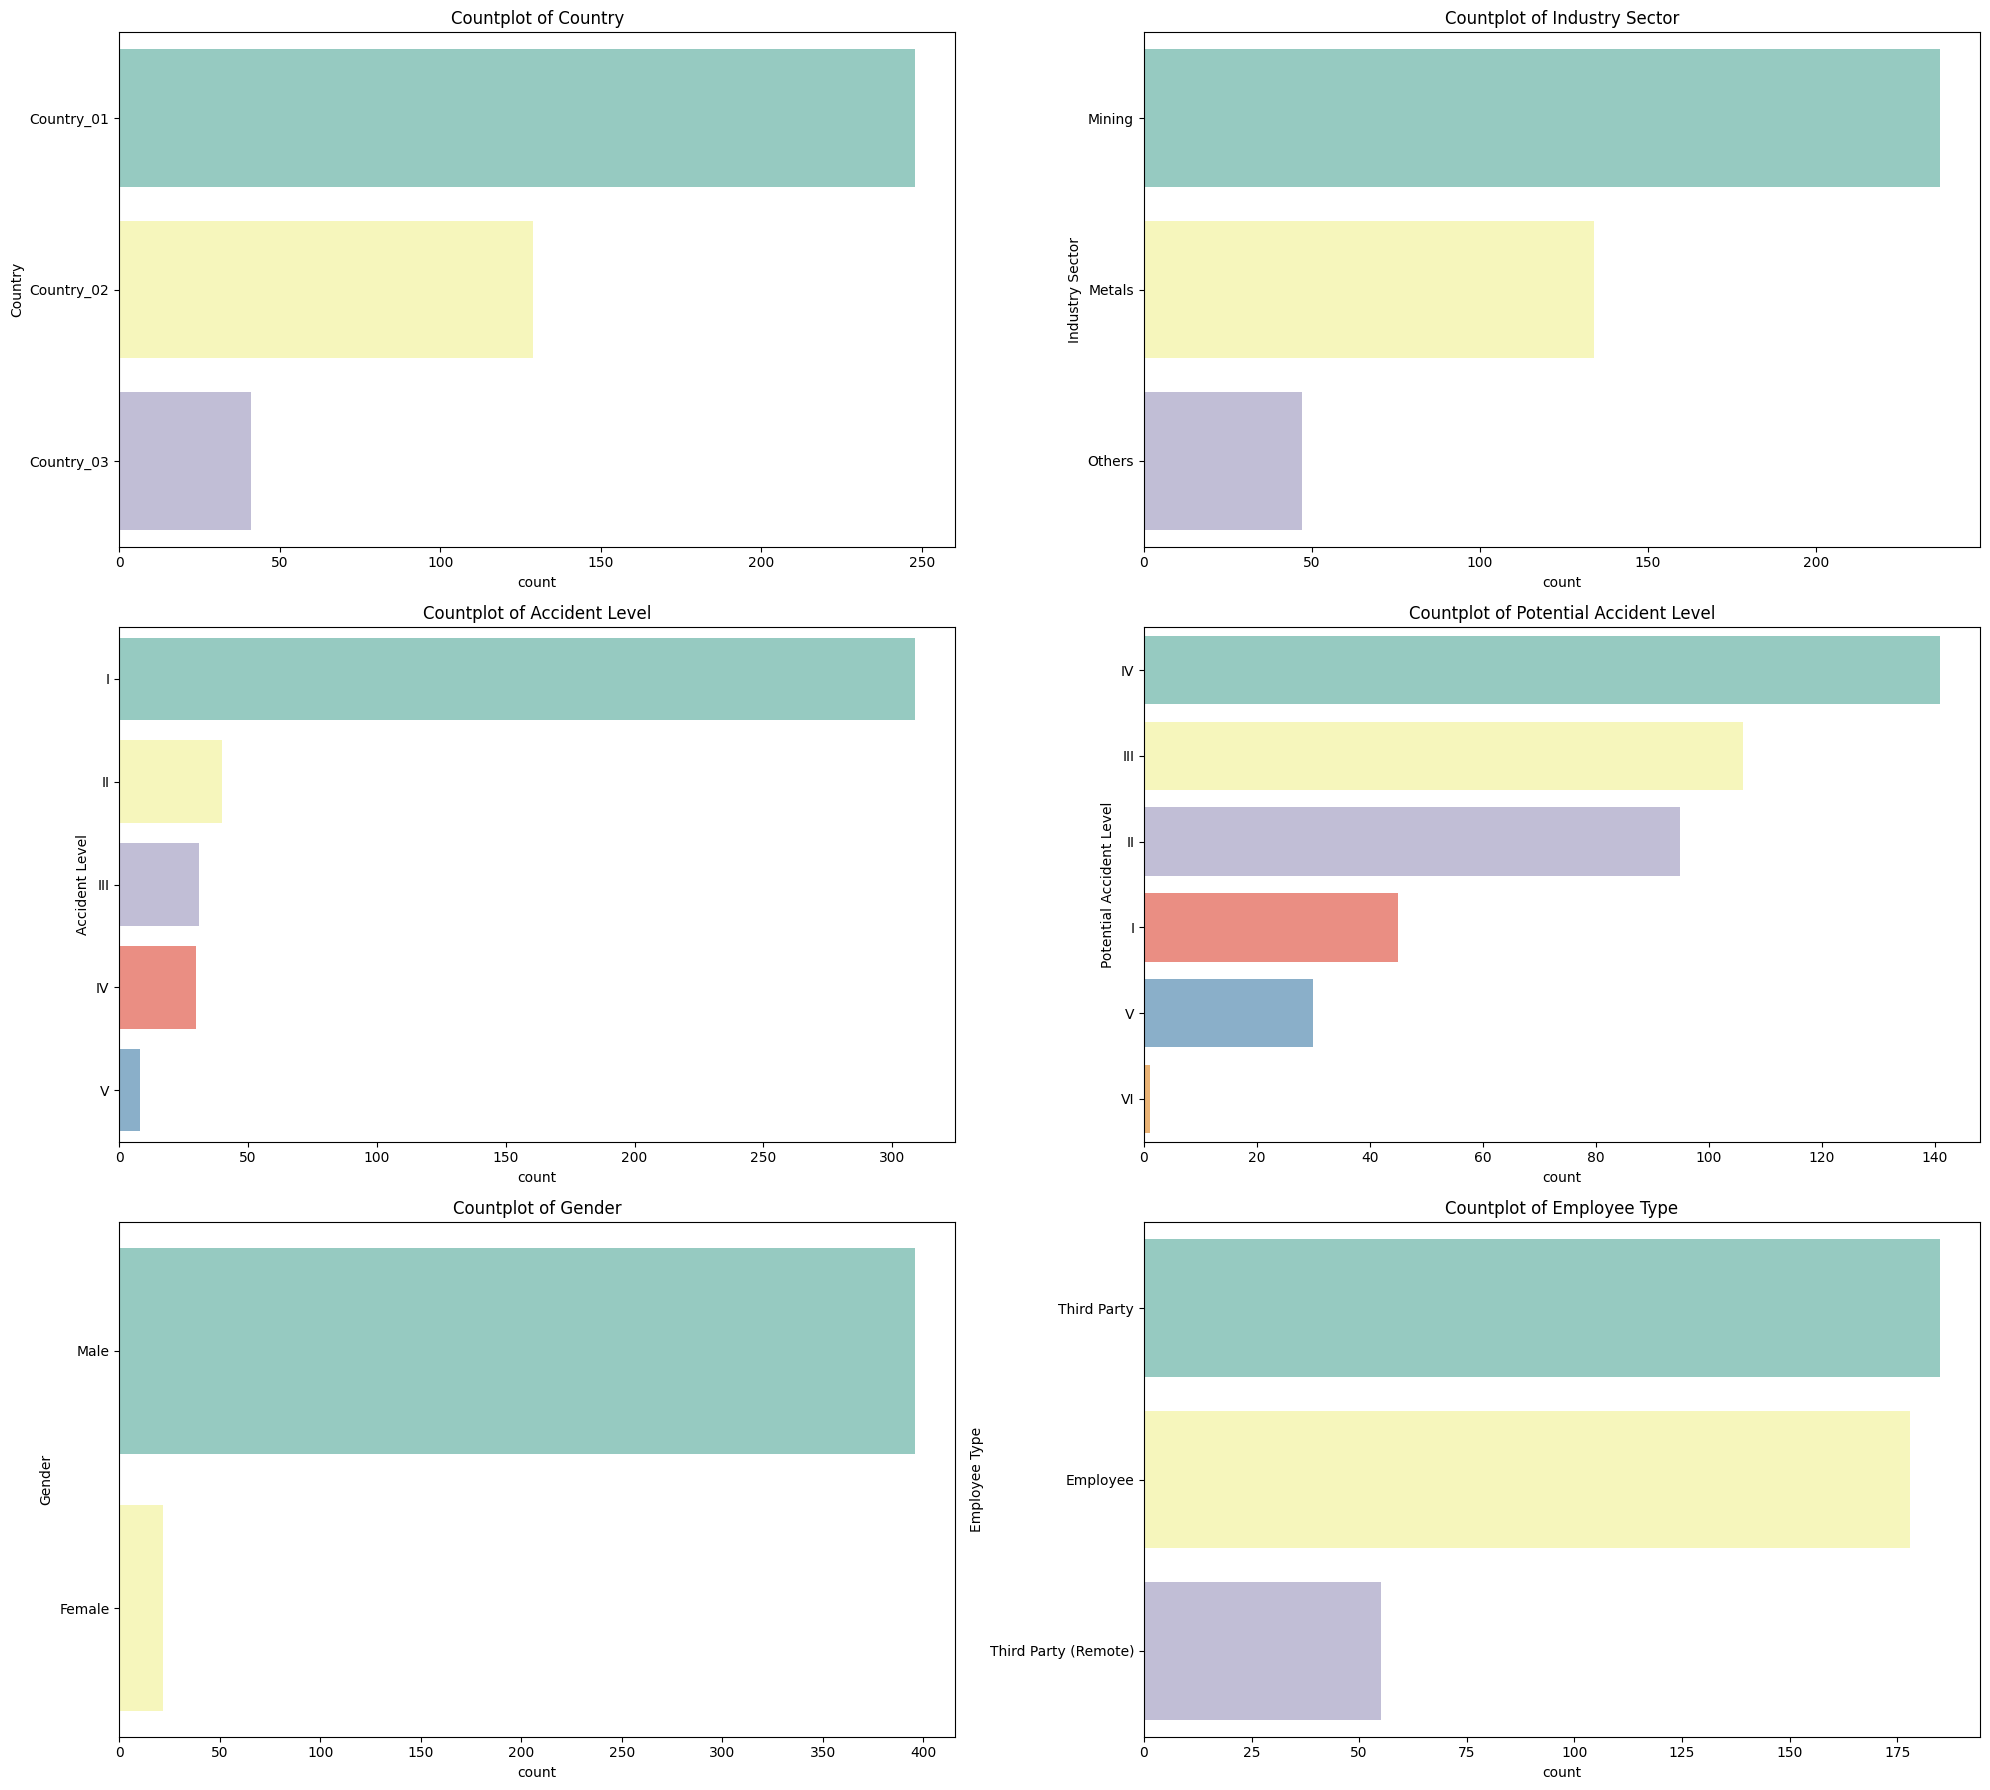

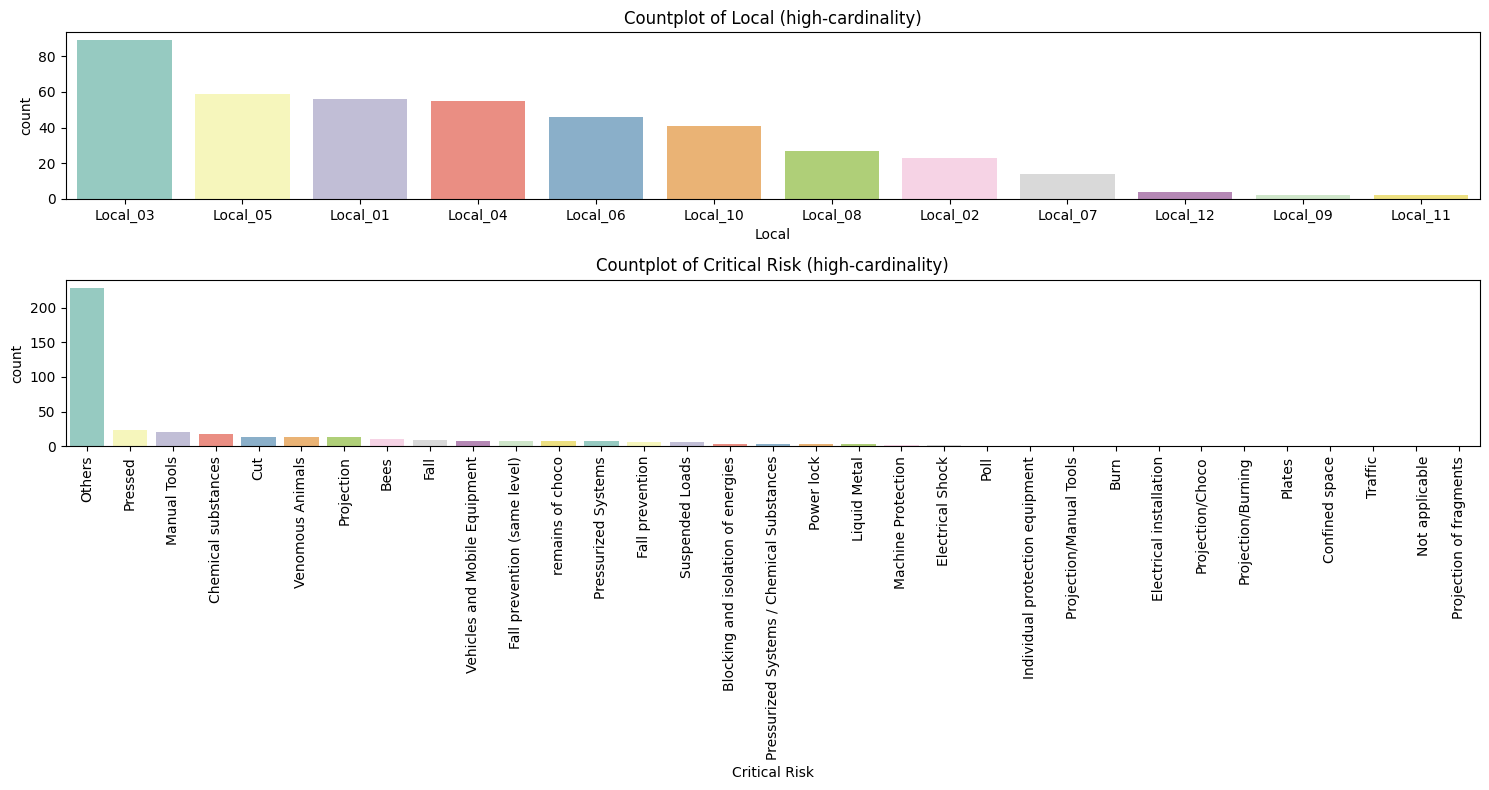

In [27]:
#univariate analysis
univariate_graphPrep('countplot',cat_variable[:-1],df_ish)

Low-cardinality columns: 2 | High-cardinality columns: 1


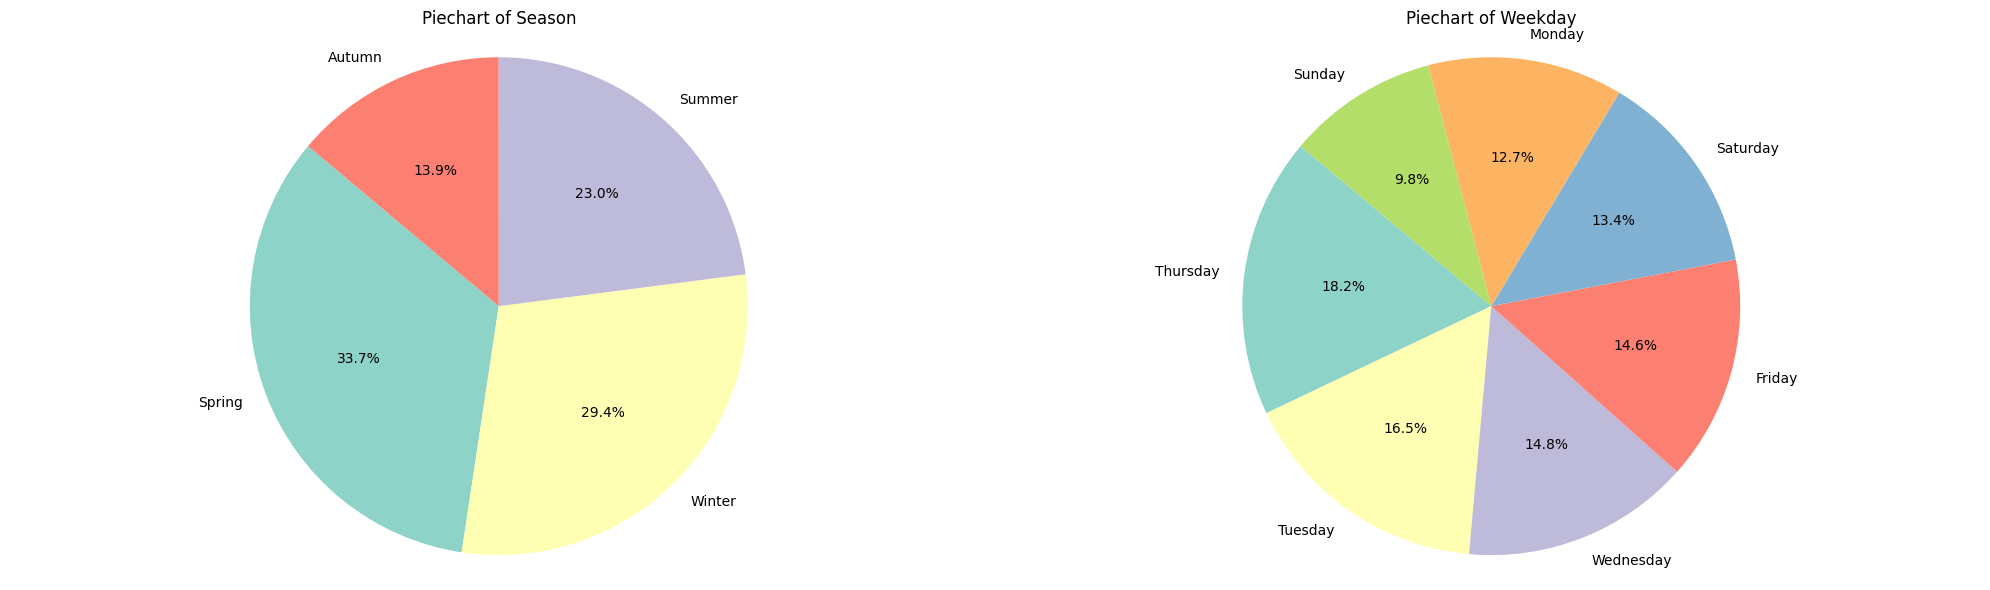

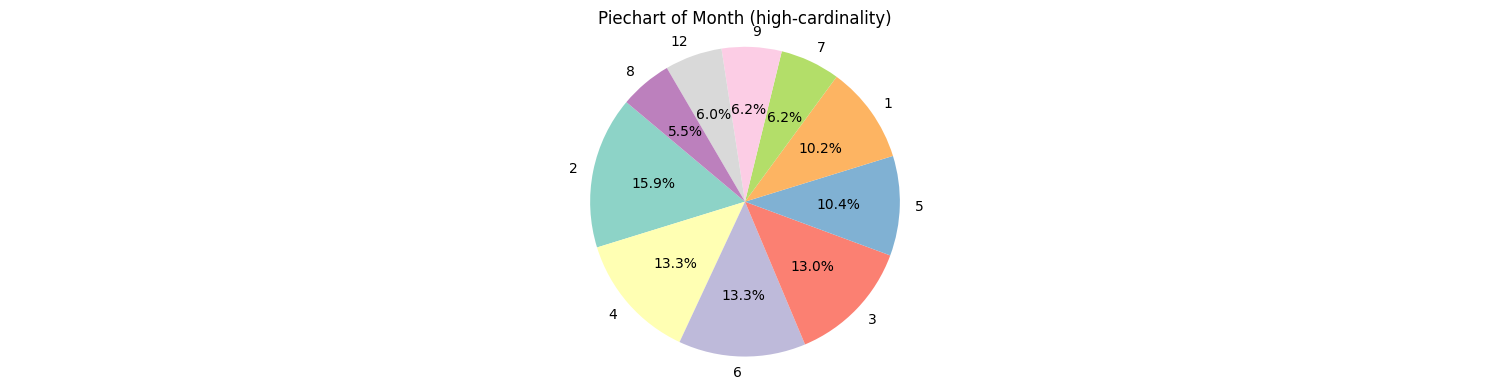

In [28]:
# Extract day names
df_ish['Weekday'] = df_ish['Date'].dt.day_name()


# Define seasons based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Create season column
df_ish['Season'] = df_ish['Date'].dt.month.map(get_season)


univariate_graphPrep('piechart',['Month','Season', 'Weekday'],df_ish )


Year : 2016
Low-cardinality columns: 3 | High-cardinality columns: 1


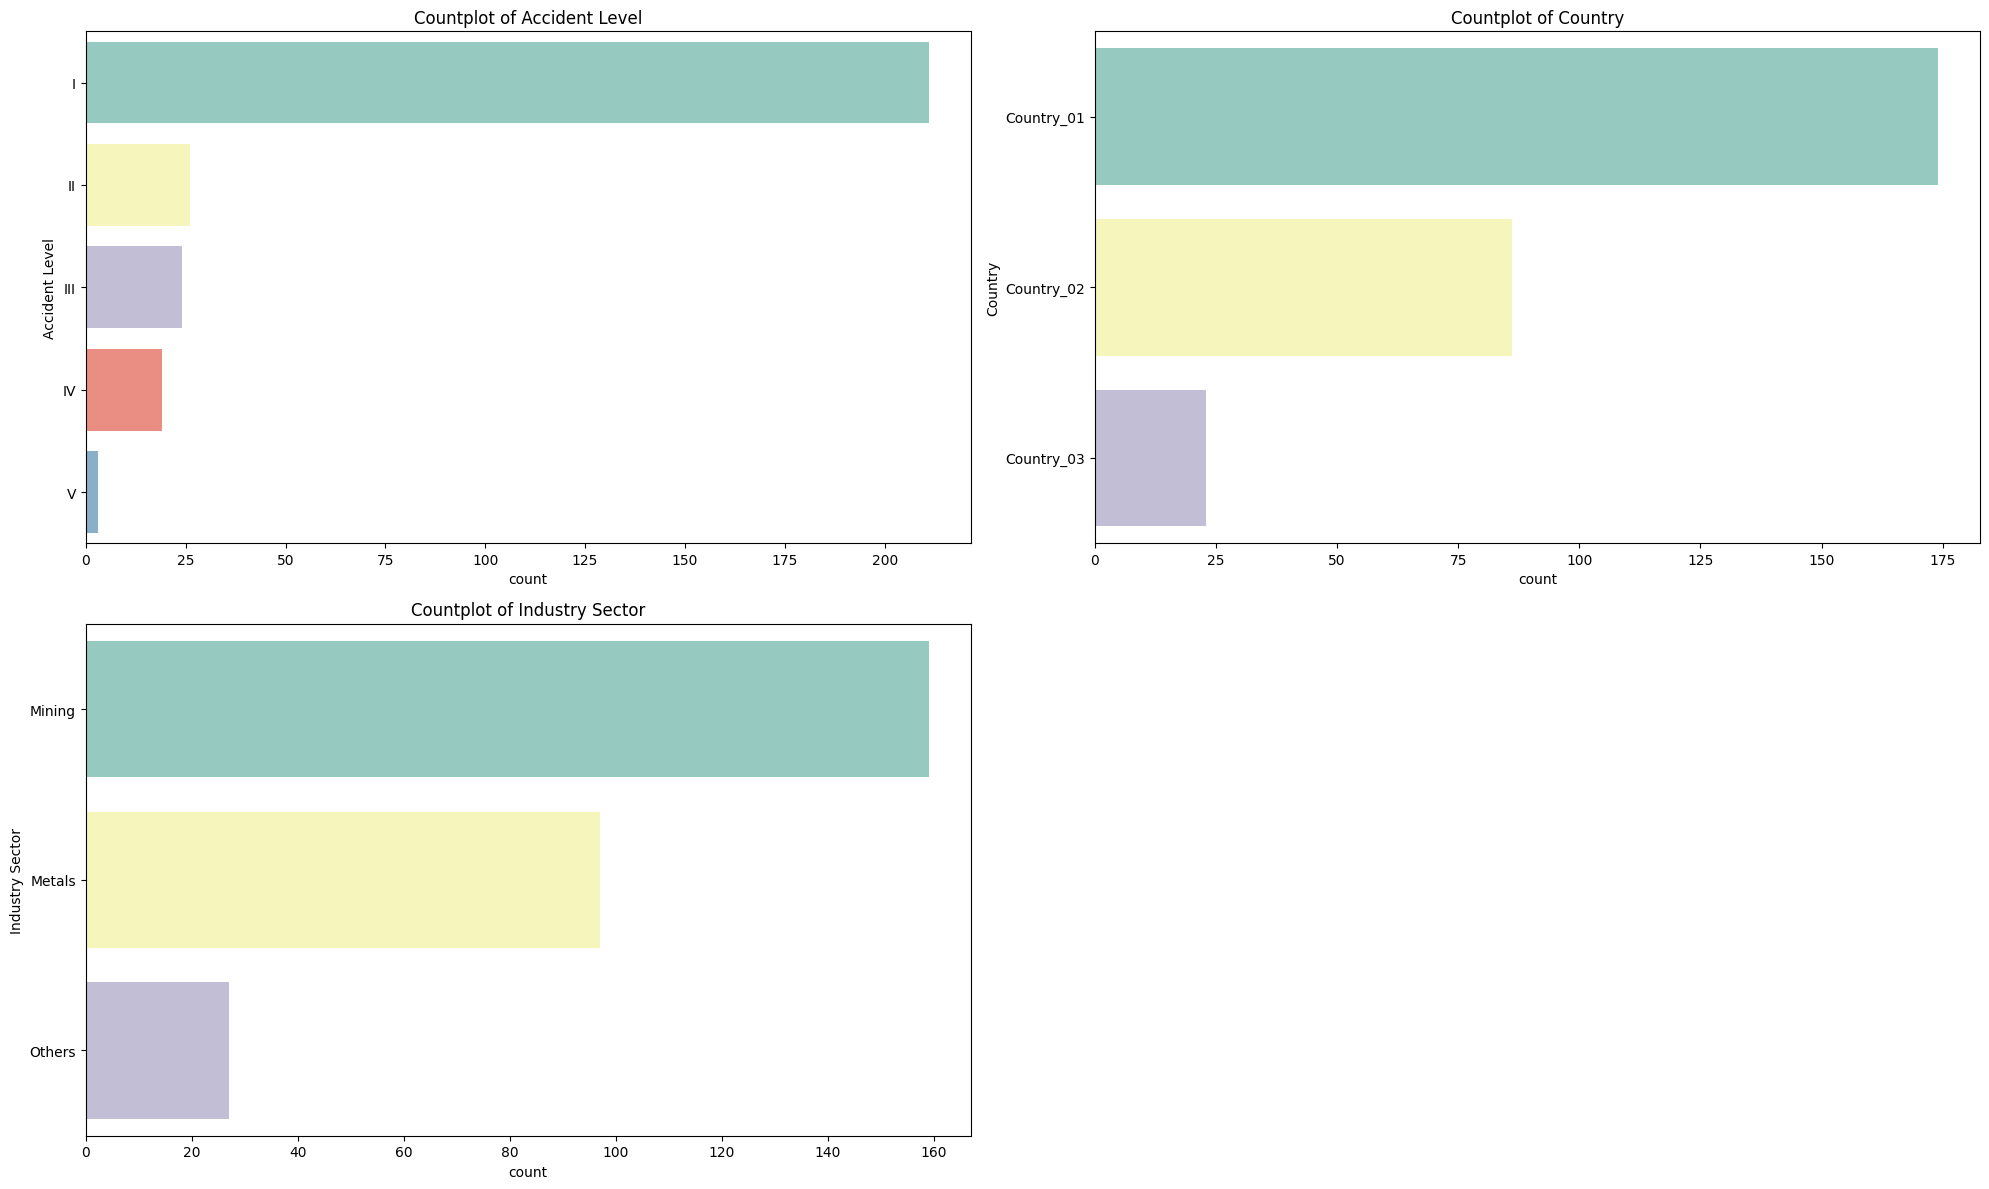

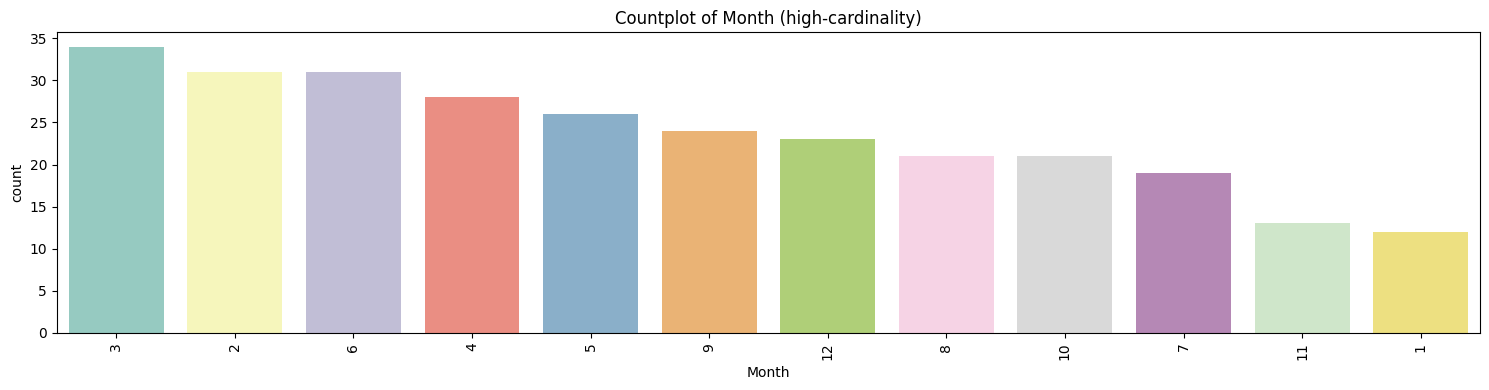

Year : 2017
Low-cardinality columns: 4 | High-cardinality columns: 0


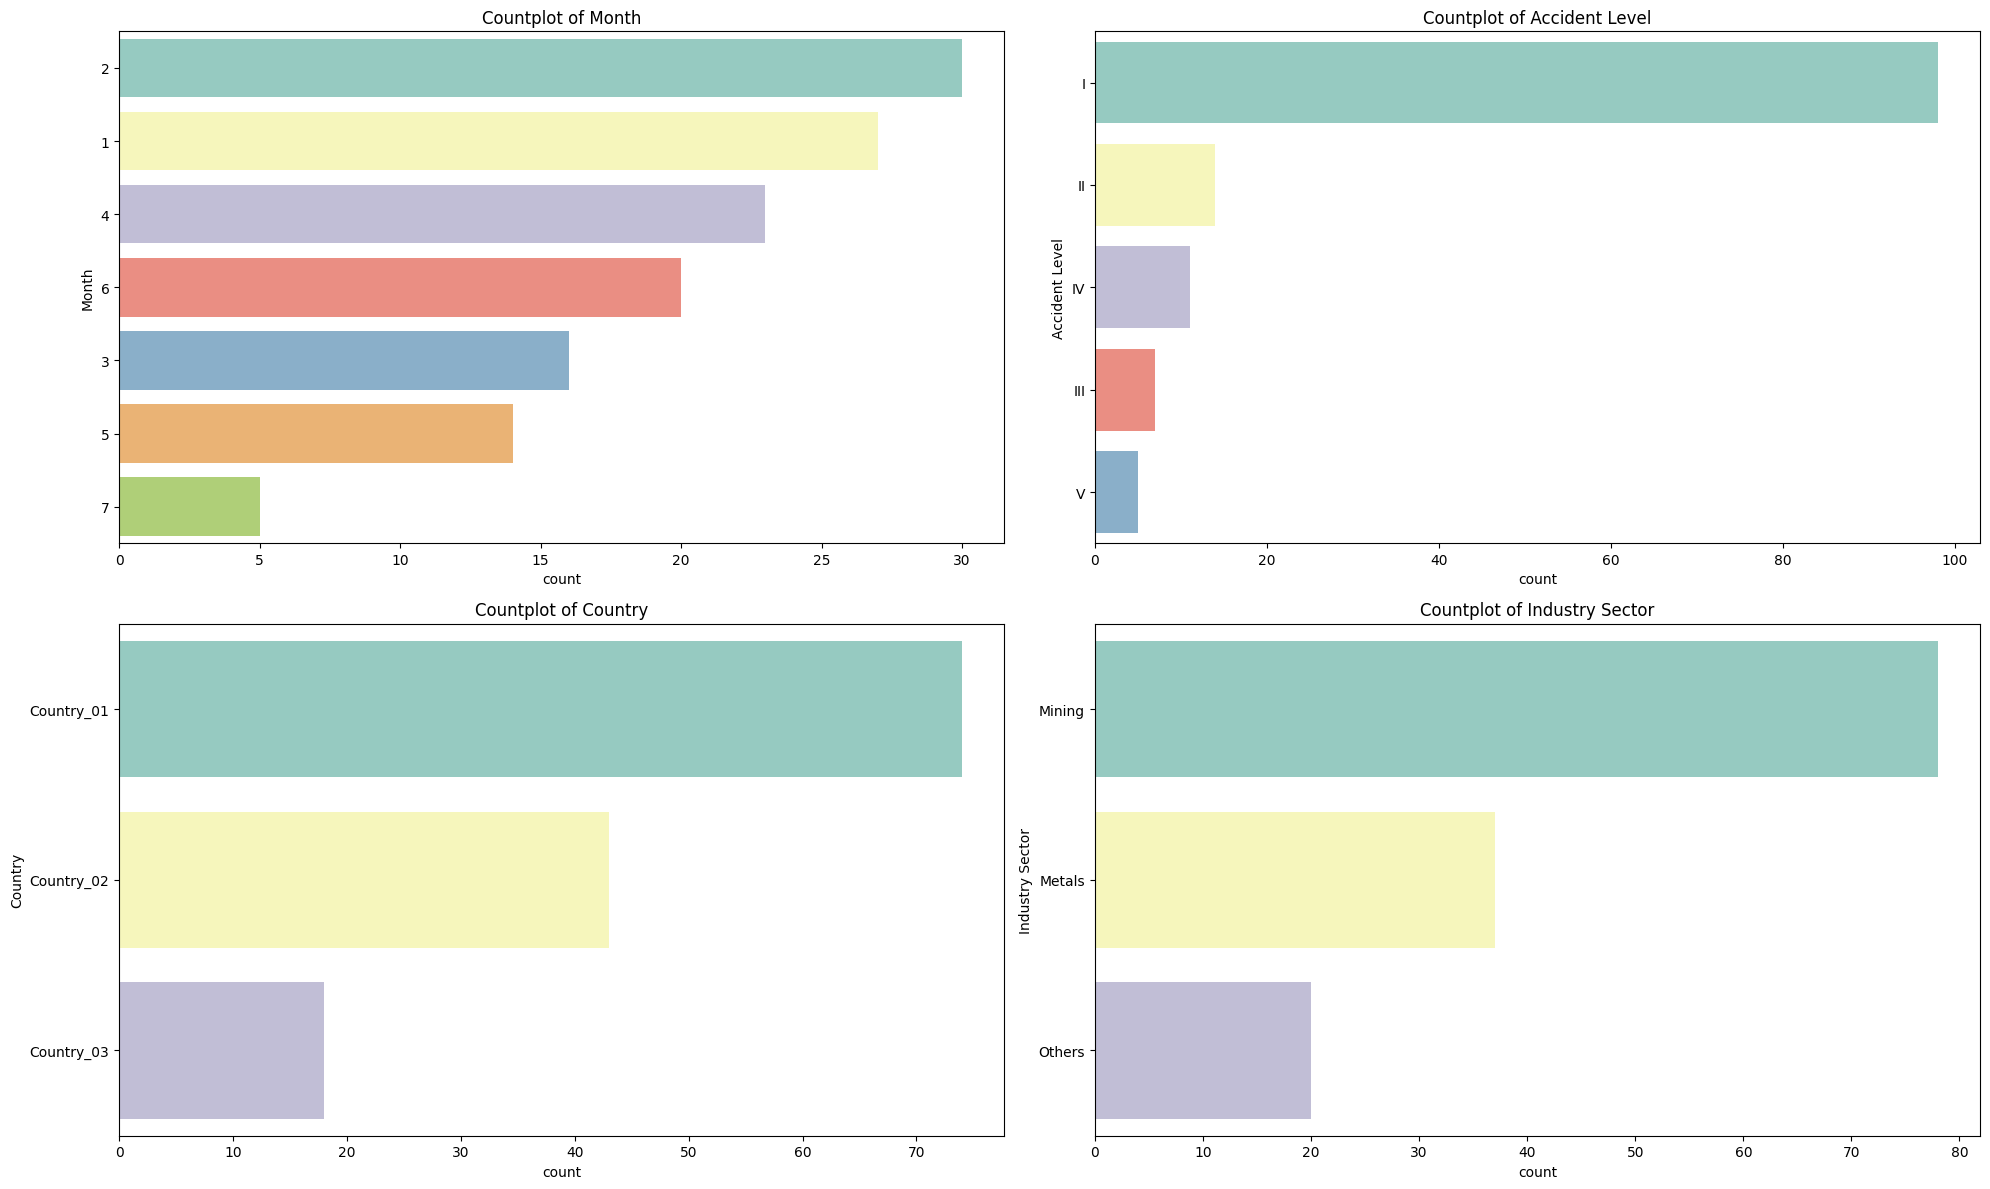

In [29]:
for year in df_ish['Year'].unique():
  print(f'Year : {year}')
  univariate_graphPrep('countplot',['Month', 'Accident Level', 'Country', 'Industry Sector'],pd.DataFrame(df_ish[df_ish['Year']==year]))




## Bivarated Analysis

In [30]:
def bivariate_graphPrep(graphtype, variablePairs, df, n_cols=2, figsize=None, **kwargs):
    high_card=[]
    low_card=[]
    for i, ((var1, var2), hue) in enumerate(variablePairs):
        if df[var1].nunique() >= 7:
            high_card.append(((var1, var2), hue))
            # continue
        else:
            low_card.append(((var1, var2), hue))

    if low_card:
      n_plots = len(variablePairs)
      n_rows = int(np.ceil(n_plots / n_cols))

      if figsize is None:
        figsize = (20 * n_cols, 15 * n_rows)

      fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    # If only one plot, axes is not an array, so convert to array for uniformity
      if n_plots == 1:
        axes = np.array([axes])
      else:
        axes = axes.flatten()

      for i, ((var1, var2), hue) in enumerate(low_card):
        ax = axes[i]
        plot_kwargs = kwargs.copy()
        if hue:
            plot_kwargs['hue'] = hue
        try:
            if graphtype == "histplot":
                # histplot with x and y; kde only supports univariate, so disabling kde
                sns.histplot(data=df, x=var1, y=var2, bins='auto', stat='count',
                             palette='Spectral', ax=ax, **plot_kwargs)
                ax.set_title(f'Histogram of {var1} vs {var2}' + (f' (hue={hue})' if hue else ''))
                ax.set_xlabel(var1, fontsize=14)
                ax.set_ylabel(var2, fontsize=14)

            elif graphtype == "violinplot":
                sns.violinplot(data=df, x=var1, y=var2, ax=ax, **plot_kwargs)
                ax.set_title(f'Violinplot of {var1} vs {var2}' + (f' (hue={hue})' if hue else ''), fontsize=16)
                ax.set_xlabel(var1, fontsize=14)
                ax.set_ylabel(var2, fontsize=14)

            elif graphtype == "countplot":
                order =df[var1].value_counts().index

                # countplot only supports x and optionally hue
                if var2 is None or var2 == '':
                    sns.countplot(data=df, x=var1 ,ax=ax,order=order, **plot_kwargs)
                    ax.set_ylabel("Count", fontsize=15)
                else:
                    ax.text(0.5, 0.5, "Countplot supports only x (and hue).", ha='center', fontsize=12)
                    ax.set_axis_off()
                ax.set_title(f'Countplot of {var1}' + (f' (hue={hue})' if hue else ''), fontsize=16)
                ax.set_xlabel(var1, fontsize=15)

            elif graphtype == "barplot":
                # barplot requires both x and y
                if var2 and var2 != '':
                    sns.barplot(data=df, x=var1, y=var2, palette='Spectral', ax=ax, ci=None, **plot_kwargs)
                    ax.set_ylabel(var2, fontsize=14)
                else:
                    ax.text(0.5, 0.5, "Barplot needs both x and y.", ha='center', fontsize=12)
                    ax.set_axis_off()
                ax.set_title(f'Barplot of {var1} vs {var2}' + (f' (hue={hue})' if hue else ''), fontsize=16)
                ax.set_xlabel(var1, fontsize=14)

            elif graphtype == "scatterplot":
                if var1 and var2 and var1 != '' and var2 != '':
                    sns.scatterplot(data=df, x=var1, y=var2, ax=ax, **plot_kwargs)
                    ax.set_title(f'Scatterplot of {var1} vs {var2}' + (f' (hue={hue})' if hue else ''), fontsize=16)
                    ax.set_xlabel(var1, fontsize=14)
                    ax.set_ylabel(var2, fontsize=14)
                else:
                    ax.text(0.5, 0.5, "Scatterplot needs both x and y.", ha='center', fontsize=12)
                    ax.set_axis_off()

            else:
                ax.text(0.5, 0.5, f"Unsupported graphtype: {graphtype}",
                        ha='center', va='center', fontsize=12)
                ax.set_axis_off()

            ax.tick_params(axis='x', rotation=90, labelsize=17, pad=5)
            ax.tick_params(axis='y', labelsize=17, pad=5)

            # Manage legend
            if hue:
                if ax.get_legend() is None:
                    ax.legend(title=hue, fontsize=10, title_fontsize=12)
                else:
                    ax.legend(title=hue, fontsize=10, title_fontsize=12)
            else:
                if ax.get_legend() is not None:
                    ax.get_legend().remove()

        except Exception as e:
            ax.text(0.5, 0.5, f"Error plotting:\n{e}",
                    ha='center', va='center', fontsize=10, color='red')
            ax.set_axis_off()

    # Remove unused axes if any
      for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

      plt.tight_layout(pad=2.0)
      plt.show()

    if high_card:
        size = len(high_card)
        n_cols = 1
        n_rows = size
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(13, 8 * n_rows))
        axes = axes.flatten() if size > 1 else [axes]
        for idx,((var1, var2), hue) in enumerate(high_card):
          ax = axes[idx]
          plot_kwargs = kwargs.copy()
          if hue:
           plot_kwargs['hue'] = hue
           try:
             if graphtype == "histplot":
                # histplot with x and y; kde only supports univariate, so disabling kde
                sns.histplot(data=df, x=var1, y=var2, bins='auto', stat='count',
                             palette='Spectral', ax=ax, **plot_kwargs)
                ax.set_title(f'Histogram of {var1} vs {var2}' + (f' (hue={hue})' if hue else ''))
                ax.set_xlabel(var1, fontsize=14)
                ax.set_ylabel(var2, fontsize=14)

             elif graphtype == "violinplot":
                sns.violinplot(data=df, x=var1, y=var2, ax=ax, **plot_kwargs)
                ax.set_title(f'Violinplot of {var1} vs {var2}' + (f' (hue={hue})' if hue else ''), fontsize=16)
                ax.set_xlabel(var1, fontsize=14)
                ax.set_ylabel(var2, fontsize=14)

             elif graphtype == "countplot":
                order=df[var1].value_counts().index
                # countplot only supports x and optionally hue
                if var2 is None or var2 == '':
                    sns.countplot(data=df, x=var1, ax=ax,order=order,  **plot_kwargs)
                    ax.set_ylabel("Count", fontsize=12)
                else:
                    ax.text(0.5, 0.5, "Countplot supports only x (and hue).", ha='center', fontsize=12)
                    ax.set_axis_off()
                ax.set_title(f'Countplot of {var1}' + (f' (hue={hue})' if hue else ''), fontsize=16)
                ax.set_xlabel(var1, fontsize=12)

             elif graphtype == "barplot":
                # barplot requires both x and y
                if var2 and var2 != '':
                    sns.barplot(data=df, x=var1, y=var2, palette='Spectral', ax=ax, ci=None, **plot_kwargs)
                    ax.set_ylabel(var2, fontsize=14)
                else:
                    ax.text(0.5, 0.5, "Barplot needs both x and y.", ha='center', fontsize=12)
                    ax.set_axis_off()
                ax.set_title(f'Barplot of {var1} vs {var2}' + (f' (hue={hue})' if hue else ''), fontsize=16)
                ax.set_xlabel(var1, fontsize=14)

             elif graphtype == "scatterplot":
                if var1 and var2 and var1 != '' and var2 != '':
                    sns.swarmplot(data=df, x=var1, y=var2, ax=ax,**plot_kwargs)
                    ax.set_title(f'Scatterplot of {var1} vs {var2}' + (f' (hue={hue})' if hue else ''), fontsize=16)
                    ax.set_xlabel(var1.replace('_Code',''), fontsize=14)
                    ax.set_ylabel(var2.replace('_Code',''), fontsize=14)
                    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
                else:
                    ax.text(0.5, 0.5, "Scatterplot needs both x and y.", ha='center', fontsize=12)
                    ax.set_axis_off()

             else:
                ax.text(0.5, 0.5, f"Unsupported graphtype: {graphtype}",
                        ha='center', va='center', fontsize=12)
                ax.set_axis_off()

             ax.tick_params(axis='x', rotation=90, labelsize=8, pad=5)
             ax.tick_params(axis='y', labelsize=8, pad=5)

            # Manage legend
             if hue:
                if ax.get_legend() is None:
                    ax.legend(title=hue, fontsize=10, title_fontsize=12)
                else:
                    ax.legend(title=hue, fontsize=10, title_fontsize=12)
             else:
                if ax.get_legend() is not None:
                    ax.get_legend().remove()

           except Exception as e:
            ax.text(0.5, 0.5, f"Error plotting:\n{e}",
                    ha='center', va='center', fontsize=10, color='red')
            ax.set_axis_off()

    # Remove unused axes if any
        for j in range(idx + 1, len(axes)):
          fig.delaxes(axes[j])

    plt.tight_layout(pad=2.0)
    plt.show()





variablePairs = [
    (('Industry Sector', 'Month'),'Country'),
    (('Accident Level', 'Month'),'Country'),
    (('Accident Level', 'Country'),'Gender'),
    (('Accident Level', 'Potential Accident Level'),'Country'),
    (('Gender', 'Potential Accident Level'),'Country'),
    (('Country', 'Accident Level'),'Industry Sector'),
    (('Country', 'Potential Accident Level'),'Industry Sector'),
    (('Critical Risk', 'Country'),'Industry Sector'),
    (('Critical Risk', 'Country'),'Employee Type'),
    (('Country', 'Employee Type'),'Industry Sector'),
    (('Industry Sector', 'Accident Level'),'Season' ),
    (('Industry Sector', 'Year'),'Season' )
]



### Bivariated VilonPlot

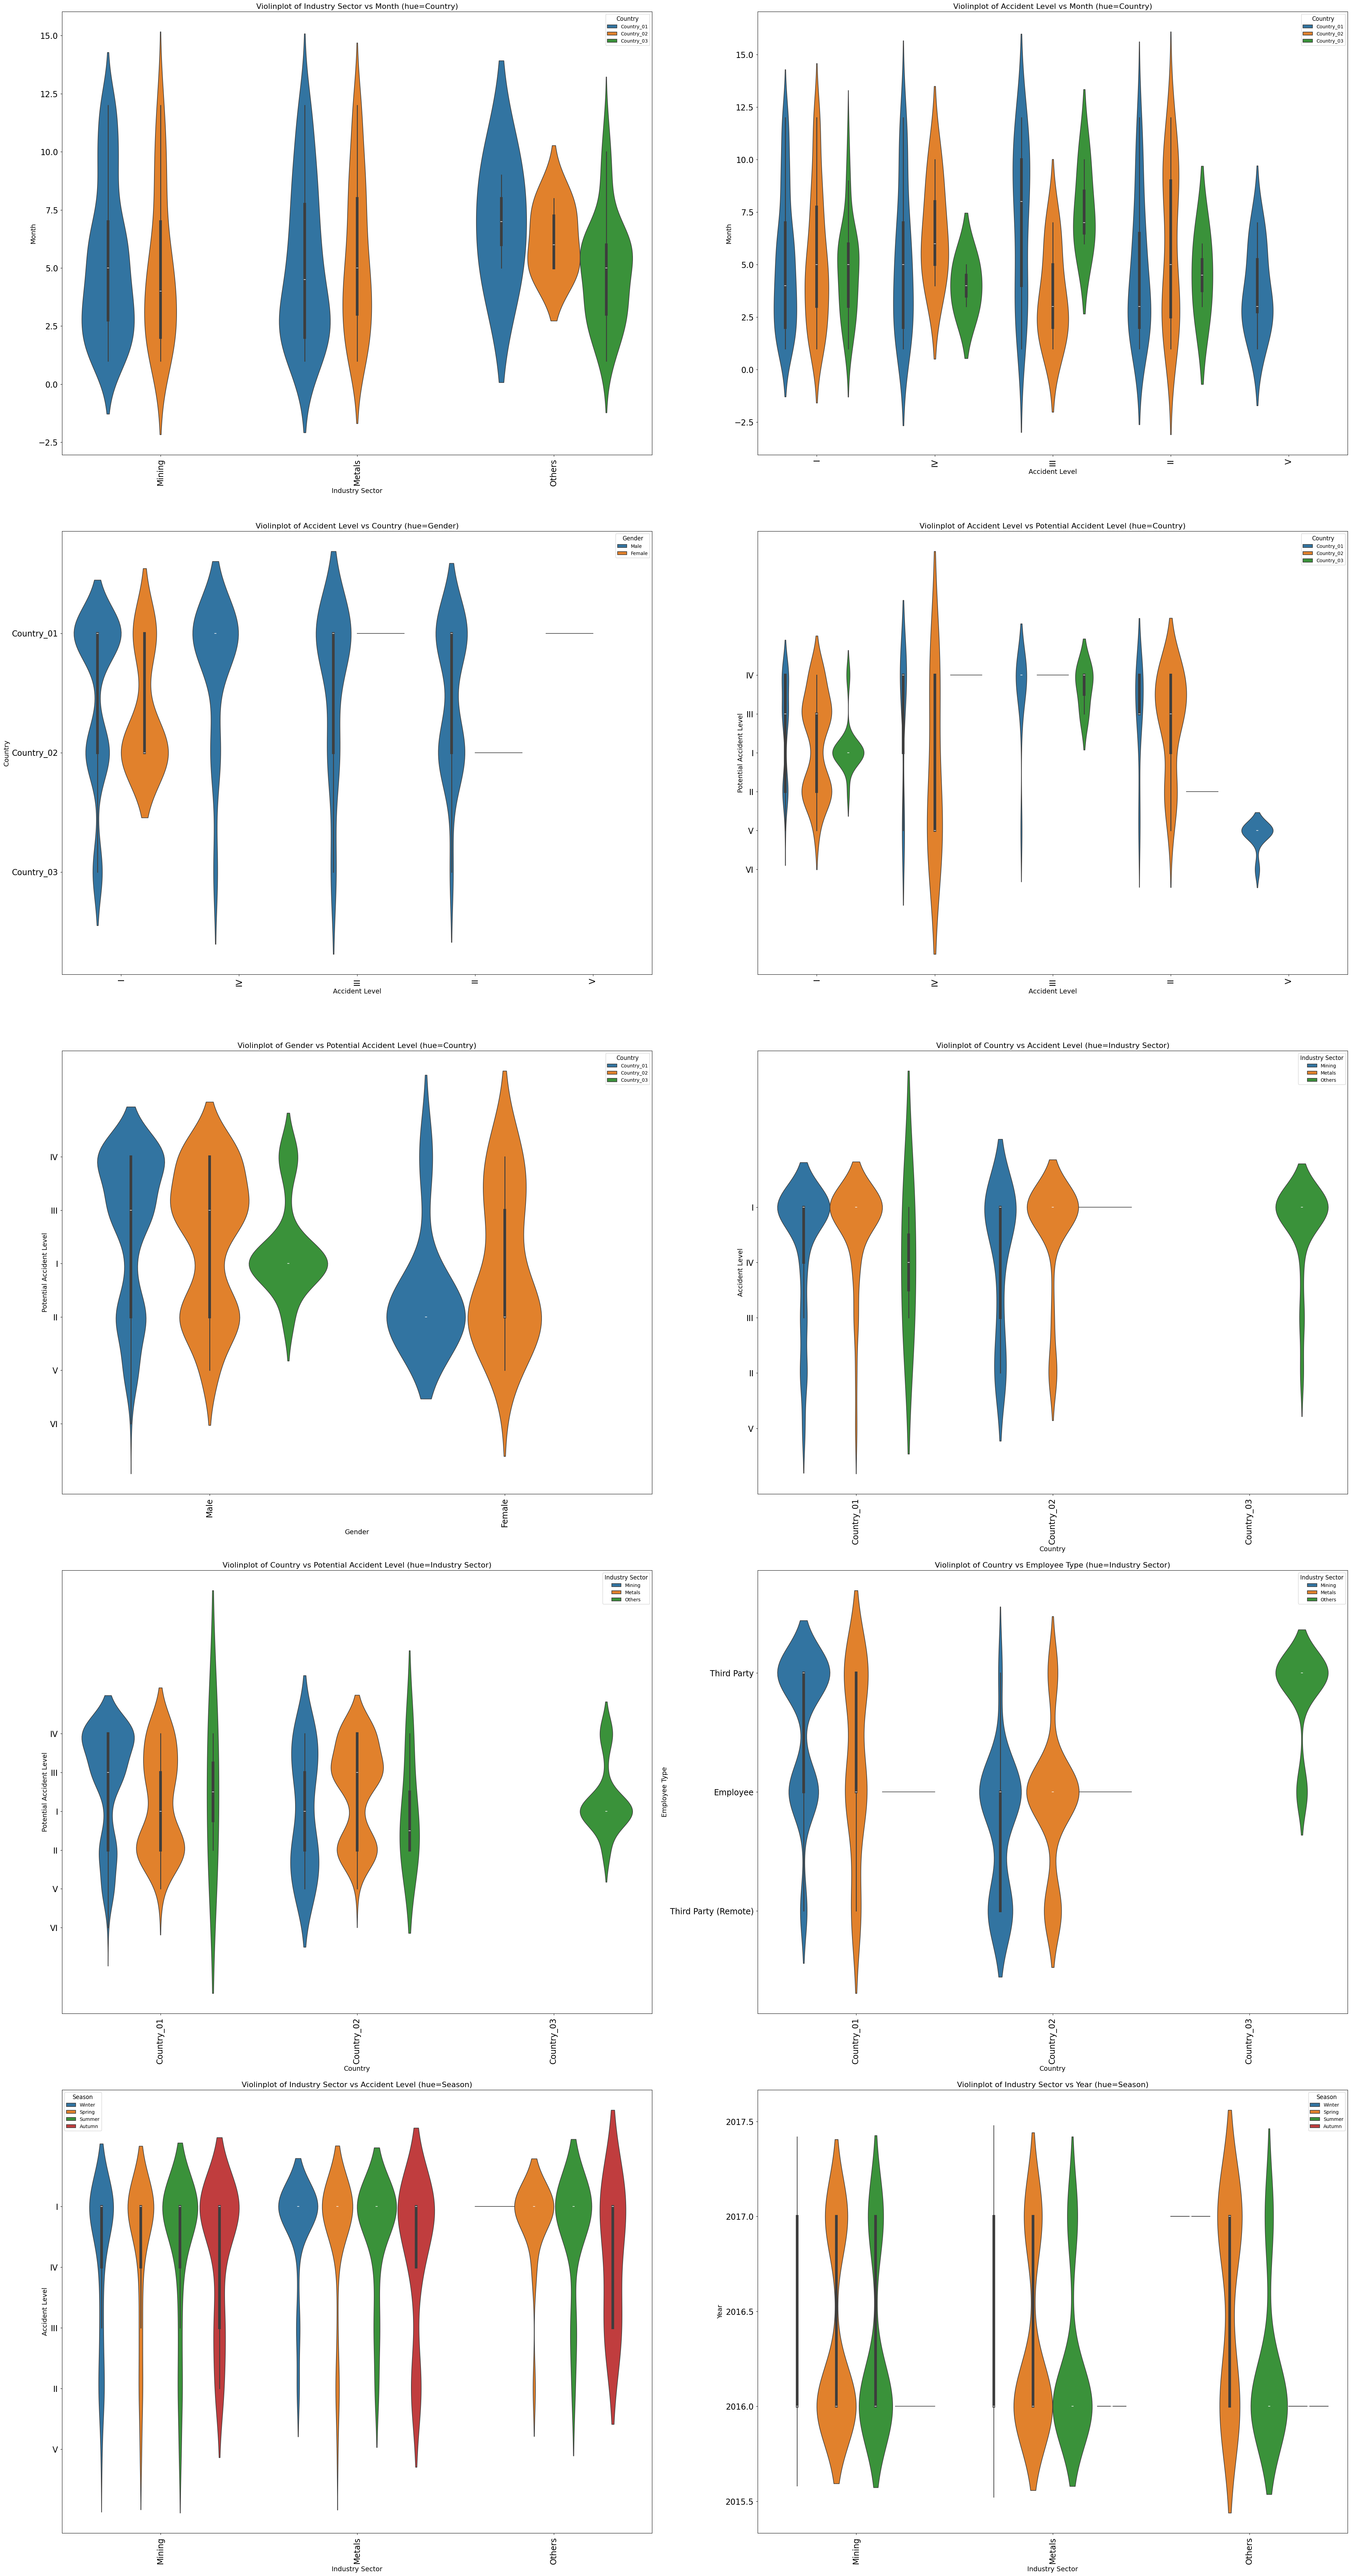

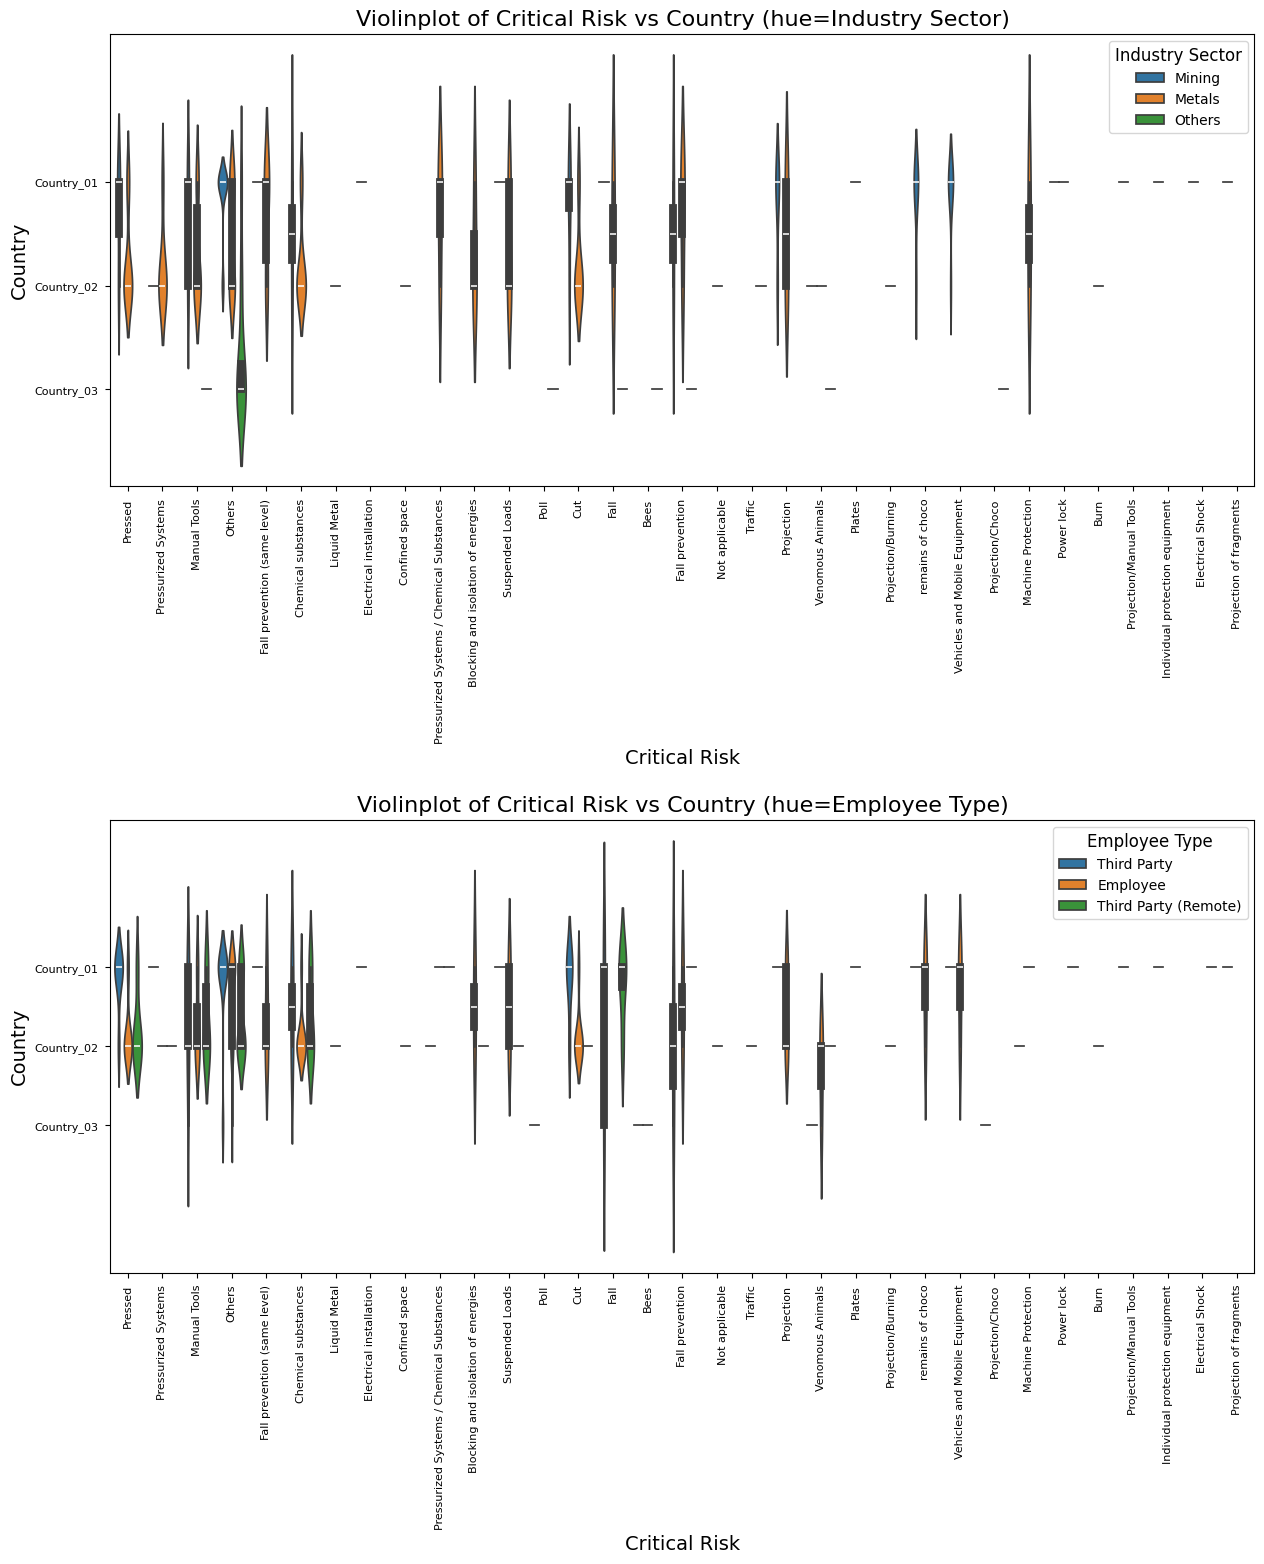

In [31]:
#bivariate

bivariate_graphPrep('violinplot',variablePairs ,df_ish)


### Countplot of relation between independent variable

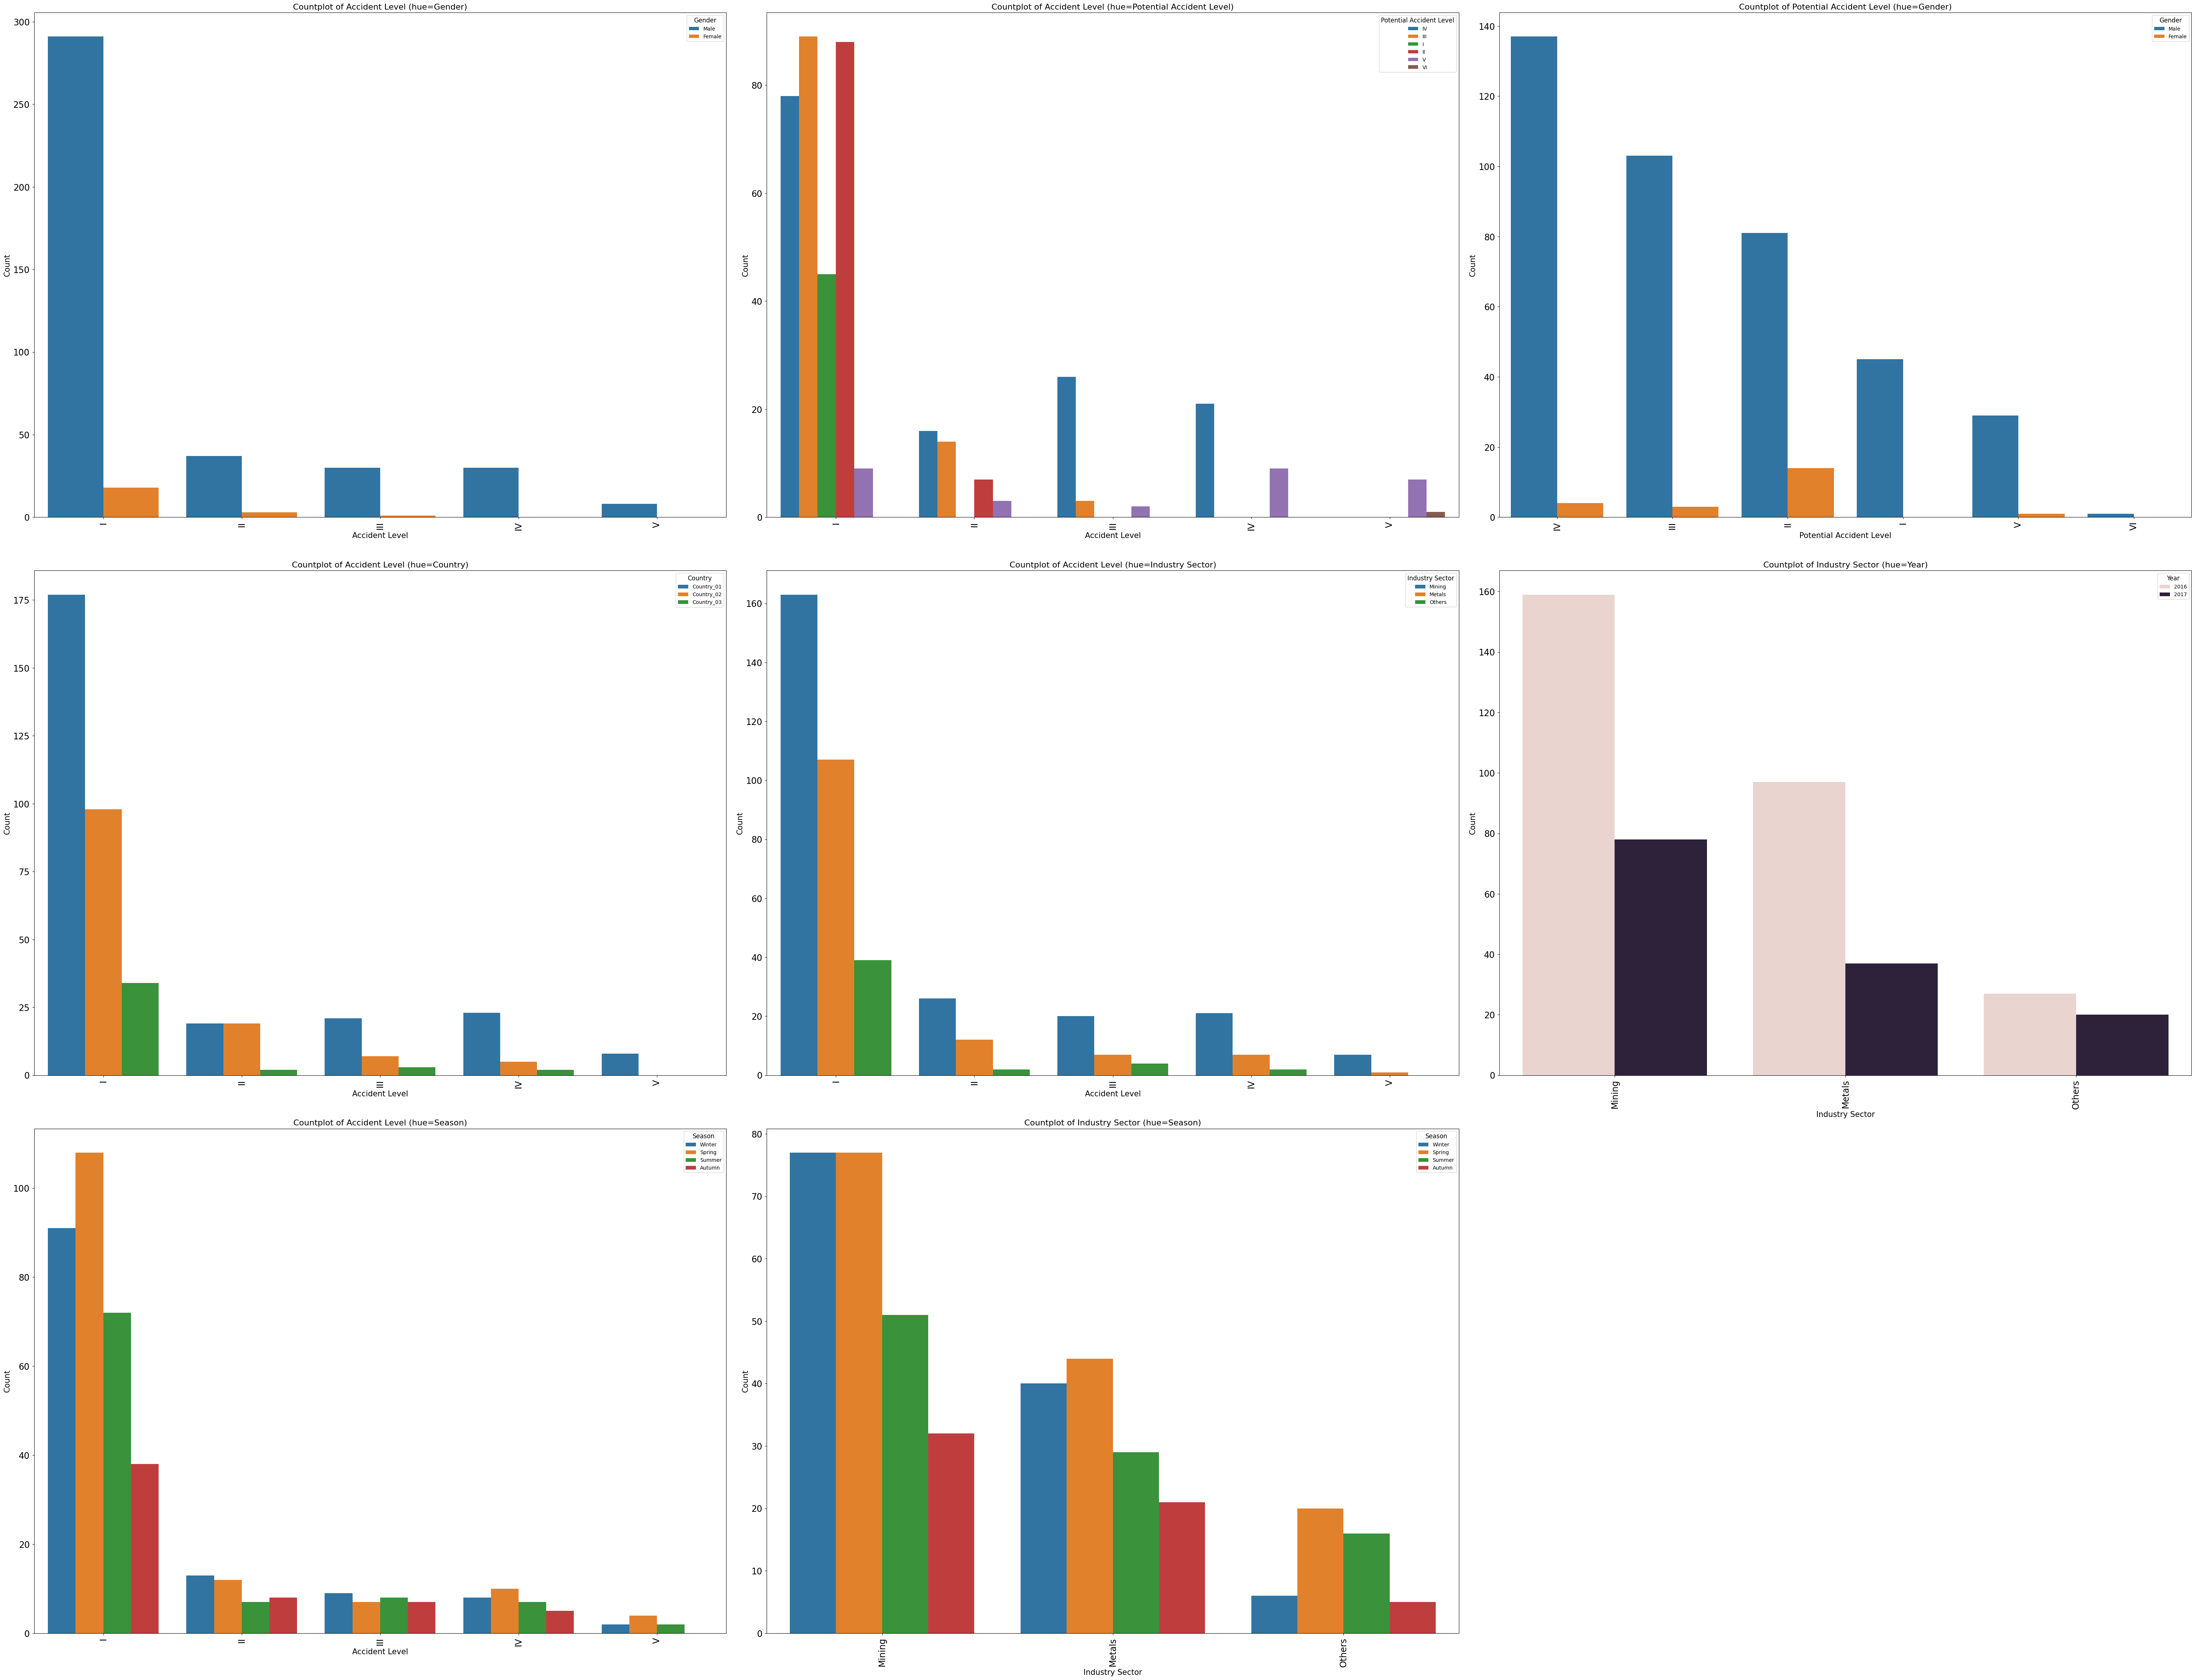

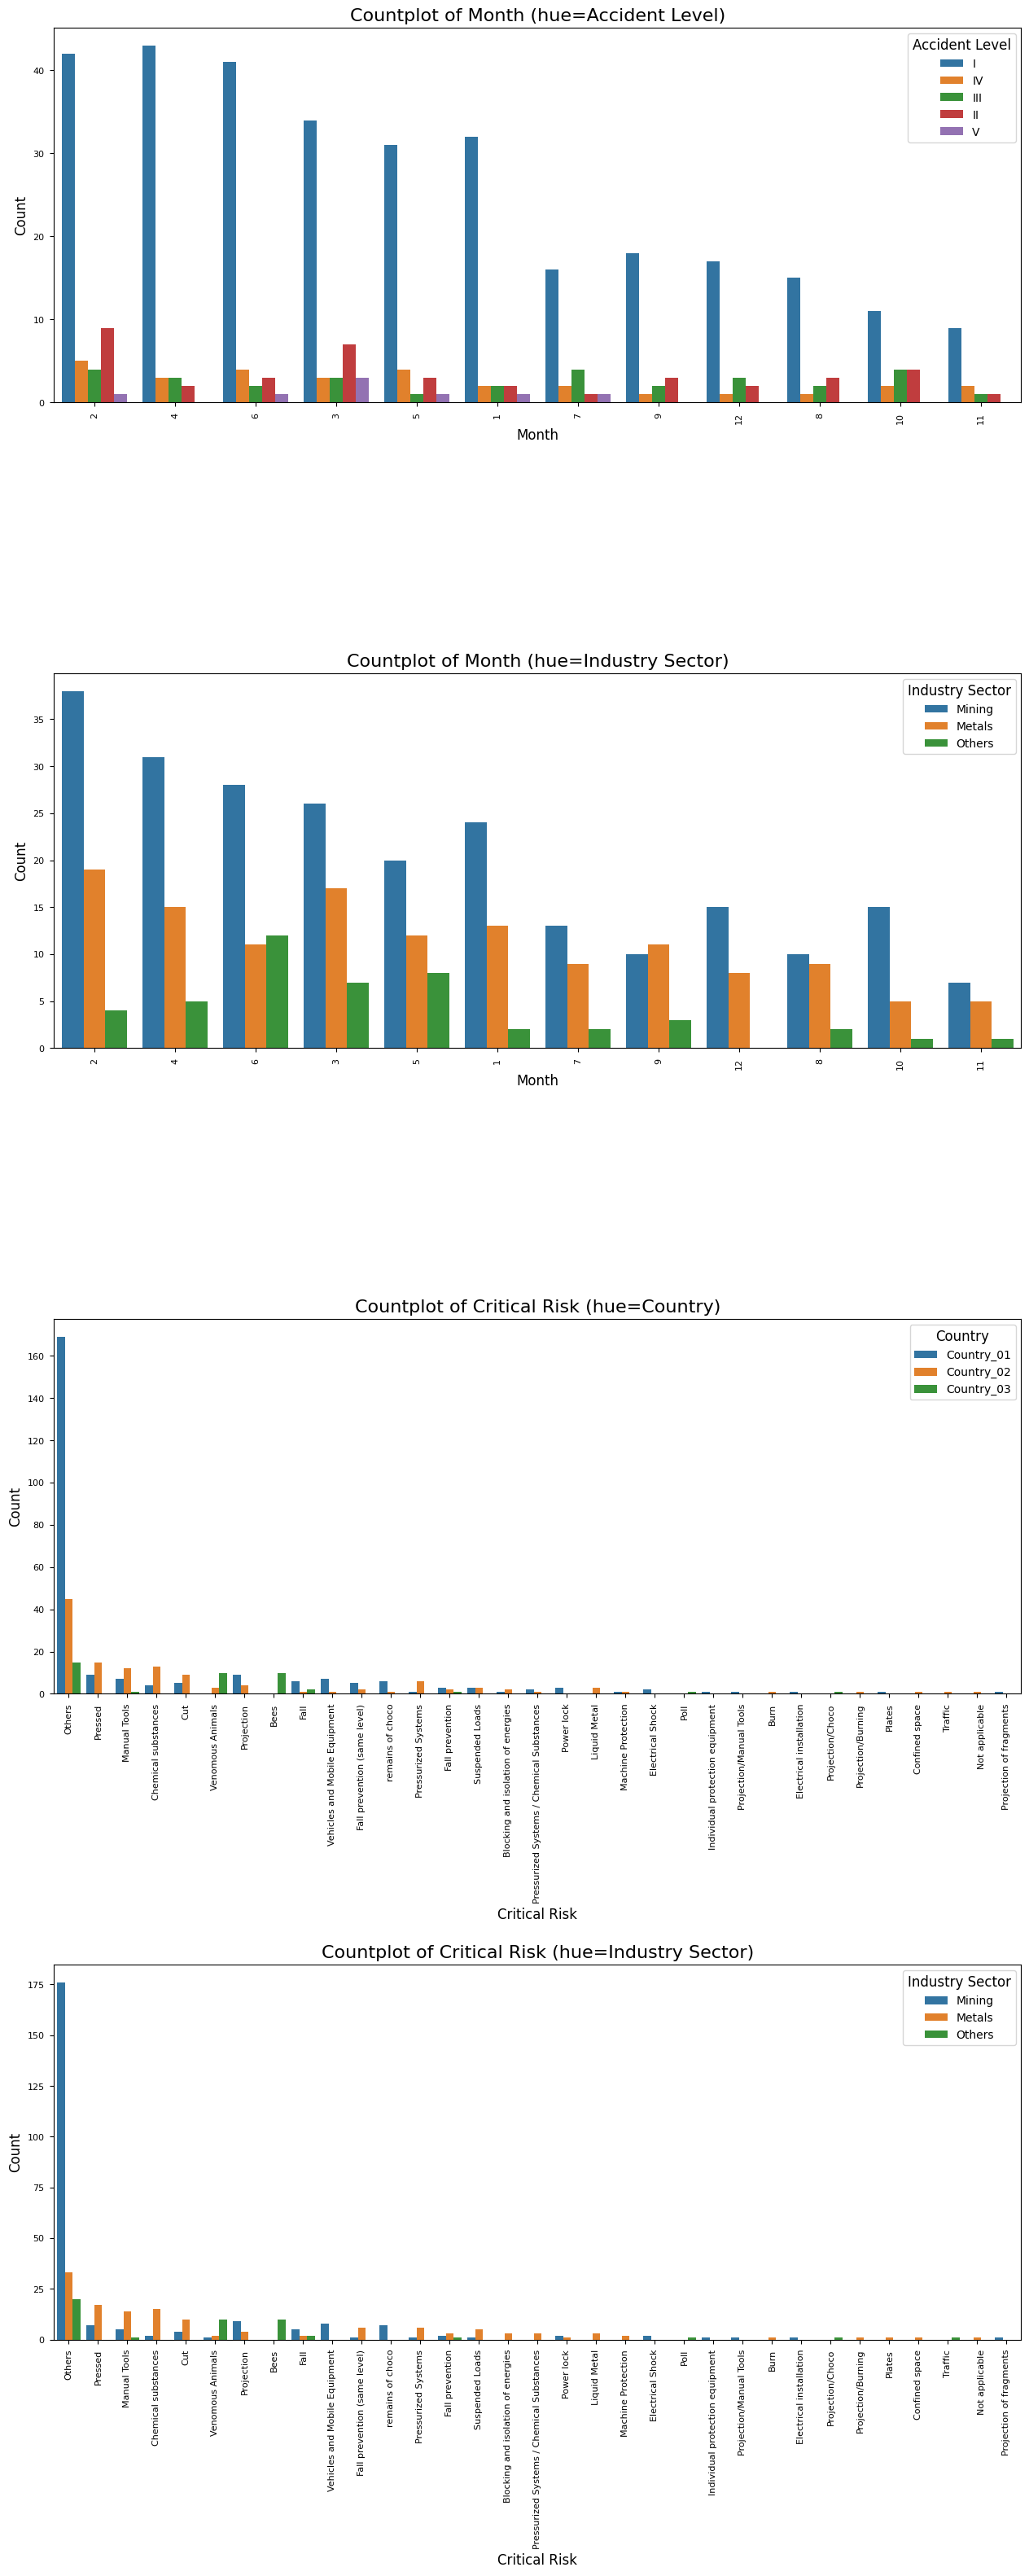

In [32]:
CountplotVariablePairs = [
    (('Month','' ), 'Accident Level'),
    (('Month','' ), 'Industry Sector'),
    (('Accident Level', ''), 'Gender'),
    (('Accident Level',''), 'Potential Accident Level'),
    (( 'Potential Accident Level',''),'Gender'),
    (( 'Accident Level',''), 'Country'),
    (('Critical Risk',''), 'Country'),
    (('Critical Risk',''), 'Industry Sector'),
    (('Accident Level',''), 'Industry Sector'),
    (('Industry Sector',''), 'Year'),
    (('Accident Level', ''), 'Season'),
    (('Industry Sector',''), 'Season'),
]


bivariate_graphPrep('countplot',CountplotVariablePairs ,df_ish, n_cols=3)


<Figure size 1600x1000 with 0 Axes>

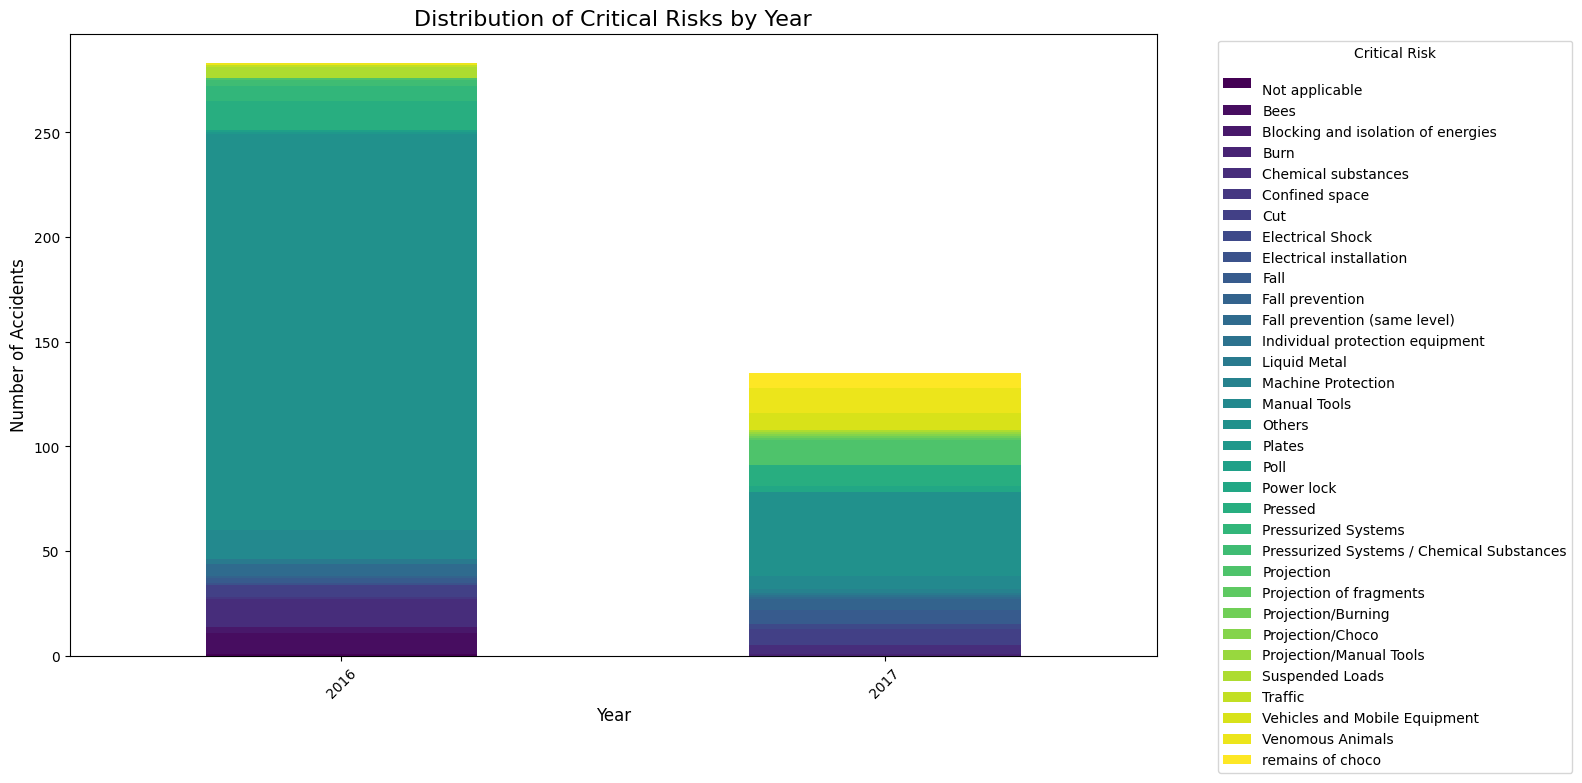

In [33]:
df_ish['Year'] = df_ish['Date'].dt.year

# Count of critical risks per year
risk_year_counts = df_ish.groupby(['Year', 'Critical Risk']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(16, 10))
risk_year_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(16, 8))

plt.title('Distribution of Critical Risks by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Critical Risk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Scatterplot

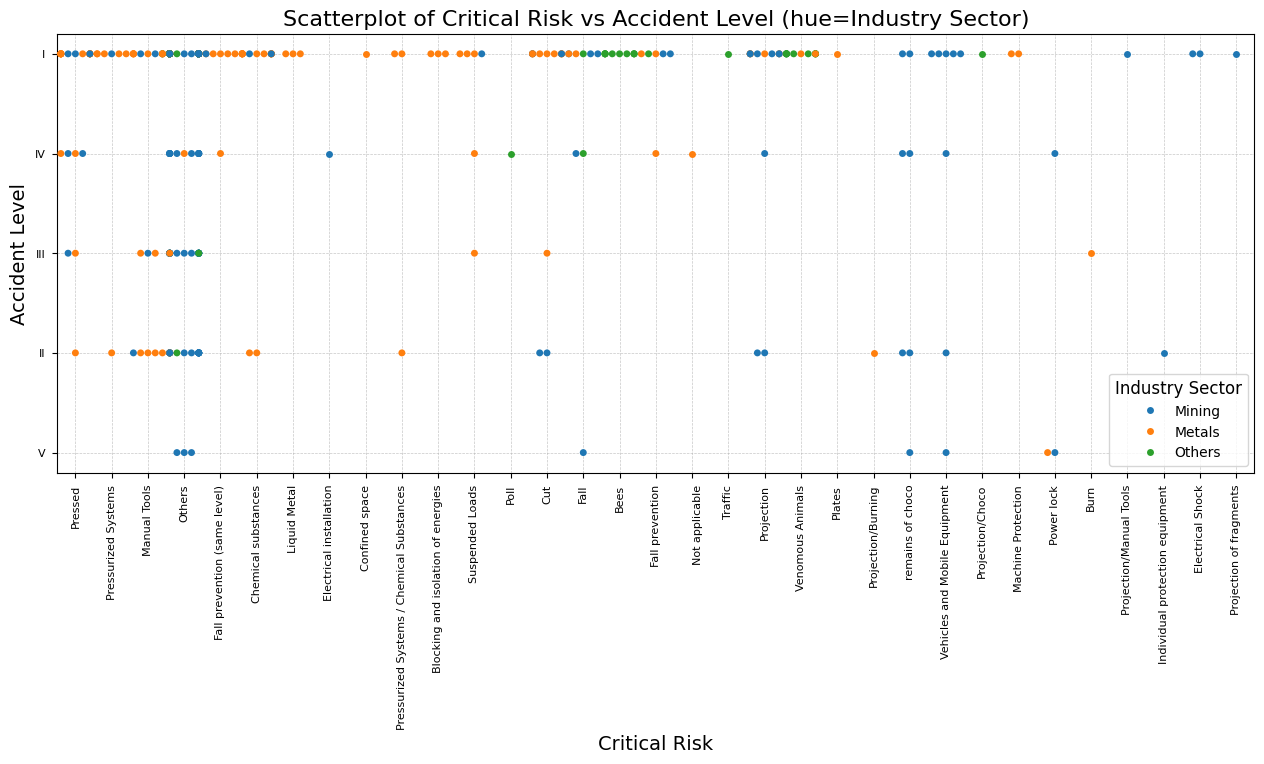

In [34]:
# Plot settings
bivariate_graphPrep('scatterplot',[( ('Critical Risk', 'Accident Level'),'Industry Sector')],df_ish,n_cols=1);



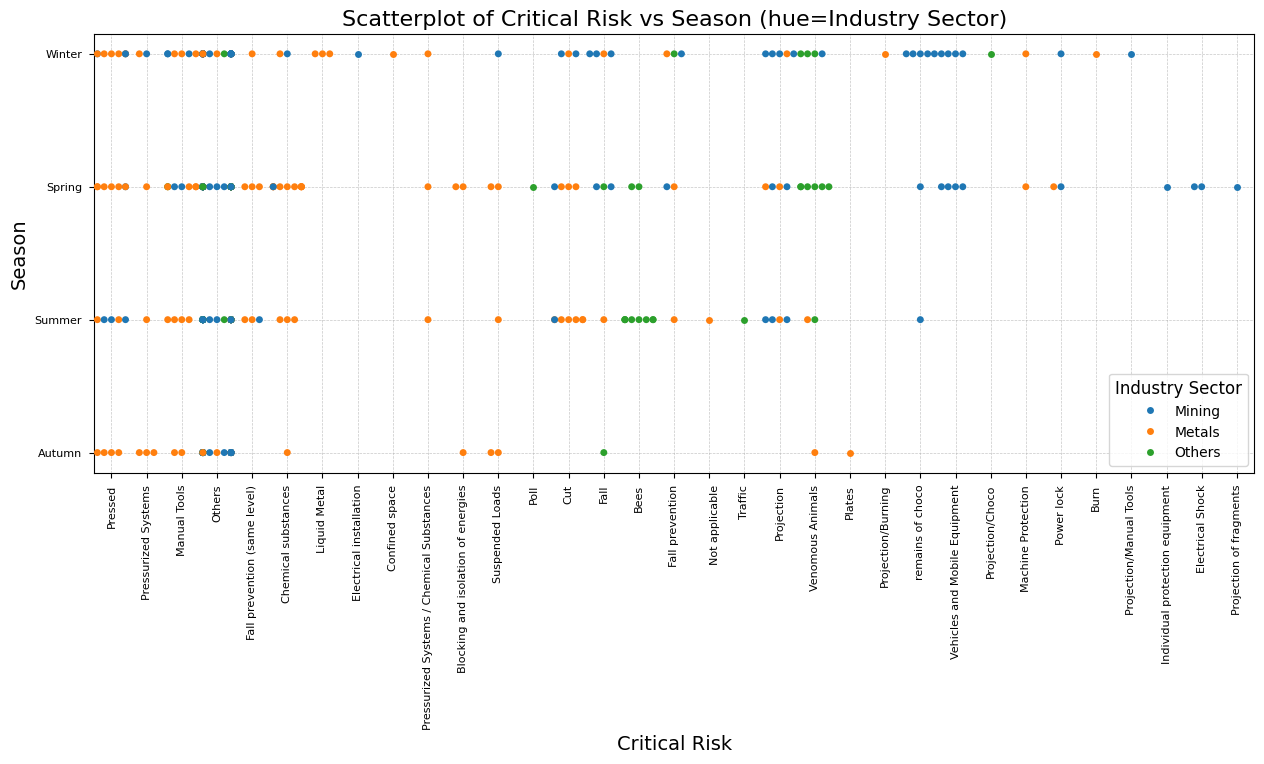

In [35]:
# Plot settings
bivariate_graphPrep('scatterplot', [(('Critical Risk','Season'), 'Industry Sector') ],df_ish,1);



### Feature extraction after analysis and catagoriation

In [36]:
#Data engineering

df_ish.dtypes

#creating month_year column
df_ish['Month_year'] = df_ish['Month'].astype(str) + '-' + df_ish['Year'].astype(str)



#creating locality code column
df_ish['Local_code'] = df_ish['Country'].astype(str) + '-' + df_ish['Local'].astype(str)


#dropping year, month, day, country, local columns
df_ish.drop(['Year','Date', 'Month', 'Day', 'Country','Local'], inplace=True, axis=1)


In [37]:
#again defining cat and num cols

df_ish_cat_variable,df_ish_num_variable= cat_num_variable(df_ish)

df_ish_cat_variable.remove('Description')
print(f'Catagorical variables after Removing Description :{df_ish_cat_variable}')

Catagorical variable : ['Industry Sector', 'Accident Level', 'Potential Accident Level', 'Gender', 'Employee Type', 'Critical Risk', 'Description', 'Weekday', 'Season', 'Month_year', 'Local_code']
Numerical variable : []
Catagorical variables after Removing Description :['Industry Sector', 'Accident Level', 'Potential Accident Level', 'Gender', 'Employee Type', 'Critical Risk', 'Weekday', 'Season', 'Month_year', 'Local_code']


# Data Preparation

---



## Target variable Label encoding

In [38]:
df_ish['Accident Level'].value_counts()

Accident Level
I      309
II      40
III     31
IV      30
V        8
Name: count, dtype: int64

In [39]:
encoded_df_ish = df_ish.copy()

In [40]:
#column mapping for accident level
category_mapping = {
    'I': 0,
    'II': 0,
    'III': 1,
    'IV': 1,
    'V': 2
}

#column mapping applied to accident level
encoded_df_ish['Accident_Level_groupped'] = encoded_df_ish['Accident Level'].map(category_mapping)

In [41]:
encoded_df_ish.head(5)

Industry Sector Accident Level Potential Accident Level Gender  \
0          Mining              I                       IV   Male   
1          Mining              I                       IV   Male   
2          Mining              I                      III   Male   
3          Mining              I                        I   Male   
4          Mining             IV                       IV   Male   

          Employee Type        Critical Risk  \
0           Third Party              Pressed   
1              Employee  Pressurized Systems   
2  Third Party (Remote)         Manual Tools   
3           Third Party               Others   
4           Third Party               Others   

                                         Description    Weekday  Season  \
0  While removing the drill rod of the Jumbo 08 f...     Friday  Winter   
1  During the activation of a sodium sulphide pum...   Saturday  Winter   
2  In the sub-station MILPO located at level +170...  Wednesday  Winter   
3  Being 9:45 am. approximately in the Nv. 1880 C...     Friday  Winter   
4  Approximately at 11:45 a.m. in circumstances t...     Sunday  Winter   

  Month_year           Local_code  Accident_Level_groupped  
0     1-2016  Country_01-Local_01                        0  
1     1-2016  Country_02-Local_02                        0  
2     1-2016  Country_01-Local_03                        0  
3     1-2016  Country_01-Local_04                        0  
4     1-2016  Country_01-Local_04                        1

## Text preprocessing

In [42]:
#defining stopwords

STOPWORDS.update(["cm", "kg", "mr", "wa" ,"nv", "ore", "da", "pm", "am", "cx","cm", "my","cm x","one", "the", "and", "that" ,'.', ',','employee', 'on', 'wet', 'floor', 'causing', 'injury', 'to', 'left',
 ])
print(STOPWORDS)

{"you'll", 'here', 'com', 'yours', "couldn't", 'because', "it's", 'wa', "he'd", "doesn't", 'about', 'and', "we'll", "that's", 'one', 'when', 'the', 'why', 'below', "when's", 'both', "who's", 'get', 'causing', 'there', 'injury', 'shall', 'been', 'not', 'having', 'do', 'own', 'no', 'too', 'cm', "they'd", 'after', 'cannot', 'down', "he's", 'da', "they've", "don't", 'few', "how's", "you're", 'under', 'floor', "they're", "mustn't", 'otherwise', 'he', "can't", 'into', 'mr', 'just', 'with', "here's", 'their', 'those', 'hence', 'would', 'or', 'does', 'we', 'again', 'over', 'itself', 'but', 'since', "we'd", "there's", 'it', 'my', 'an', 'how', 'yourself', 'hers', "where's", "wasn't", 'his', 'have', ',', 'until', 'be', "weren't", 'by', 'cx', 'if', 'during', "she'll", 'yourselves', 'that', 'who', 'in', 'only', "you've", "wouldn't", 'while', 'then', "let's", 'these', 'himself', 'to', 'k', 'before', "didn't", "what's", 'each', 'such', 'our', "hasn't", 'they', 'of', "i'll", 'themselves', "shan't", 's

In [43]:
#function for text preprocessing

def text_preprocessing(row):
    sentence = row.Description
    #convert all characters to lowercase
    lowered = sentence.lower()

     #remove alphanumeric charcater
    pattern=r'[^a-zA-Z\s]'
    formatted=re.sub(pattern, ' ', lowered)

    formatted = re.sub(r'\b[a-zA-Z]\b', '', formatted)

    #  removing white space
    formatted = formatted.strip()

    tokens = tokenize.word_tokenize(formatted)
    tokens = [token for token in tokens if len(token)>2]

    #lemmatizing & stemming
    lemmatizer = stem.WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(i) for i in tokens if i not in STOPWORDS]


    return " ".join(lemmatized)


In [44]:
#preprocessing function applied to description column

encoded_df_ish['Description_processed'] = encoded_df_ish.apply(text_preprocessing, axis=1)


In [45]:
#description visulaization before and after preprocessing

encoded_df_ish[['Description','Description_processed']].head(5)

Description  \
0  While removing the drill rod of the Jumbo 08 f...   
1  During the activation of a sodium sulphide pum...   
2  In the sub-station MILPO located at level +170...   
3  Being 9:45 am. approximately in the Nv. 1880 C...   
4  Approximately at 11:45 a.m. in circumstances t...   

                               Description_processed  
0  removing drill rod jumbo maintenance superviso...  
1  activation sodium sulphide pump piping uncoupl...  
2  sub station milpo located level collaborator e...  
3  approximately personnel begin task unlocking s...  
4  approximately circumstance mechanic anthony gr...

## Text processing Analysis

### Word Cloud Analysis

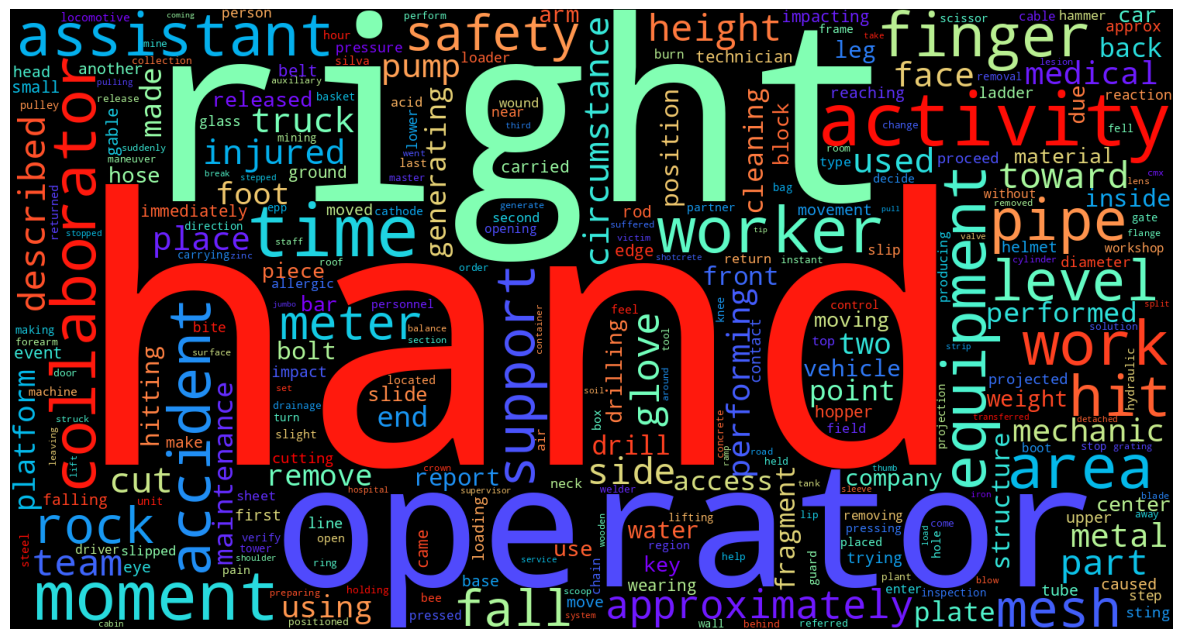

In [46]:
wordcloud = WordCloud(width = 1500, height = 800, random_state=0, background_color='black', colormap='rainbow', \
                      min_font_size=5, max_words=300, collocations=False, min_word_length=3, stopwords = STOPWORDS).generate(" ".join(encoded_df_ish['Description_processed'].values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### unigram, Bi-Gram & tri-gram Presentation

In [47]:
def ngram_func(ngram, trg='', trg_value=''):
    #trg_value is list-object
    if (trg == '') or (trg_value == ''):
        string_filterd =  encoded_df_ish['Description_processed'].sum().split()
    else:
        string_filterd =  encoded_df_ish[Desc_df_ish[trg].isin(trg_value)]['Description_processed'].sum().split()
    dic = nltk.FreqDist(nltk.ngrams(string_filterd, ngram)).most_common(30)
    ngram_df = pd.DataFrame(dic, columns=['ngram','count'])
    ngram_df.index = [' '.join(i) for i in ngram_df.ngram]
    ngram_df.drop('ngram',axis=1, inplace=True)
    return ngram_df

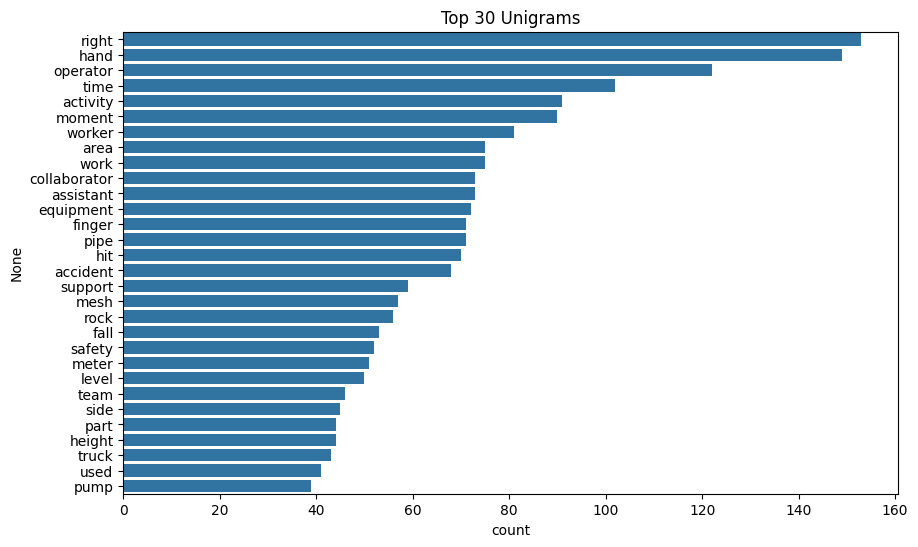

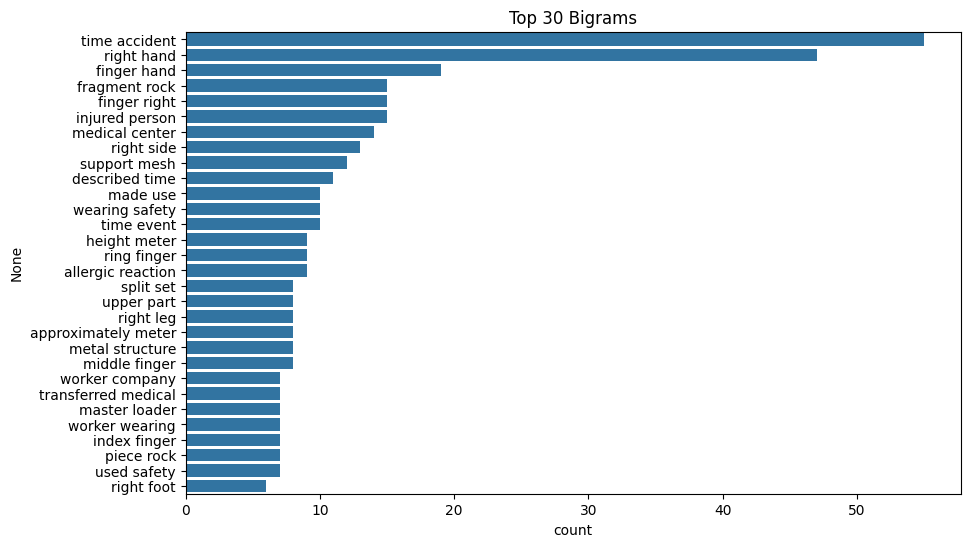

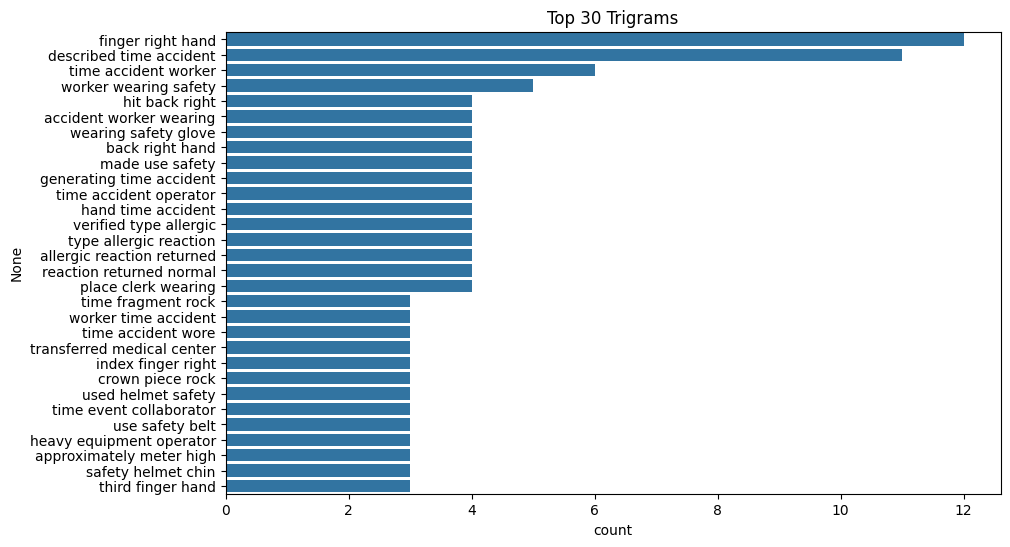

In [48]:
def create_ngram_chart(ngram_df, title):
  plt.figure(figsize=(10, 6))
  sns.barplot(y=ngram_df.index, x='count', data=ngram_df)
  plt.title(title)
  plt.show()

# Unigrams
unigram_df = ngram_func(1)
create_ngram_chart(unigram_df, 'Top 30 Unigrams')

# Bigrams
bigram_df = ngram_func(2)
create_ngram_chart(bigram_df, 'Top 30 Bigrams')

# Trigrams
trigram_df = ngram_func(3)
create_ngram_chart(trigram_df, 'Top 30 Trigrams')




## Text embedding

In [49]:
#defining y variable

y=encoded_df_ish['Accident_Level_groupped']

### GLOVE Embedding

In [50]:
#defining glove model
glove_input_file='/content/drive/MyDrive/Capstone/glove.6B.100d.txt'
glove_output_file= '/content/drive/MyDrive/Capstone/glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file,glove_output_file)
model_glove = keyedvectors.load_word2vec_format(glove_output_file, binary = False)
with open('/content/drive/MyDrive/Capstone/glove_model.pkl', 'wb') as file:
     pickle.dump(model_glove, file)

In [51]:
with open('/content/drive/MyDrive/Capstone/glove_model.pkl', 'rb') as file:
    model_glove = pickle.load(file)


In [52]:
#creating glove model dictionary


print(f'Length of Glove vocab is : {len(model_glove.index_to_key)}')

glove_words = model_glove.index_to_key
glove_words_vectors=model_glove.vectors

glove_dictionary = dict(zip(glove_words, glove_words_vectors))


Length of Glove vocab is : 400000


In [53]:
#function to average the vector for glove model

vec_size=100

def average_vectorization_glove(text):
    feature_vector= np.zeros((vec_size,), dtype='float64')

    words_in_vocab= [word for word in text.split() if word in glove_words]

    for word in words_in_vocab:
        feature_vector+=np.array(glove_dictionary[word])

    if words_in_vocab != 0:
        feature_vector/=len(words_in_vocab)

    return feature_vector



In [54]:
#creating test train split on glove embedding data as independent variable
np.random.seed(42)

X_glove_embedded=np.array(encoded_df_ish['Description_processed'].apply(average_vectorization_glove).tolist())

X_glove_embedded_df =pd.DataFrame(X_glove_embedded)

X_glove_train, X_glove_test, y_glove_train, y_glove_test = train_test_split(X_glove_embedded_df, y, test_size=0.3, random_state=42)


### TF-IDF Vectorization

In [55]:
#TF-IDF Vectorization
np.random.seed(42)
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1,3), stop_words='english')
X_tfidf_embedding = tfidf.fit_transform(encoded_df_ish['Description_processed']).toarray()

svd = TruncatedSVD(n_components=100, random_state=42)
X_tfidf_train_svd_selected = svd.fit_transform(X_tfidf_embedding)

X_tfidf_train_svd_selected_df =pd.DataFrame(X_tfidf_train_svd_selected)


#creating test train split and data on TF-IDF embedding data as independent variable
np.random.seed(42)

X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(
    X_tfidf_train_svd_selected_df, y, test_size=0.3,random_state=42)


## Utility functions for evaluating model performance

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

columns= ['Classifier', 'Train Accuracy', 'Test Accuracy','Train F1 Score(avg)', 'Test F1 Score(avg)','Train F1 Score(macro)', 'Test F1 Score(macro)','Train Recall', 'Test Recall','Train Precision (avg)' ,'Test Precision (avg)', 'Test Time','cv score']
result_df_final = pd.DataFrame(columns=columns)

def confusion_metrics(model, model_name, embedding_matrix, y_train, y_pred_train, y_test, y_pred):
    test_time = None
    cv_score = None

    cm = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=cm)
    display.plot(cmap='Blues')

    acc_test = accuracy_score(y_test, y_pred)
    precision_test_macro = precision_score(y_test, y_pred, average='macro')
    precision_test_avg = precision_score(y_test, y_pred, average='weighted')

    recall_test = recall_score(y_test, y_pred, average='weighted')
    f1_test = f1_score(y_test, y_pred, average='weighted')
    f1_test_macro=f1_score(y_test, y_pred, average='macro')
    acc_train = accuracy_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train, average='weighted')
    f1_train_macro = f1_score(y_train, y_pred_train, average='macro')

    recall_train = recall_score(y_train, y_pred_train, average='weighted')
    precision_train_avg = precision_score(y_train, y_pred_train, average='weighted')
    precision_train_macro = precision_score(y_train, y_pred_train, average='macro')


    print(f'Accuracy : {acc_test}')
    print(f'Precision (macro) : {precision_test_macro}')
    print(f'Precision (avg): {precision_test_avg}')
    print(f'Recall : {recall_test}')
    print(f'F1-Score : {f1_test}')
    plt.grid(True)
    plt.show()

    full_model_name = f'{model_name} with {embedding_matrix}'

    global result_df_final
    new_row = pd.DataFrame([[
    full_model_name,
    acc_train, acc_test,
    f1_train, f1_test,
    f1_train_macro, f1_test_macro,
    recall_train, recall_test,
    precision_train_avg, precision_test_avg,
    test_time if test_time else '-',
    cv_score if cv_score else '-'
    ]], columns=result_df_final.columns)

    result_df_final = pd.concat([result_df_final, new_row], ignore_index=True)


    return result_df_final


# ML Model Building & Performance Analysis

---



### ML Model fitting function declaration

In [57]:

#function to run the model with CV and its hyperparameter tuning and check its  confusion matrix

def modelFitting(model, model_name, embedding_matrix, X_train, y_train, X_test, y_test, isGridSearchNeeded, param_grid):
    start = time.time()
    result = []
    score_mean = None

    # Ensure inputs are NumPy arrays
    X_train = np.asarray(X_train)
    X_test = np.asarray(X_test)
    y_train = np.asarray(y_train)
    y_test = np.asarray(y_test)

    # Convert to DataFrame for feature selection (if needed)
    X_train_df = pd.DataFrame(X_train)
    X_test_df = pd.DataFrame(X_test)

    cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    # Fit initial model to compute feature importance
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Feature importance handling
    try:
        importances = pd.Series(model.feature_importances_, index=X_train_df.columns)
    except AttributeError:
        if isinstance(model, VotingClassifier):
            try:
                rf_importances = model.named_estimators_['rf'].feature_importances_
                xgb_importances = model.named_estimators_['xgb'].feature_importances_
                importances = pd.Series((rf_importances + xgb_importances) / 2, index=X_train_df.columns)
            except Exception as e:
                print(f"Could not compute ensemble feature importances: {e}")
                importances = pd.Series(np.zeros(X_train_df.shape[1]), index=X_train_df.columns)
        else:
            print(f"{model_name} does not support feature_importances_")
            importances = pd.Series(np.zeros(X_train_df.shape[1]), index=X_train_df.columns)

    # Select least important features dynamically (e.g., bottom 10%)
    n_features_to_drop = int(0.1 * X_train_df.shape[1])  # Drop bottom 10% of features
    least_important_features = importances.sort_values(ascending=True).head(n_features_to_drop).index.tolist()

    X_train_reduced = X_train_df.drop(columns=least_important_features, errors='ignore')
    X_test_reduced = X_test_df.drop(columns=least_important_features, errors='ignore')

    # Clone model for fresh training
    model = clone(model)

    if isGridSearchNeeded:
        search = RandomizedSearchCV(model, param_grid, cv=cv, n_jobs=-1, verbose=2, scoring='accuracy', n_iter=20, random_state=42)
        search.fit(X_train_reduced, y_train)
        model = search.best_estimator_
        y_pred = search.predict(X_test_reduced)
        y_pred_train = search.predict(X_train_reduced)
        score_mean = search.best_score_
        print(f'Grid Search Best Estimator: {search.best_estimator_}')
        print(f'Grid Search Best Parameters: {search.best_params_}')
        print(f'Grid Search Best Score: {score_mean}')
    else:
        scores = cross_val_score(model, X_train_reduced, y_train, cv=cv, scoring='accuracy')
        score_mean = scores.mean()
        print("Cross-validation scores:", scores)
        print("Mean accuracy:", score_mean)
        model.fit(X_train_reduced, y_train)
        y_pred = model.predict(X_test_reduced)
        y_pred_train = model.predict(X_train_reduced)

    # Handle predictions (avoid np.argmax for non-probability outputs)
    if hasattr(model, 'predict_proba'):
        y_pred_train = np.argmax(model.predict_proba(X_train_reduced), axis=1) if y_pred_train.ndim > 1 else y_pred_train
        y_pred = np.argmax(model.predict_proba(X_test_reduced), axis=1) if y_pred.ndim > 1 else y_pred
    else:
        y_pred_train = y_pred_train.flatten()
        y_pred = y_pred.flatten()

    print(f"\n=== {model_name} - Test Set ===")
    confusion_metrics(model, model_name, embedding_matrix, y_train, y_pred_train, y_test, y_pred)

    # Training metrics
    training_time = time.time() - start
    acc_train = accuracy_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train, average='weighted')
    recall_train = recall_score(y_train, y_pred_train, average='weighted')
    precision_train = precision_score(y_train, y_pred_train, average='weighted')

    # Test metrics
    start = time.time()
    y_pred = model.predict(X_test_reduced)  # Recompute predictions for accurate timing
    test_time = time.time() - start
    acc_test = accuracy_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred, average='weighted')
    recall_test = recall_score(y_test, y_pred, average='weighted')
    precision_test = precision_score(y_test, y_pred, average='weighted')

    result.append([model_name, acc_train, f1_train, recall_train, precision_train, training_time,
                   acc_test, f1_test, recall_test, precision_test, test_time, score_mean])
    return result


# function to add the result in a dataframe
def resultToDf(result):
    columns= ['Classifier', 'Train Accuracy', 'Train F1 Score', 'Train Recall', 'Train Precision', 'Training Time', 'Test Accuracy', 'Test F1 Score', 'Test Recall', 'Test Precision', 'Test Time','cv score']
    return pd.DataFrame(result, columns=columns)

#model to check te performance and return the input dataframe and its result
def checkModelPerformance(embedding_matrix, isGridSearchNeeded, paramGrid):
  results=[]
  if embedding_matrix == 'glove':
    X_train, X_test, y_train, y_test = X_glove_train, X_glove_test, y_glove_train, y_glove_test

  else:
    X_train, X_test, y_train, y_test = X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test


  df =pd.DataFrame(X_train)
  print(f' Dataframe: \n{df.head(5)}')

  for model_name, model in models.items():
        print(f"\n---------------- {model_name} ----------------")

        model = clone(model)
        param_grid = paramGrids.get(model_name, {})  # get param grid for this model, or empty if none
        model_result = modelFitting(model, model_name, embedding_matrix,X_train, y_train, X_test, y_test, isGridSearchNeeded, param_grid)
        results.extend(model_result)
  results_df= resultToDf(results)
  return df,  results_df

## XG Boost and Random Forest

In [58]:
#Model Building

model_xgboost = xgb.XGBClassifier(class_weight='balanced', random_state=42, subsample=0.8, eval_metric='mlogloss')
model_rf= RandomForestClassifier(class_weight='balanced', bootstrap=True)



## Voting Classifier models

In [59]:
#Voting classifier on random forest and XG boost

ensemble_model = VotingClassifier(
    estimators=[
        ('rf', model_rf),
        ('xgb', model_xgboost)
    ],
    voting='soft'
)

#Voting classifier with weight on random forest and XG boost


ensemble_model_w = VotingClassifier(
    estimators=[
        ('rf', model_rf),
        ('xgb', model_xgboost)
    ],
    voting='soft',
    weights=[3,2]  )

## Param declaration for Hyper parameter tuning

In [60]:
#defining models and their hyperparmeter in JSON

models={
    'Random Forest':model_rf,
    'xgboost':model_xgboost,
    'ensemble Model' : ensemble_model,
    'ensemble Model w' : ensemble_model_w,
}

paramGrids = {
    'xgboost': {
        'n_estimators': [250, 230, 270],
        'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [5, 4, 6],
    'learning_rate': [0.01, 0.08, 0.1],
    'scale_pos_weight':['auto_weight_for_imbalance'],
    'class_weight': ['balanced']

    },
    'Random Forest': {
        'n_estimators': [420, 400,370],
    'max_depth': [20,40,50],
    'min_samples_split': [2, 3],
        'min_samples_leaf':[3,1,5],
    'class_weight': ['balanced'],
    'bootstrap': [True],
        'max_features': [ 'sqrt', 'log2']

        },
    'ensemble Model':{
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1],
},
   'ensemble Model w': {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10],
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5],
    'xgb__learning_rate': [0.05, 0.1],
    'weights': [(1, 1), (2, 1), (1, 2), (3, 2)]
}
}



## ML Models testing & performance exploration

### Different ML models using **glove** embedding

 Dataframe: 
           0         1         2         3         4         5         6   \
118 -0.056184  0.177656  0.174576  0.045556 -0.193893 -0.088288 -0.105643   
271 -0.179080  0.114483  0.295197 -0.303266 -0.062244  0.130315 -0.194258   
114 -0.056861  0.334826 -0.014339 -0.029970 -0.211213 -0.038787 -0.245522   
311  0.021858  0.124828  0.058508 -0.061422  0.058099 -0.106459  0.002638   
131 -0.178758  0.053583  0.137200 -0.357772  0.165735  0.213804 -0.135574   

           7         8         9   ...        90        91        92  \
118  0.334605  0.019906  0.123581  ...  0.133245 -0.126663 -0.087192   
271  0.097784 -0.012458  0.107867  ... -0.326409 -0.127338 -0.050805   
114  0.246878 -0.142466  0.134186  ... -0.193840 -0.045271 -0.131900   
311  0.028145 -0.030354  0.155111  ... -0.213158  0.313407 -0.147785   
131  0.127943  0.127478  0.271656  ...  0.074759 -0.169716 -0.151178   

           93        94        95        96        97        98        99  
118  0.125817 -

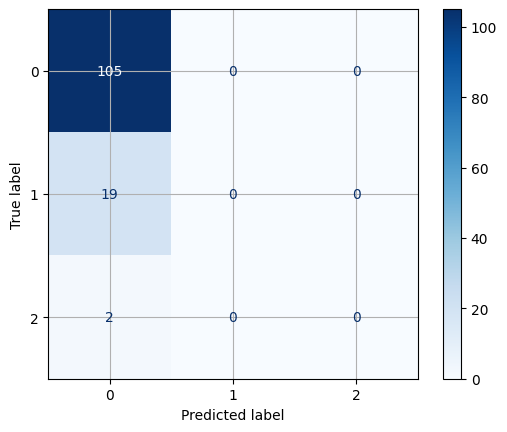


---------------- xgboost ----------------
Cross-validation scores: [0.83050847 0.79661017 0.84482759 0.87931034 0.82758621]
Mean accuracy: 0.8357685563997663

=== xgboost - Test Set ===
Accuracy : 0.8571428571428571
Precision (macro) : 0.5128205128205128
Precision (avg): 0.827024827024827
Recall : 0.8571428571428571
F1-Score : 0.8303916161059018


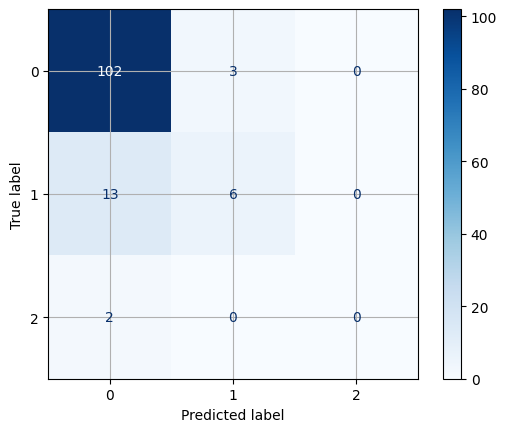


---------------- ensemble Model ----------------
Cross-validation scores: [0.83050847 0.79661017 0.84482759 0.86206897 0.82758621]
Mean accuracy: 0.8323202805376972

=== ensemble Model - Test Set ===
Accuracy : 0.8492063492063492
Precision (macro) : 0.5341530054644809
Precision (avg): 0.8234777517564402
Recall : 0.8492063492063492
F1-Score : 0.8029204403462209


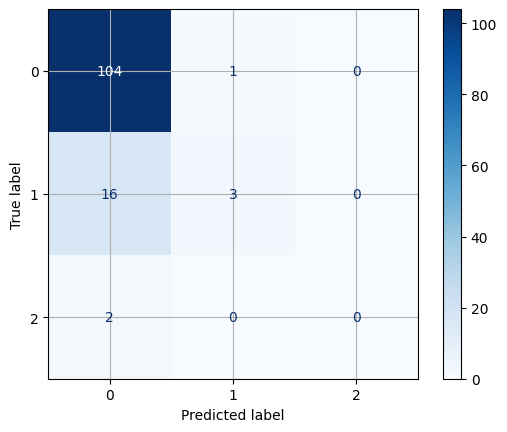


---------------- ensemble Model w ----------------
Cross-validation scores: [0.83050847 0.79661017 0.84482759 0.84482759 0.82758621]
Mean accuracy: 0.8288720046756284

=== ensemble Model w - Test Set ===
Accuracy : 0.8492063492063492
Precision (macro) : 0.6155913978494624
Precision (avg): 0.8564388120839734
Recall : 0.8492063492063492
F1-Score : 0.7929147398891628


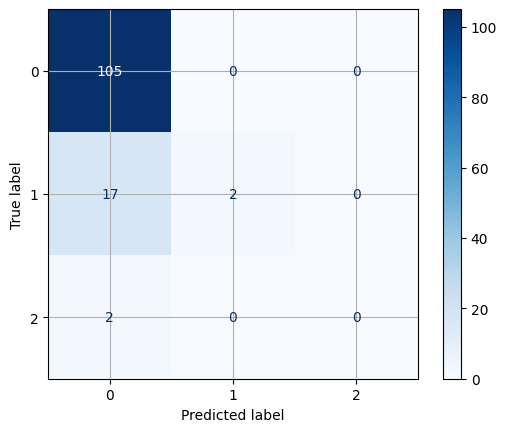

Classifier  Train Accuracy  Train F1 Score  Train Recall  \
0     Random Forest        0.996575        0.996592      0.996575   
1           xgboost        0.996575        0.996558      0.996575   
2    ensemble Model        0.996575        0.996592      0.996575   
3  ensemble Model w        0.996575        0.996592      0.996575   

   Train Precision  Training Time  Test Accuracy  Test F1 Score  Test Recall  \
0         0.996655       1.751820       0.833333       0.757576     0.833333   
1         0.996589       4.207625       0.857143       0.830392     0.857143   
2         0.996655       7.796061       0.849206       0.802920     0.849206   
3         0.996655       5.233331       0.849206       0.792915     0.849206   

   Test Precision  Test Time  cv score  
0        0.694444   0.011678  0.828872  
1        0.827025   0.019301  0.835769  
2        0.823478   0.026343  0.832320  
3        0.856439   0.027977  0.828872

In [61]:
# Testing glove embedding model performance with all the defined classifiers

glove_df,result_glove_df = checkModelPerformance('glove', False, {})
result_glove_df

### Different ML models using **TF-IDF** embedding

 Dataframe: 
           0         1         2         3         4         5         6   \
118  0.188436  0.099968 -0.076000 -0.015923 -0.099695 -0.047942 -0.071160   
271  0.091592 -0.116181 -0.021995  0.034526  0.004983  0.110230 -0.049610   
114  0.134943  0.066018 -0.004363 -0.013355  0.027673 -0.040776 -0.026864   
311  0.183889 -0.184939  0.110300 -0.070630  0.142109  0.025369  0.028994   
131  0.101048 -0.187166  0.026439 -0.004623  0.049992  0.124609 -0.044363   

           7         8         9   ...        90        91        92  \
118 -0.073575 -0.076155 -0.052180  ...  0.077940  0.066760 -0.049240   
271  0.043311 -0.027260 -0.100401  ... -0.026688 -0.039597 -0.043832   
114 -0.069484 -0.002781 -0.037861  ...  0.050448  0.017158  0.152878   
311  0.010995  0.045685 -0.092659  ... -0.073875  0.025463  0.033079   
131  0.005140 -0.076758  0.090388  ... -0.151817 -0.069046  0.061397   

           93        94        95        96        97        98        99  
118  0.051502  

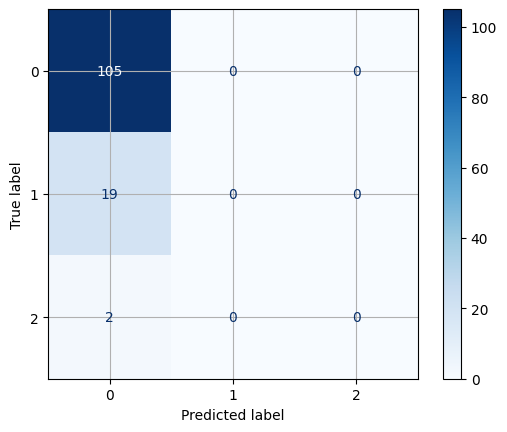


---------------- xgboost ----------------
Cross-validation scores: [0.84745763 0.76271186 0.82758621 0.84482759 0.81034483]
Mean accuracy: 0.8185856224430157

=== xgboost - Test Set ===
Accuracy : 0.8333333333333334
Precision (macro) : 0.4480874316939891
Precision (avg): 0.7789487379651314
Recall : 0.8333333333333334
F1-Score : 0.7824658050668393


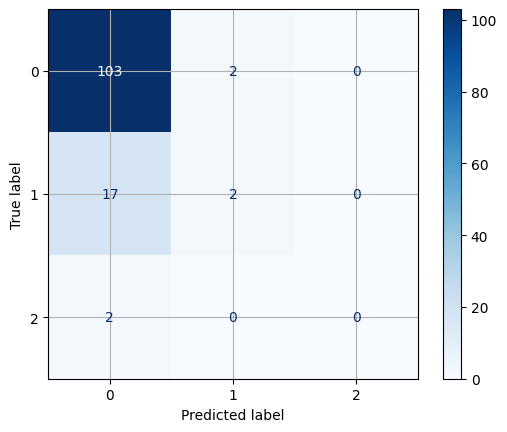


---------------- ensemble Model ----------------
Cross-validation scores: [0.83050847 0.79661017 0.84482759 0.84482759 0.82758621]
Mean accuracy: 0.8288720046756284

=== ensemble Model - Test Set ===
Accuracy : 0.8412698412698413
Precision (macro) : 0.6133333333333333
Precision (avg): 0.8507936507936508
Recall : 0.8412698412698413
F1-Score : 0.7759489302967564


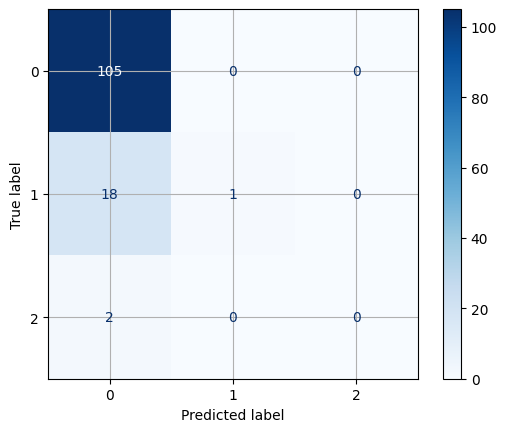


---------------- ensemble Model w ----------------
Cross-validation scores: [0.83050847 0.79661017 0.84482759 0.84482759 0.82758621]
Mean accuracy: 0.8288720046756284

=== ensemble Model w - Test Set ===
Accuracy : 0.8333333333333334
Precision (macro) : 0.2777777777777778
Precision (avg): 0.6944444444444444
Recall : 0.8333333333333334
F1-Score : 0.7575757575757576


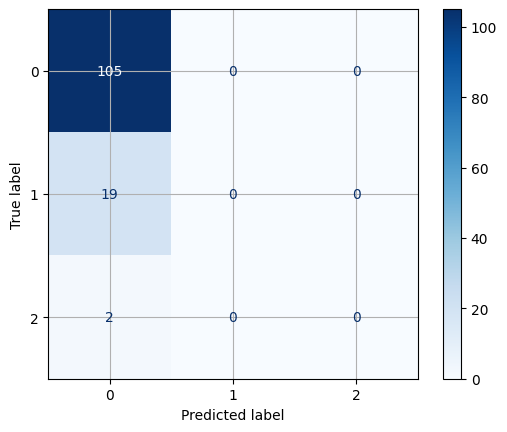

Classifier  Train Accuracy  Train F1 Score  Train Recall  \
0     Random Forest        0.993151        0.993216      0.993151   
1           xgboost        0.993151        0.993081      0.993151   
2    ensemble Model        0.993151        0.993216      0.993151   
3  ensemble Model w        0.993151        0.993216      0.993151   

   Train Precision  Training Time  Test Accuracy  Test F1 Score  Test Recall  \
0         0.993462       1.807230       0.833333       0.757576     0.833333   
1         0.993206       5.023685       0.833333       0.782466     0.833333   
2         0.993462       5.301445       0.841270       0.775949     0.841270   
3         0.993462       6.423100       0.833333       0.757576     0.833333   

   Test Precision  Test Time  cv score  
0        0.694444   0.008217  0.828872  
1        0.778949   0.018924  0.818586  
2        0.850794   0.028287  0.828872  
3        0.694444   0.074835  0.828872

In [62]:
# Testing tfidf embedding model performance with all the defined classifiers

tfidf_df, result_tfidf_df= checkModelPerformance('tfidf', False, {})
result_tfidf_df


### Different **hyperparameter tuned** ML models using **glove** embedding

 Dataframe: 
           0         1         2         3         4         5         6   \
118 -0.056184  0.177656  0.174576  0.045556 -0.193893 -0.088288 -0.105643   
271 -0.179080  0.114483  0.295197 -0.303266 -0.062244  0.130315 -0.194258   
114 -0.056861  0.334826 -0.014339 -0.029970 -0.211213 -0.038787 -0.245522   
311  0.021858  0.124828  0.058508 -0.061422  0.058099 -0.106459  0.002638   
131 -0.178758  0.053583  0.137200 -0.357772  0.165735  0.213804 -0.135574   

           7         8         9   ...        90        91        92  \
118  0.334605  0.019906  0.123581  ...  0.133245 -0.126663 -0.087192   
271  0.097784 -0.012458  0.107867  ... -0.326409 -0.127338 -0.050805   
114  0.246878 -0.142466  0.134186  ... -0.193840 -0.045271 -0.131900   
311  0.028145 -0.030354  0.155111  ... -0.213158  0.313407 -0.147785   
131  0.127943  0.127478  0.271656  ...  0.074759 -0.169716 -0.151178   

           93        94        95        96        97        98        99  
118  0.125817 -

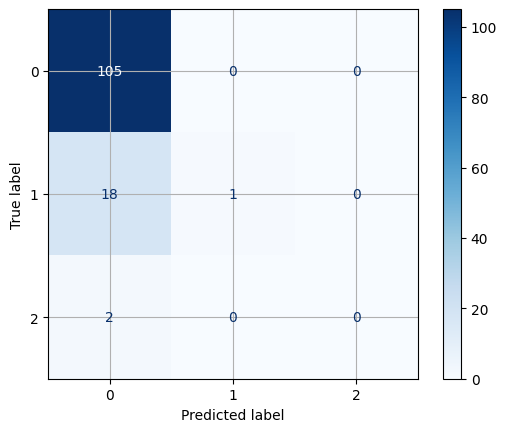


---------------- xgboost ----------------
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Grid Search Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.6, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=230, n_jobs=None,
              num_parallel_tree=None, ...)
Grid Search Best Parameters: {'subsample': 0.6, 'scale_pos_weight': 'auto_weight_for_imba

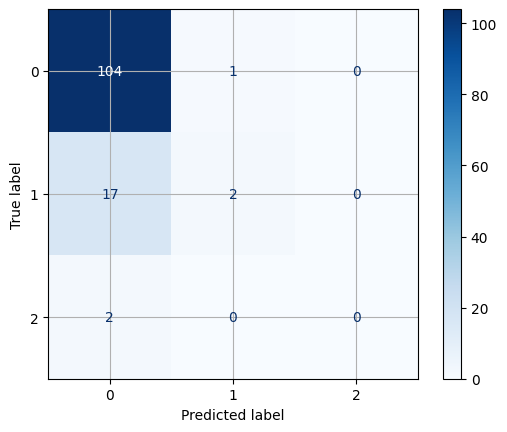


---------------- ensemble Model ----------------
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Grid Search Best Estimator: VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=20)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            class_weight='balanced',
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
           

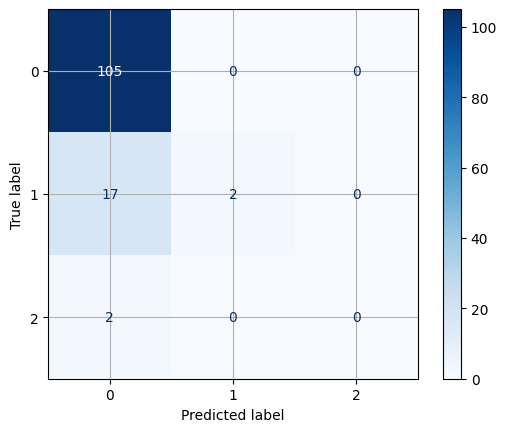


---------------- ensemble Model w ----------------
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Grid Search Best Estimator: VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     n_estimators=200)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            class_weight='balanced',
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
     

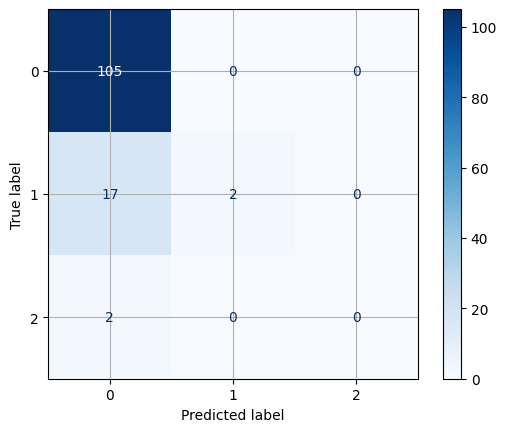

Classifier  Train Accuracy  Train F1 Score  Train Recall  \
0     Random Forest        0.996575        0.996592      0.996575   
1           xgboost        0.996575        0.996558      0.996575   
2    ensemble Model        0.996575        0.996592      0.996575   
3  ensemble Model w        0.996575        0.996592      0.996575   

   Train Precision  Training Time  Test Accuracy  Test F1 Score  Test Recall  \
0         0.996655      72.266037       0.841270       0.775949     0.841270   
1         0.996589     161.761228       0.841270       0.787651     0.841270   
2         0.996655     156.855411       0.849206       0.792915     0.849206   
3         0.996655     128.998138       0.849206       0.792915     0.849206   

   Test Precision  Test Time  cv score  
0        0.850794   0.034887  0.832262  
1        0.805136   0.018924  0.835652  
2        0.856439   0.024351  0.835652  
3        0.856439   0.036261  0.835710

In [63]:
# Testing glove embedding model performance with all the defined classifiers using hyperparameter tuning

df_glove,result_glove_grid_df = checkModelPerformance('glove', True, paramGrids)
result_glove_grid_df

### Different **hyperparameter tuned** ML models using **TF-IDF** embedding

 Dataframe: 
           0         1         2         3         4         5         6   \
118  0.188436  0.099968 -0.076000 -0.015923 -0.099695 -0.047942 -0.071160   
271  0.091592 -0.116181 -0.021995  0.034526  0.004983  0.110230 -0.049610   
114  0.134943  0.066018 -0.004363 -0.013355  0.027673 -0.040776 -0.026864   
311  0.183889 -0.184939  0.110300 -0.070630  0.142109  0.025369  0.028994   
131  0.101048 -0.187166  0.026439 -0.004623  0.049992  0.124609 -0.044363   

           7         8         9   ...        90        91        92  \
118 -0.073575 -0.076155 -0.052180  ...  0.077940  0.066760 -0.049240   
271  0.043311 -0.027260 -0.100401  ... -0.026688 -0.039597 -0.043832   
114 -0.069484 -0.002781 -0.037861  ...  0.050448  0.017158  0.152878   
311  0.010995  0.045685 -0.092659  ... -0.073875  0.025463  0.033079   
131  0.005140 -0.076758  0.090388  ... -0.151817 -0.069046  0.061397   

           93        94        95        96        97        98        99  
118  0.051502  

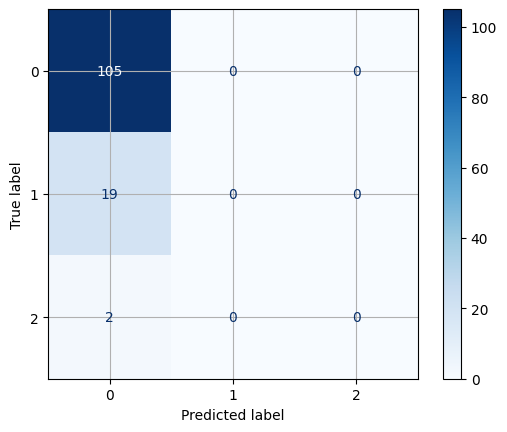


---------------- xgboost ----------------
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Grid Search Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.6, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=270, n_jobs=None,
              num_parallel_tree=None, ...)
Grid Search Best Parameters: {'subsample': 0.6, 'scale_pos_weight': 'auto_weight_for_imb

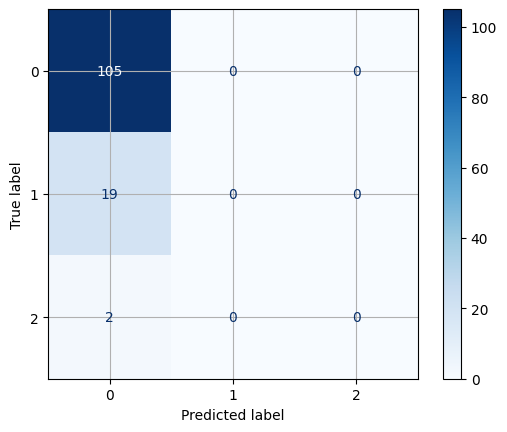


---------------- ensemble Model ----------------
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Grid Search Best Estimator: VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced')),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            class_weight='balanced',
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
  

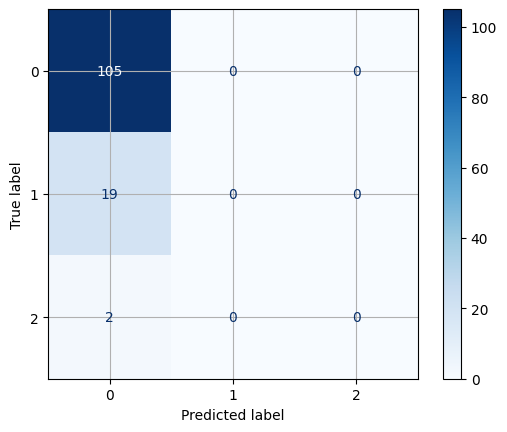


---------------- ensemble Model w ----------------
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Grid Search Best Estimator: VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     n_estimators=200)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            class_weight='balanced',
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
     

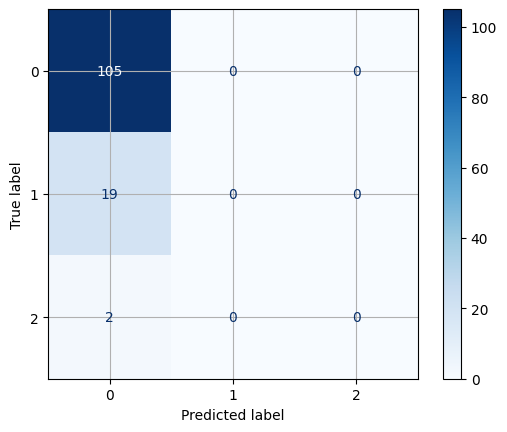

Classifier  Train Accuracy  Train F1 Score  Train Recall  \
0     Random Forest        0.993151        0.993216      0.993151   
1           xgboost        0.986301        0.985589      0.986301   
2    ensemble Model        0.993151        0.993151      0.993151   
3  ensemble Model w        0.993151        0.993216      0.993151   

   Train Precision  Training Time  Test Accuracy  Test F1 Score  Test Recall  \
0         0.993462      71.258850       0.833333       0.757576     0.833333   
1         0.986522     160.239827       0.833333       0.757576     0.833333   
2         0.993151     152.209462       0.833333       0.757576     0.833333   
3         0.993462     124.776594       0.833333       0.757576     0.833333   

   Test Precision  Test Time  cv score  
0        0.694444   0.031786  0.828872  
1        0.694444   0.020695  0.828872  
2        0.694444   0.034492  0.828872  
3        0.694444   0.033019  0.828872

In [64]:
# Testing tfidf embedding model performance with all the defined classifiers using hyperparameter tuning

tfidf_df,result_grid_tfidf_df = checkModelPerformance('tfidf', True, paramGrids)
result_grid_tfidf_df

# Neural Network

---




## Data Preparation

### Text summarization using facebook/bart-large-cnn












In [65]:
from tqdm import tqdm
tqdm.pandas()


fbsummarizer = pipeline("summarization", model="facebook/bart-large-cnn")
nlp = spacy.load("en_core_web_sm")


def extract_action_objects(text):

    doc = nlp(text)
    actions = []
    for token in doc:
        if token.pos_ in ["VERB", "NOUN", "ADJ"] and token.dep_ not in ("nsubj", "det", "poss"):
            actions.append(token.lemma_)
    return " ".join(actions)

def summarize_and_strip_subjects(text):
    prompt = "summarize: " + text
    summary = fbsummarizer(prompt, max_length=50, min_length=15, do_sample=False)[0]['summary_text']
    return extract_action_objects(summary)



encoded_df_ish['summary'] = encoded_df_ish['Description'].progress_apply(summarize_and_strip_subjects)



with open('/content/drive/MyDrive/Capstone/encoded_df_ish.pkl', 'wb') as file:
    pickle.dump(encoded_df_ish, file)

Device set to use cuda:0
100%|██████████| 418/418 [04:37<00:00,  1.50it/s]


In [66]:
with open('/content/drive/MyDrive/Capstone/encoded_df_ish.pkl', 'rb') as file:
      encoded_df_ish = pickle.load(file)

In [67]:
encoded_df_ish.loc[5, ['Description', 'summary']]

Description    During the unloading operation of the ustulado...
summary        unloading operation be need unclog discharge m...
Name: 5, dtype: object

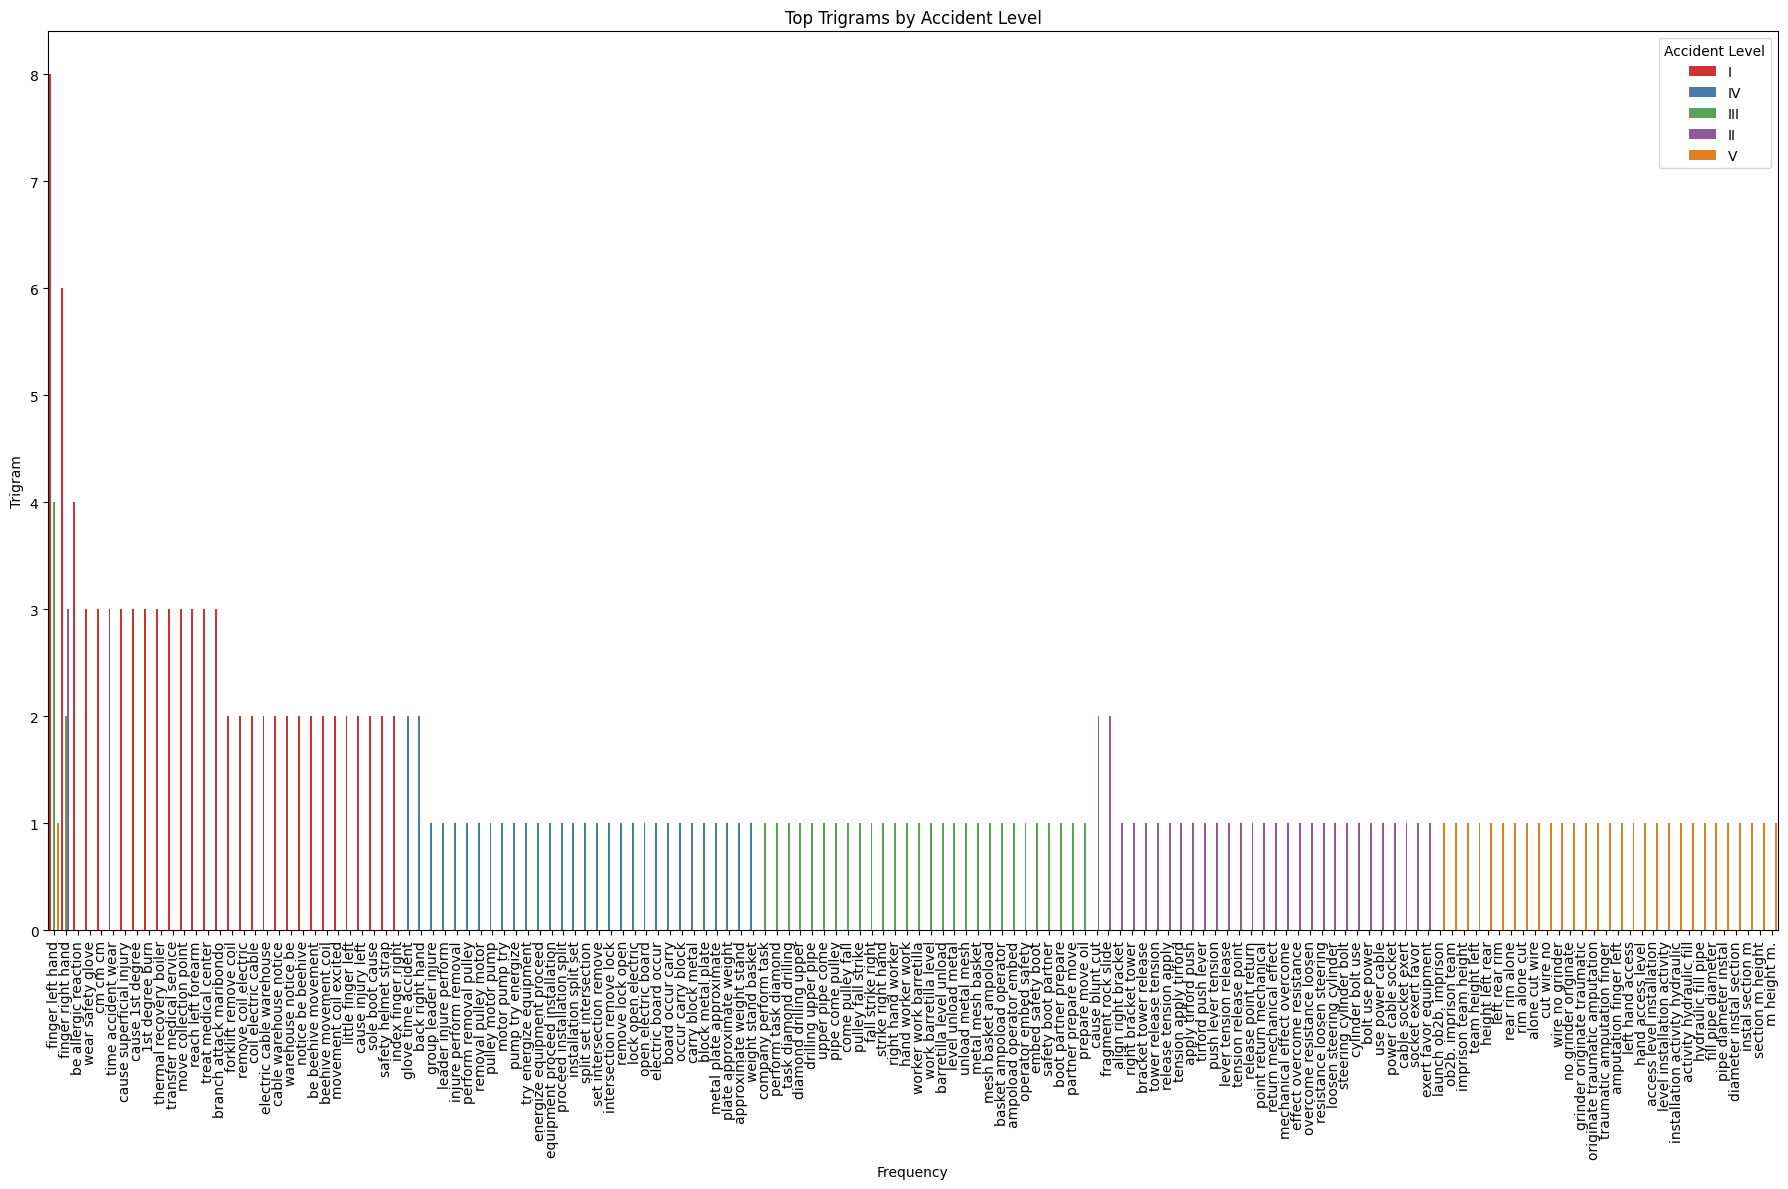

In [68]:
def ngram_func_per_level(df, text_col, label_col, n=3, top_k=30):

    from collections import Counter
    import pandas as pd
    import nltk

    records = []

    for level in df[label_col].unique():
        texts = df[df[label_col] == level][text_col]
        all_words = " ".join(texts).split()
        ngram_counts = nltk.FreqDist(nltk.ngrams(all_words, n)).most_common(top_k)

        for ngram, count in ngram_counts:
            records.append({
                'accident_level': level,
                'ngram': " ".join(ngram),
                'count': count
            })

    return pd.DataFrame(records)

raw_ish_df = pd.DataFrame({
    'Description_processed': encoded_df_ish['Description_processed'],
    'Accident Level': encoded_df_ish['Accident Level']

})

# Create the trigram DataFrame by accident level
trigram_level_df = ngram_func_per_level(encoded_df_ish, 'summary', 'Accident Level', n=3)

# Plot
plt.figure(figsize=(18, 12))
sns.barplot(
    data=trigram_level_df,
    x='ngram',
    y='count',
    hue='accident_level',
    palette='Set1'
)
plt.title('Top Trigrams by Accident Level')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.xticks(rotation=90)
plt.legend(title='Accident Level')
plt.tight_layout()
plt.show()


### Label Encoding on target variable

In [69]:
label_encoder = LabelEncoder()


y = label_encoder.fit_transform(encoded_df_ish['Accident Level'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print('label' )
print(label_mapping)

X=encoded_df_ish['summary'].astype(str).tolist()

X_raw, y_raw = X, y

label
{'I': 0, 'II': 1, 'III': 2, 'IV': 3, 'V': 4}


### Train-Test Split

In [70]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

y_train=pd.Series(y_train)


X_train_raw=X_train.copy()
X_test_raw=X_test.copy()
y_train_raw=y_train.copy()
y_test_raw=y_test.copy()

## Train Data Augmentation

0    0.739521
1    0.095808
2    0.074850
3    0.071856
4    0.017964
Name: proportion, dtype: float64

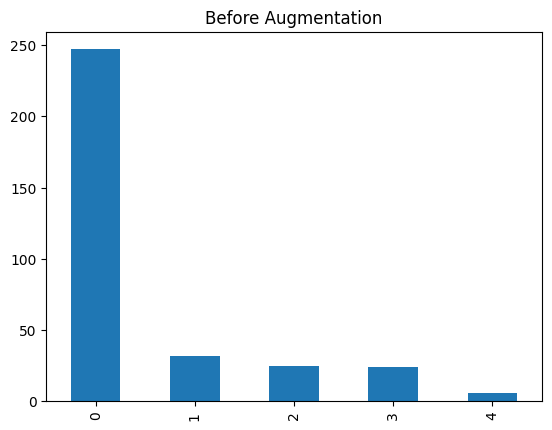

In [71]:
y_train.value_counts().plot(kind='bar', title="Before Augmentation")
y_train.value_counts(normalize=True)

### Back Translation

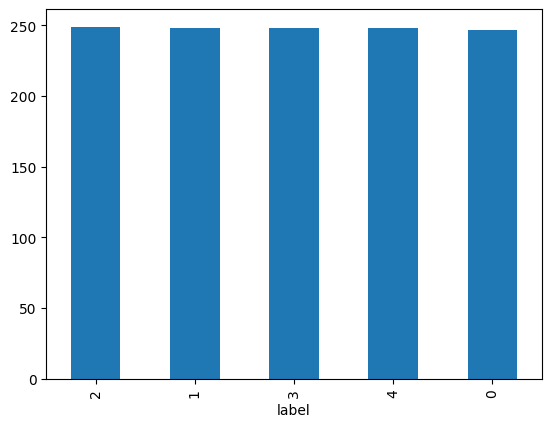

In [72]:
def augment_minority_classes_backtranslate(df, num_aug=2):
    from deep_translator import GoogleTranslator
    from collections import Counter

    def back_translate(text, src='en', mid='fr'):
        return GoogleTranslator(source=src, target=mid).translate(
            GoogleTranslator(source=mid, target=src).translate(text)
        )

    augmented_texts = []
    augmented_labels = []

    label_counts = df['label'].value_counts()
    max_count = label_counts.max()

    for label in label_counts.index:
        class_df = df[df['label'] == label]
        if label_counts[label] < max_count:
            gap = max_count - label_counts[label]
            samples_needed = gap // num_aug + 1

            for i, row in class_df.sample(samples_needed, replace=True).iterrows():
                augmented = [back_translate(row['text']) for _ in range(num_aug)]
                augmented_texts.extend(augmented)
                augmented_labels.extend([label] * len(augmented))

    aug_df = pd.DataFrame({'text': augmented_texts, 'label': augmented_labels})
    return pd.concat([df, aug_df], ignore_index=True)



df_augmented_bt = augment_minority_classes_backtranslate(pd.DataFrame({'text':X_train, 'label':y_train}))
df_augmented_bt['label'].value_counts().plot(kind='bar')


with open('/content/drive/MyDrive/Capstone/df_augmented_bt.pkl', 'wb') as file:
    pickle.dump(df_augmented_bt, file)

In [73]:
with open('/content/drive/MyDrive/Capstone/df_augmented_bt.pkl', 'rb') as file:
      df_augmented_bt = pickle.load(file)

### NLP Augmentation

In [74]:
# Assuming X_train_text and y_train are raw text and labels
!pip install nlpaug
import nltk
nltk.download('averaged_perceptron_tagger_eng')
from collections import Counter
import pandas as pd
import nlpaug.augmenter.word as naw


df_train = pd.DataFrame({'text': X_train, 'label': y_train})
aug = naw.SynonymAug(aug_src='wordnet')
augmented_data = []

# You can define a target sample count per class
target_count = 60
counts = Counter(y_train)

for label, count in counts.items():
    if count < target_count:
        df_class = df_train[df_train['label'] == label]
        needed = target_count - count
        generated = []
        for text in df_class['text']:
            for _ in range(needed // len(df_class) + 1):
                generated.append(aug.augment(text))
                if len(generated) >= needed:
                    break
        df_aug = pd.DataFrame({'text': generated[:needed], 'label': label})
        augmented_data.append(df_aug)

# Combine augmented data with original data
df_aug_all = pd.concat(augmented_data)
df_augmentated_nlp = pd.concat([df_train, df_aug_all]).reset_index(drop=True)

with open('/content/drive/MyDrive/Capstone/df_augmentated_nlp.pkl', 'wb') as file:
    pickle.dump(df_augmentated_nlp, file)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [75]:
with open('/content/drive/MyDrive/Capstone/df_augmentated_nlp.pkl', 'rb') as file:
      df_augmentated_nlp = pickle.load(file)

## Tokenization

### Keras Tokenizer

In [76]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Constants
max_vocab_size = 4000
max_length = 58

# Step 1: Define the tokenize function
def tokenize_text(texts, tokenizer=None, max_length=max_length, vocab_size=max_vocab_size):
    # If tokenizer not provided, fit a new one
    if tokenizer is None:
        tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
        tokenizer.fit_on_texts(texts)

    # Convert to sequences
    sequences = tokenizer.texts_to_sequences(texts)

    # Pad sequences
    texts_tokenized = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

    return texts_tokenized, tokenizer


# Train tokenizer on main training set
X_train_tokenized, train_tokenizer = tokenize_text(X_train)

X_train_bt_tokenized, train_tokenizer = tokenize_text(df_augmented_bt['text'], tokenizer=train_tokenizer)
y_train_bt_tokenized = df_augmented_bt['label'].values

X_train_nlp_tokenized, train_tokenizer = tokenize_text(df_augmentated_nlp['text'], tokenizer=train_tokenizer)
y_train_nlp_tokenized = df_augmentated_nlp['label'].values

# Use the same tokenizer on test and augmented sets
X_test_tokenized, _ = tokenize_text(X_test, tokenizer=train_tokenizer)


### Bert Tokenizer

In [77]:
from transformers import BertTokenizer, TFBertModel

# Load tokenizer and model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model.trainable = False

# Tokenize texts
def bert_tokenize(texts, max_len=58):
    tokens = bert_tokenizer(
        texts,
        padding='max_length',
        truncation=True,
        max_length=max_len,
        return_tensors='tf'
    )
    return tokens

X_train_bert_tokenized= bert_tokenize(X_train)

X_train_bt_bert_tokenized= bert_tokenize(df_augmented_bt['text'].astype(str).tolist())
y_train_bt_bert_tokenized= df_augmented_bt['label'].values

X_train_nlp_bert_tokenized= bert_tokenize(df_augmentated_nlp['text'].astype(str).tolist())
y_train_nlp_bert_tokenized= df_augmentated_nlp['label'].values


X_test_bert_tokenized= bert_tokenize(X_test)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

## Embedding Matrixs

### Glove embedding Matrix

In [78]:
import numpy as np
import pickle

def glove_embedding_matrix(tokenizer):
    try:
        with open('/content/drive/MyDrive/Capstone/glove_model.pkl', 'rb') as file:
            model_glove = pickle.load(file)
    except FileNotFoundError:
        # Fallback to loading GloVe from text file
        glove_file = '/content/drive/MyDrive/Capstone/glove.6B.100d.txt'
        model_glove = {}
        with open(glove_file, 'r', encoding='utf-8') as f:
            for line in f:
                values = line.strip().split()
                word = values[0]
                vector = np.array(values[1:], dtype='float32')
                model_glove[word] = vector

    vec_size = 100
    max_vocab_size = 10000

    if hasattr(tokenizer, 'vocab'):
        # BertTokenizer
        vocab_size = len(tokenizer.vocab)
        embedding_matrix = np.zeros((vocab_size, vec_size))
        oov_count = 0
        for token, i in tokenizer.vocab.items():
            clean_token = token.replace('##', '').lower()
            if clean_token in model_glove:
                embedding_matrix[i] = model_glove[clean_token]
            elif token.lower() in model_glove:
                embedding_matrix[i] = model_glove[token.lower()]
            else:
                embedding_matrix[i] = np.random.normal(0, 0.1, vec_size)
                oov_count += 1
        print(f"OOV tokens: {oov_count}/{vocab_size} ({oov_count/vocab_size:.2%})")
    else:
        # Keras Tokenizer
        vocab_size = min(max_vocab_size, len(tokenizer.word_index) + 1)
        embedding_matrix = np.zeros((vocab_size, vec_size))
        oov_count = 0
        for word, i in tokenizer.word_index.items():
            if i >= vocab_size:
                continue
            if word in model_glove:
                embedding_matrix[i] = model_glove[word]
            else:
                embedding_matrix[i] = np.random.normal(0, 0.1, vec_size)
                oov_count += 1
        print(f"OOV words: {oov_count}/{vocab_size-1} ({oov_count/(vocab_size-1):.2%})")

    print(f'Shape of glove embedding matrix : {embedding_matrix.shape}')
    return embedding_matrix

### BERT Embedding

In [79]:
def get_bert_embedding(tokens):
  outputs = bert_model(tokens['input_ids'], attention_mask=tokens['attention_mask'])
  cls_embeddings = outputs.last_hidden_state[:, 0, :]
  return cls_embeddings.numpy()

def get_full_bert_hidden_states(tokens):
    outputs = bert_model(tokens['input_ids'], attention_mask=tokens['attention_mask'])
    return outputs.last_hidden_state

X_train_bert_embedding = get_bert_embedding(X_train_bert_tokenized)

X_train_bt_bert_embedding = get_bert_embedding(X_train_bt_bert_tokenized)
y_train_bt_bert_embedding = (y_train_bt_bert_tokenized)

X_train_nlp_bert_embedding = get_bert_embedding(X_train_nlp_bert_tokenized)
y_train_nlp_bert_embedding = y_train_nlp_bert_tokenized

X_test_bert_embedding= get_bert_embedding(X_test_bert_tokenized)


X_train_bert_hstate = get_full_bert_hidden_states(X_train_bert_tokenized)

X_train_bt_bert_hstate = get_full_bert_hidden_states(X_train_bt_bert_tokenized)
y_train_bt_bert_hstate = (y_train_bt_bert_tokenized)

X_train_nlp_bert_hstate = get_full_bert_hidden_states(X_train_nlp_bert_tokenized)
y_train_nlp_bert_hstate = y_train_nlp_bert_tokenized

X_test_bert_hstate= get_full_bert_hidden_states(X_test_bert_tokenized)



## Utility functions for evaluating NN model performance

In [80]:
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, auc
import matplotlib.pyplot as plt

def NN_performance_check(model, y_train, y_pred_train, y_test, y_pred, history, model_name="Model", embedding_name='embedding'):
    print(f"\n🔍 {model_name} Accuracy on Test Data: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

    # Confusion matrix (if needed)
    result_df_final = confusion_metrics(model, model_name, embedding_name, y_train, y_pred_train, y_test, y_pred)

    # Plot accuracy, loss, and precision-recall curves
    fig, axs = plt.subplots(1, 2, figsize=(15, 3))

    # Accuracy
    axs[0].plot(history.history['accuracy'], label='Train Accuracy')
    axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_title(f'{model_name} Accuracy\n({embedding_name})')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()
    axs[0].grid(True)

    # Loss
    axs[1].plot(history.history['loss'], label='Train Loss')
    axs[1].plot(history.history['val_loss'], label='Validation Loss')
    axs[1].set_title(f'{model_name} Loss\n({embedding_name})')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Loss')
    axs[1].legend()
    axs[1].grid(True)
    plt.tight_layout()
    plt.show()


    return result_df_final


In [81]:
import tensorflow.keras.backend as K
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight


def sparse_categorical_focal_loss(gamma=2., alpha=0.75):
    def loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.int32)
        y_true = tf.reshape(y_true, [-1])  # Make sure it's flat
        y_true_one_hot = tf.one_hot(y_true, depth=tf.shape(y_pred)[-1])

        y_pred = tf.clip_by_value(y_pred, K.epsilon(), 1. - K.epsilon())
        cross_entropy = -y_true_one_hot * tf.math.log(y_pred)
        weight = alpha * tf.pow(1 - y_pred, gamma)
        focal_loss = weight * cross_entropy
        return tf.reduce_sum(focal_loss, axis=1)
    return loss


In [82]:
def macro_f1(y_true, y_pred):
    num_classes = tf.shape(y_pred)[-1]

    # Convert predictions to one-hot
    y_pred_labels = tf.argmax(y_pred, axis=-1)
    y_pred_onehot = tf.one_hot(y_pred_labels, depth=num_classes)

    # Convert true labels to one-hot
    y_true_onehot = tf.one_hot(tf.cast(y_true, tf.int32), depth=num_classes)

    tp = tf.reduce_sum(y_true_onehot * y_pred_onehot, axis=0)
    fp = tf.reduce_sum((1 - y_true_onehot) * y_pred_onehot, axis=0)
    fn = tf.reduce_sum(y_true_onehot * (1 - y_pred_onehot), axis=0)

    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())

    f1 = 2 * precision * recall / (precision + recall + K.epsilon())
    return tf.reduce_mean(f1)


In [83]:
result_df_final=result_df_final.iloc[0:0]

In [84]:
# import pickle

# # Load the pickle file
# with open("/content/drive/MyDrive/Capstone/bert_tokenized_data.pkl", "rb") as f:
#     bert_data = pickle.load(f)

# # Assign to variables
# X_train_bert_embedding      = bert_data["X_train_bert_embedding"]
# X_train_bt_bert_embedding   = bert_data["X_train_bt_bert_embedding"]
# y_train_bt_bert_embedding   = bert_data["y_train_bt_bert_embedding"]
# X_train_nlp_bert_embedding  = bert_data["X_train_nlp_bert_embedding"]
# y_train_nlp_bert_embedding  = bert_data["y_train_nlp_bert_embedding"]
# X_test_bert_embedding       = bert_data["X_test_bert_embedding"]

# X_train_bert_hstate         = bert_data["X_train_bert_hstate"]
# X_train_bt_bert_hstate      = bert_data["X_train_bt_bert_hstate"]
# y_train_bt_bert_hstate      = bert_data["y_train_bt_bert_hstate"]
# X_train_nlp_bert_hstate     = bert_data["X_train_nlp_bert_hstate"]
# y_train_nlp_bert_hstate     = bert_data["y_train_nlp_bert_hstate"]
# X_test_bert_hstate          = bert_data["X_test_bert_hstate"]


## **Artificial Neural Network (ANN)**

In [85]:
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import random
import matplotlib.pyplot as plt

# Custom focal loss function
def focal_loss(gamma=2.0, alpha=0.25):
    def focal_loss_fn(y_true, y_pred):
        y_true = tf.cast(y_true, tf.int32)
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[-1])
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)

        cross_entropy = -y_true * tf.math.log(y_pred)
        weight = alpha * y_true * tf.pow(1 - y_pred, gamma)
        loss = weight * cross_entropy
        return tf.reduce_mean(tf.reduce_sum(loss, axis=1))
    return focal_loss_fn


def ann_model(X_train, y_train, X_test, y_test, embedding_matrix=None, embedding_type='glove', run_index=None, n_iter=10):
    y_train = y_train.to_numpy() if hasattr(y_train, 'to_numpy') else y_train
    y_test = y_test.to_numpy() if hasattr(y_test, 'to_numpy') else y_test
    num_classes = len(np.unique(y_train))

    # Only tune non-architectural hyperparameters
    # param_dist = {
    #     'dense_dropout': [0.2, 0.3, 0.4,0.1,0.05],
    #     'learning_rate': [0.0001, 0.0005, 0.001],
    #     'activation': ['swish', 'relu', 'tanh'],
    #     'batch_size': [32, 64,16,50],
    #     'gamma': [1.0, 2.0],
    #     'alpha': [0.25, 0.5, 0.75]
    # }

      # Only tune non-architectural hyperparameters
    param_dist = {
        'dense_dropout': [0.1],
        'learning_rate': [0.0001],
        'activation': ['swish'],
        'batch_size': [32],
        'gamma': [2.0],
        'alpha': [ 0.75]
    }

    best_val_accuracy = 0
    best_model = None
    best_y_pred = None
    best_history = None
    best_params = None
    search_results = []

    for i in range(n_iter):
        params = {key: random.choice(values) for key, values in param_dist.items()}

        model = Sequential()

        if embedding_matrix is not None:
            model.add(Embedding(input_dim=embedding_matrix.shape[0],
                                output_dim=embedding_matrix.shape[1],
                                weights=[embedding_matrix],
                                input_length=X_train.shape[1],
                                trainable=True))
            model.add(GlobalAveragePooling1D())
        else:
            model.add(Dense(64, activation=params['activation'], input_shape=(X_train.shape[1],)))

        model.add(BatchNormalization())
        model.add(Dense(32, activation=params['activation']))
        model.add(Dropout(params['dense_dropout']))
        model.add(Dense(16, activation=params['activation']))
        model.add(Dropout(params['dense_dropout']))
        model.add(Dense(num_classes, activation='softmax'))

        loss = focal_loss(gamma=params['gamma'], alpha=params['alpha'])
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=params['learning_rate'])

        model.compile(
            optimizer=optimizer,
            loss=loss,
            metrics=[
                tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy'),
                tfa.metrics.HammingLoss(mode='multiclass', name='hamming_loss')
            ]
        )

        class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
        class_weight_dict = dict(zip(np.unique(y_train), class_weights))

        callbacks = [
            EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
        ]

        history = model.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            epochs=50,
            batch_size=params['batch_size'],
            class_weight=class_weight_dict,
            callbacks=callbacks,
            verbose=0
        )

        val_accuracy = max(history.history['val_accuracy'])
        y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
        y_pred_train = np.argmax(model.predict(X_train, verbose=0), axis=1)

        f1 = f1_score(y_test, y_pred, average='macro')
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
        rec = recall_score(y_test, y_pred, average='macro', zero_division=0)

        search_results.append((f1, acc, prec, rec, params['learning_rate'], params['dense_dropout'],
                               params['activation'], params['batch_size'], params['gamma'], params['alpha']))

        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_model = model
            best_y_pred = y_pred
            best_history = history
            best_params = params

    if run_index is None:
        print("\n🎯 Random Search Summary (Fixed Layer Architecture):")
        best_result = sorted(search_results, key=lambda x: x[0], reverse=True)[0]
        print(f"Best model -> F1 Macro: {best_result[0]:.4f}, Acc: {best_result[1]:.4f}, "
              f"Prec: {best_result[2]:.4f}, Rec: {best_result[3]:.4f}, "
              f"lr={best_result[4]}, dDO={best_result[5]}, act={best_result[6]}, "
              f"batch={best_result[7]}, gamma={best_result[8]}, alpha={best_result[9]}")
        print(f"Best parameters: {best_params}")
        print(f"Best validation accuracy: {best_val_accuracy:.4f}")
    NN_performance_check(best_model, y_train, y_pred_train, y_test, best_y_pred,
                                 best_history, model_name='ANN', embedding_name=embedding_type)
    return best_model, best_y_pred, best_history, best_params


### ANN with Glove embedding

======================== 🔹 Training ANN with GloVe Embedding - Original Data 🔹 ========================
OOV words: 63/1286 (4.90%)
Shape of glove embedding matrix : (1287, 100)

🎯 Random Search Summary (Fixed Layer Architecture):
Best model -> F1 Macro: 0.2282, Acc: 0.7500, Prec: 0.3494, Rec: 0.2333, lr=0.0001, dDO=0.1, act=swish, batch=32, gamma=2.0, alpha=0.75
Best parameters: {'dense_dropout': 0.1, 'learning_rate': 0.0001, 'activation': 'swish', 'batch_size': 32, 'gamma': 2.0, 'alpha': 0.75}
Best validation accuracy: 0.7500

🔍 ANN Accuracy on Test Data: 0.7500

Classification Report:

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        62
           1       0.00      0.00      0.00         8
           2       1.00      0.17      0.29         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.75        84
   macro avg       0.35  

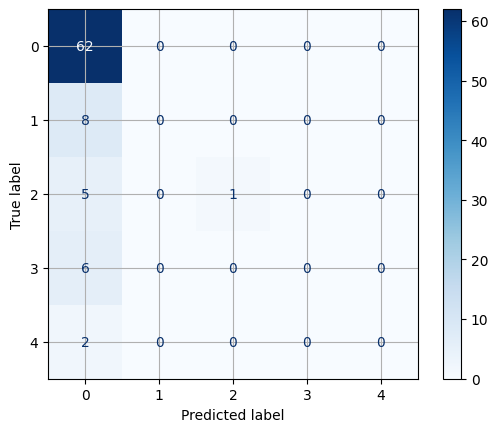

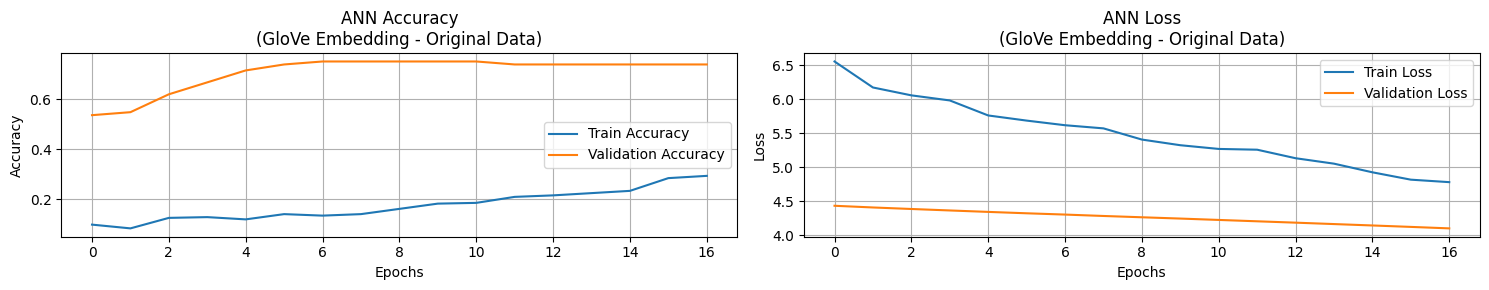

======================== 🔹 Training ANN with GloVe Embedding - Backtranslated Data 🔹 ========================
OOV words: 63/1286 (4.90%)
Shape of glove embedding matrix : (1287, 100)

🎯 Random Search Summary (Fixed Layer Architecture):
Best model -> F1 Macro: 0.2744, Acc: 0.5238, Prec: 0.2740, Rec: 0.3040, lr=0.0001, dDO=0.1, act=swish, batch=32, gamma=2.0, alpha=0.75
Best parameters: {'dense_dropout': 0.1, 'learning_rate': 0.0001, 'activation': 'swish', 'batch_size': 32, 'gamma': 2.0, 'alpha': 0.75}
Best validation accuracy: 0.5238

🔍 ANN Accuracy on Test Data: 0.5238

Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.65      0.70        62
           1       0.12      0.38      0.18         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.50      0.50      0.50         2

    accuracy                           0.52        84
   macro avg       

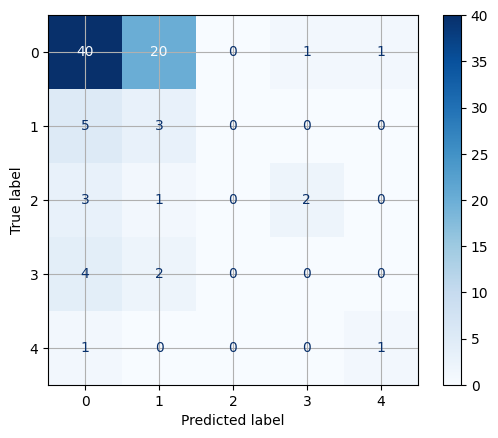

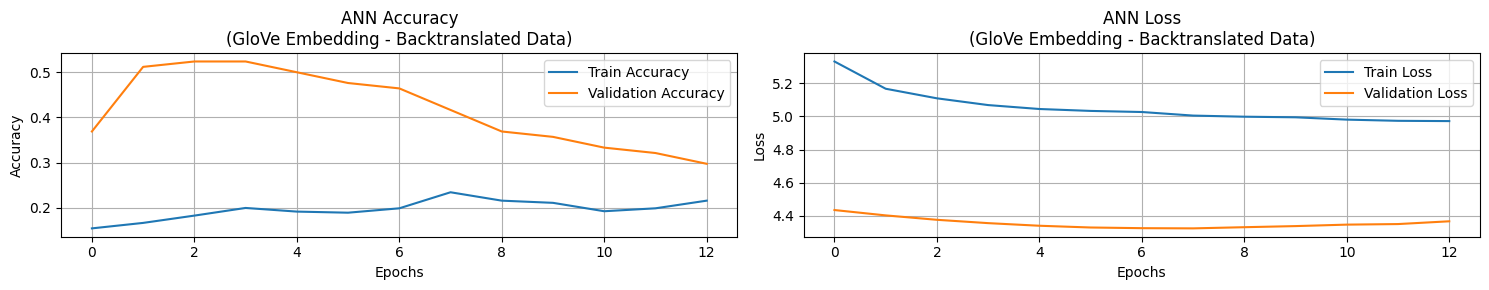

======================== 🔹 Training ANN with GloVe Embedding - NLP Augmented Data 🔹 ========================
OOV words: 63/1286 (4.90%)
Shape of glove embedding matrix : (1287, 100)

🎯 Random Search Summary (Fixed Layer Architecture):
Best model -> F1 Macro: 0.2294, Acc: 0.7500, Prec: 0.3512, Rec: 0.2333, lr=0.0001, dDO=0.1, act=swish, batch=32, gamma=2.0, alpha=0.75
Best parameters: {'dense_dropout': 0.1, 'learning_rate': 0.0001, 'activation': 'swish', 'batch_size': 32, 'gamma': 2.0, 'alpha': 0.75}
Best validation accuracy: 0.7500

🔍 ANN Accuracy on Test Data: 0.7500

Classification Report:

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        62
           1       0.00      0.00      0.00         8
           2       1.00      0.17      0.29         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.75        84
   macro avg       0

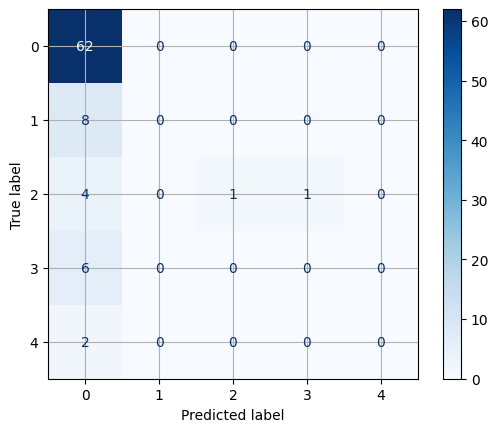

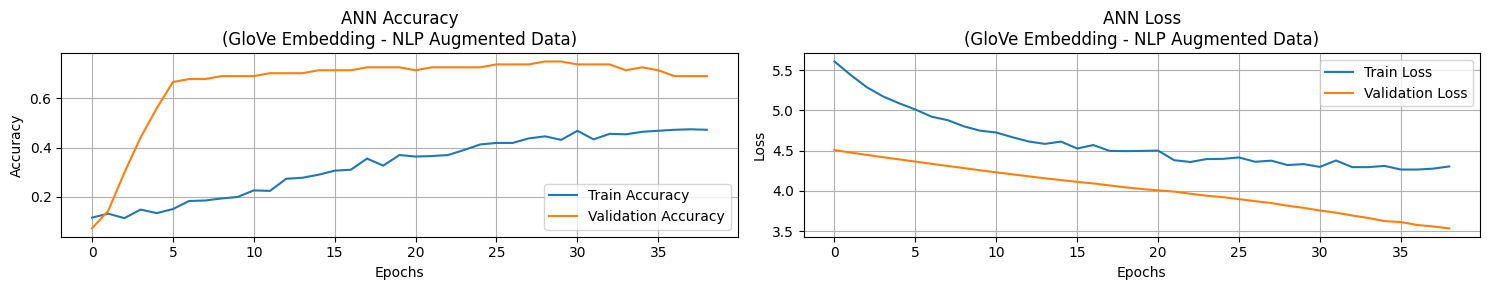

In [86]:
print("======================== 🔹 Training ANN with GloVe Embedding - Original Data 🔹 ========================")
best_model_ann_glove_original_data , best_pred_ann_glove_original_data, best_history_ann_glove_original_data, best_params_ann_glove_original_data = ann_model(X_train_tokenized, y_train, X_test_tokenized, y_test, glove_embedding_matrix(train_tokenizer), 'GloVe Embedding - Original Data')



print("======================== 🔹 Training ANN with GloVe Embedding - Backtranslated Data 🔹 ========================")
best_model_ann_glove_BT_data , best_pred_ann_glove_BT_data, best_history_ann_glove_BT_data, best_params_ann_glove_BT_data= ann_model(X_train_bt_tokenized, y_train_bt_tokenized, X_test_tokenized, y_test, glove_embedding_matrix(train_tokenizer), 'GloVe Embedding - Backtranslated Data')



print("======================== 🔹 Training ANN with GloVe Embedding - NLP Augmented Data 🔹 ========================")
best_model_ann_glove_nlp_data , best_pred_ann_glove_nlp_data, best_history_ann_glove_nlp_data, best_params_ann_glove_nlp_data=ann_model(X_train_nlp_tokenized, y_train_nlp_tokenized, X_test_tokenized, y_test, glove_embedding_matrix(train_tokenizer), 'GloVe Embedding - NLP Augmented Data')

### ANN with BERT Tokenized Data

 ======================== 🔹 Training ANN with BERT Tokenized Data - Original 🔹 ========================

🎯 Random Search Summary (Fixed Layer Architecture):
Best model -> F1 Macro: 0.3045, Acc: 0.7738, Prec: 0.4883, Rec: 0.2833, lr=0.0001, dDO=0.1, act=swish, batch=32, gamma=2.0, alpha=0.75
Best parameters: {'dense_dropout': 0.1, 'learning_rate': 0.0001, 'activation': 'swish', 'batch_size': 32, 'gamma': 2.0, 'alpha': 0.75}
Best validation accuracy: 0.7738

🔍 ANN Accuracy on Test Data: 0.7738

Classification Report:

              precision    recall  f1-score   support

           0       0.78      1.00      0.87        62
           1       0.67      0.25      0.36         8
           2       1.00      0.17      0.29         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.77        84
   macro avg       0.49      0.28      0.30        84
weighted avg       0.71      0.77      0.70 

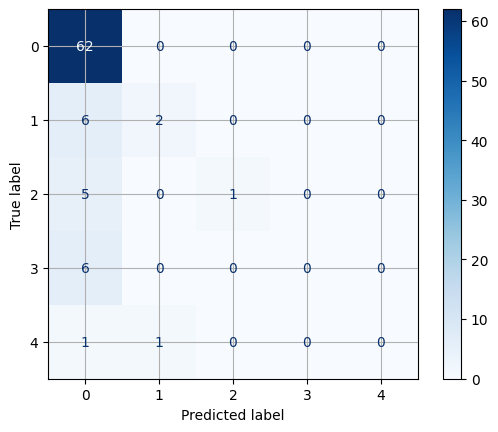

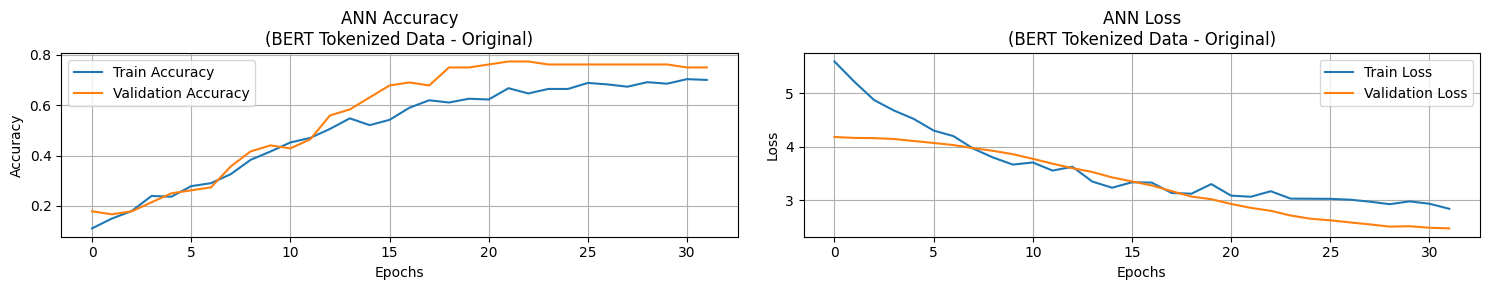

 ======================== 🔹 Training ANN with BERT Tokenized Data - Backtranslated 🔹 ========================

🎯 Random Search Summary (Fixed Layer Architecture):
Best model -> F1 Macro: 0.3152, Acc: 0.4405, Prec: 0.3044, Rec: 0.4685, lr=0.0001, dDO=0.1, act=swish, batch=32, gamma=2.0, alpha=0.75
Best parameters: {'dense_dropout': 0.1, 'learning_rate': 0.0001, 'activation': 'swish', 'batch_size': 32, 'gamma': 2.0, 'alpha': 0.75}
Best validation accuracy: 0.6905

🔍 ANN Accuracy on Test Data: 0.6905

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.94      0.83        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.69        84
   macro avg       0.15      0.19      0.17        84
weighted avg       0.55      0.69     

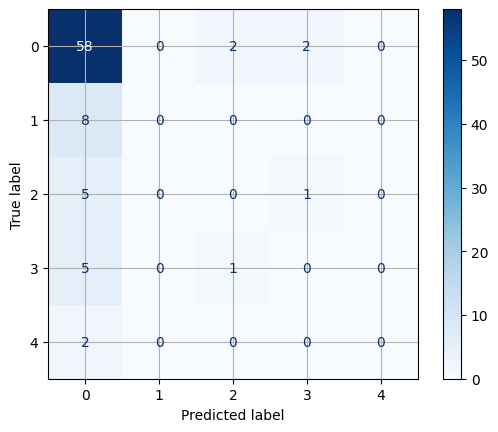

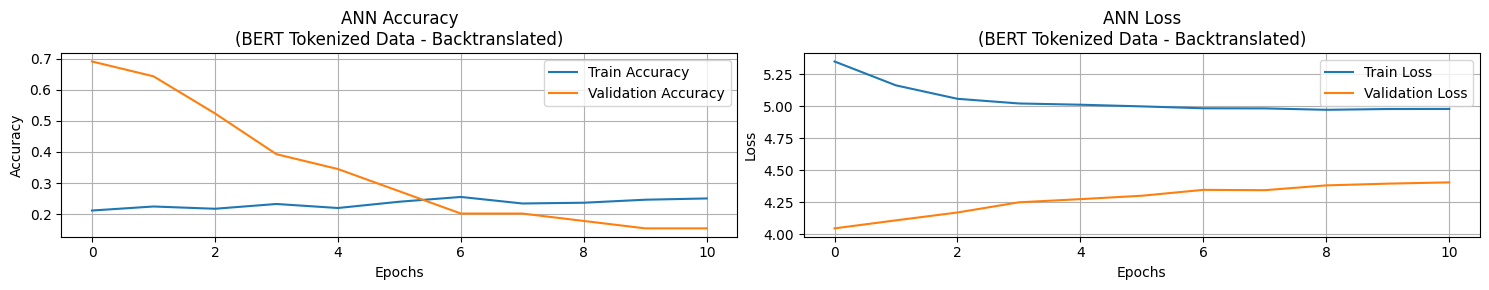

 ======================== 🔹 Training ANN with BERT Tokenized Data - NLP Augmented 🔹 ========================

🎯 Random Search Summary (Fixed Layer Architecture):
Best model -> F1 Macro: 0.2123, Acc: 0.7262, Prec: 0.2148, Rec: 0.2269, lr=0.0001, dDO=0.1, act=swish, batch=32, gamma=2.0, alpha=0.75
Best parameters: {'dense_dropout': 0.1, 'learning_rate': 0.0001, 'activation': 'swish', 'batch_size': 32, 'gamma': 2.0, 'alpha': 0.75}
Best validation accuracy: 0.7500

🔍 ANN Accuracy on Test Data: 0.7500

Classification Report:

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        62
           1       0.33      0.12      0.18         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.75        84
   macro avg       0.22      0.23      0.21        84
weighted avg       0.60      0.75      

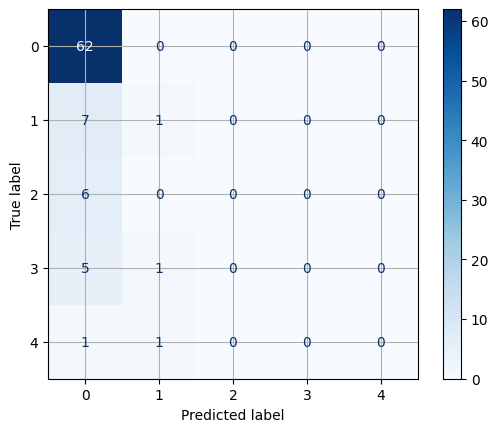

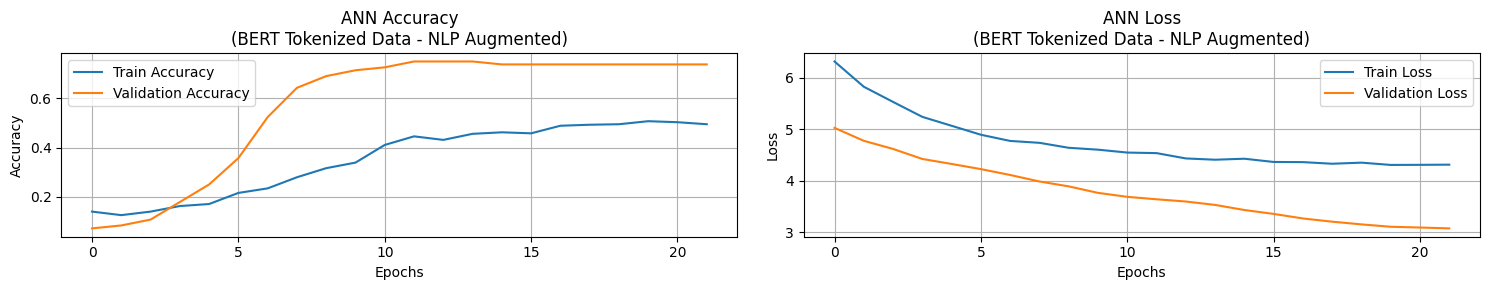

In [87]:
print(' ======================== 🔹 Training ANN with BERT Tokenized Data - Original 🔹 ========================')
best_model_ann_bert_original, best_pred_ann_bert_original, best_history_ann_bert_original, best_params_ann_bert_original = ann_model(
    X_train_bert_embedding, y_train, X_test_bert_embedding, y_test, None, 'BERT Tokenized Data - Original'
)

print(' ======================== 🔹 Training ANN with BERT Tokenized Data - Backtranslated 🔹 ========================')
best_model_ann_bert_bt, best_pred_ann_bert_bt, best_history_ann_bert_bt, best_params_ann_bert_bt = ann_model(
    X_train_bt_bert_embedding, y_train_bt_bert_embedding, X_test_bert_embedding, y_test, None, 'BERT Tokenized Data - Backtranslated'
)

print(' ======================== 🔹 Training ANN with BERT Tokenized Data - NLP Augmented 🔹 ========================')
best_model_ann_bert_nlp_aug, best_pred_ann_bert_nlp_aug, best_history_ann_bert_nlp_aug, best_params_ann_bert_nlp_aug = ann_model(
    X_train_nlp_bert_embedding, y_train_nlp_bert_embedding, X_test_bert_embedding, y_test, None, 'BERT Tokenized Data - NLP Augmented'
)


### Performance evaluation & Conclusion (ANN)

In [88]:
result_df_final[-6:]

Classifier  Train Accuracy  \
0        ANN with GloVe Embedding - Original Data        0.730539   
1  ANN with GloVe Embedding - Backtranslated Data        0.126613   
2   ANN with GloVe Embedding - NLP Augmented Data        0.466119   
3         ANN with BERT Tokenized Data - Original        0.739521   
4   ANN with BERT Tokenized Data - Backtranslated        0.242742   
5    ANN with BERT Tokenized Data - NLP Augmented        0.509240   

   Test Accuracy  Train F1 Score(avg)  Test F1 Score(avg)  \
0       0.750000             0.646910            0.651607   
1       0.523810             0.122897            0.542169   
2       0.750000             0.326085            0.655990   
3       0.773810             0.629868            0.699574   
4       0.690476             0.149064            0.611565   
5       0.750000             0.362239            0.657343   

   Train F1 Score(macro)  Test F1 Score(macro)  Train Recall  Test Recall  \
0               0.232316              0.228177      0.730539     0.750000   
1               0.122862              0.274425      0.126613     0.523810   
2               0.132519              0.229365      0.466119     0.750000   
3               0.170345              0.304518      0.739521     0.773810   
4               0.149130              0.165714      0.242742     0.690476   
5               0.159603              0.209790      0.509240     0.750000   

   Train Precision (avg)  Test Precision (avg) Test Time cv score  
0               0.607719              0.622777         -        -  
1               0.128619              0.579947         -        -  
2               0.254816              0.629501         -        -  
3               0.548534              0.706944         -        -  
4               0.141820              0.548840         -        -  
5               0.331455              0.596708         -        -

## **Recurrent Neural Network (RNN)**

In [4]:
def bi_rnn_model(X_train, y_train, X_test, y_test, embedding_matrix=None, embedding_name=None, run_index=None, n_iter=20):
    import tensorflow as tf
    import tensorflow_addons as tfa
    import random, os, json
    import numpy as np
    from sklearn.utils.class_weight import compute_class_weight
    from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Input, Dense, Dropout, SimpleRNN, BatchNormalization, Embedding, SpatialDropout1D
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    from tensorflow.keras.initializers import get as get_initializer

    y_train = y_train.to_numpy() if hasattr(y_train, 'to_numpy') else y_train
    y_test = y_test.to_numpy() if hasattr(y_test, 'to_numpy') else y_test
    num_classes = len(np.unique(y_train))
    best_val_accuracy = 0
    best_model = None
    best_y_pred = None
    best_history = None
    best_params = None
    search_results = []
    param_dist = {
        'dense_dropout': [0.2, 0.3, 0.1],
        'learning_rate': [0.001, 0.0005,0.003],
        'activation': ['relu', 'tanh', 'swish'],
        'initializer': ['orthogonal', 'glorot_uniform', 'he_normal']
    }

    COMBO_LOG_PATH = "tried_combinations_fixed_rnn.json"
    if os.path.exists(COMBO_LOG_PATH):
        with open(COMBO_LOG_PATH, "r") as f:
            tried_combinations = json.load(f)
    else:
        tried_combinations = []

    best_val_accuracy = 0
    best_model = None
    best_y_pred = None
    best_history = None
    best_params = None

    for _ in range(n_iter):
        attempts = 0
        while attempts < 1000:
            params = {k: random.choice(v) for k, v in param_dist.items()}
            combo_key = json.dumps(params, sort_keys=True)
            if combo_key not in tried_combinations:
                tried_combinations.append(combo_key)
                break
            attempts += 1
        else:
            print("⚠️ Too many duplicate attempts. Stopping.")
            break

        model = Sequential()

        # Handle embedding (2D input)
        if embedding_matrix is not None:
            model.add(Input(shape=(X_train.shape[1],)))
            model.add(Embedding(
                input_dim=embedding_matrix.shape[0],
                output_dim=embedding_matrix.shape[1],
                weights=[embedding_matrix],
                input_length=X_train.shape[1],
                trainable=True
            ))
            model.add(SpatialDropout1D(0.2))
        else:
            # Convert 2D input to 3D (reshape)
            if len(X_train.shape) == 2:
                features = X_train.shape[1]
                for t in [7, 5, 2, 1]:
                    if features % t == 0:
                        time_steps = t
                        break
                feature_per_step = features // time_steps
                X_train = X_train.reshape((X_train.shape[0], time_steps, feature_per_step))
                X_test = X_test.reshape((X_test.shape[0], time_steps, feature_per_step))

            model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
            model.add(SpatialDropout1D(0.2))

        model.add(SimpleRNN(64, return_sequences=True, kernel_initializer=get_initializer(params['initializer'])))
        model.add(BatchNormalization())
        model.add(SimpleRNN(32, kernel_initializer=get_initializer(params['initializer'])))
        model.add(Dense(32, activation=params['activation'], kernel_initializer=get_initializer(params['initializer'])))
        model.add(Dropout(params['dense_dropout']))
        model.add(Dense(num_classes, activation='softmax'))

        loss = sparse_categorical_focal_loss(gamma=1., alpha=0.5)
        optimizer = tf.keras.optimizers.Adam(learning_rate=params['learning_rate'])

        model.compile(
            optimizer=optimizer,
            loss=loss,
            metrics=[
                tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy'),
                tfa.metrics.HammingLoss(mode='multiclass', name='hamming_loss')
            ]
        )

        class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
        class_weight_dict = dict(zip(np.unique(y_train), class_weights))

        callbacks = [
            EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
        ]

        history = model.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            epochs=15,
            batch_size=32,
            class_weight=class_weight_dict,
            callbacks=callbacks,
            verbose=0
        )

       # Get validation accuracy and other metrics
        val_accuracy = max(history.history['val_accuracy'])
        y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
        f1 = f1_score(y_test, y_pred, average='macro')
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
        rec = recall_score(y_test, y_pred, average='macro', zero_division=0)

        # Store results
        search_results.append((f1, acc, prec, rec, params['learning_rate'], params['dense_dropout'],
                       params['activation']))


        # Update best model if current is better
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_model = model
            best_y_pred = y_pred
            best_history = history
            best_params = params

    # Print random search summary
    if run_index is None:
        print("\n🎯 Random Search Summary:")
        best_result = sorted(search_results, key=lambda x: x[0], reverse=True)[0]
        best_result = sorted(search_results, key=lambda x: x[0], reverse=True)[0]
        print(f"Best model -> F1 Macro: {best_result[0]:.4f}, Acc: {best_result[1]:.4f}, "
        f"Prec: {best_result[2]:.4f}, Rec: {best_result[3]:.4f}, "
        f"lr={best_result[4]}, dDO={best_result[5]}, act={best_result[6]}")

        print(f"Best parameters: {best_params}")
        print(f"Best validation accuracy: {best_val_accuracy:.4f}")

        # Try performance check if function is defined
        try:
            y_pred_train = np.argmax(best_model.predict(X_train, verbose=0), axis=1)
            NN_performance_check(best_model, y_train, y_pred_train, y_test, best_y_pred,
                                 best_history, model_name='RNN', embedding_name=embedding_type)
        except NameError:
            print("NN_performance_check not defined. Skipping performance check.")

    # Plotting results across iterations
    f1_macros = [result[0] for result in search_results]
    accuracies = [result[1] for result in search_results]
    precisions = [result[2] for result in search_results]
    recalls = [result[3] for result in search_results]

    plt.figure(figsize=(16, 8))
    plt.subplot(2, 2, 1)
    plt.plot(range(1, n_iter+1), f1_macros, marker='o', label='F1 Macro')
    plt.title('Macro F1 over Iterations')
    plt.xlabel('Iteration #')
    plt.ylabel('F1 Macro')
    plt.grid(True)

    plt.subplot(2, 2, 2)
    plt.plot(range(1, n_iter+1), accuracies, marker='o', label='Accuracy')
    plt.title('Accuracy over Iterations')
    plt.xlabel('Iteration #')
    plt.ylabel('Accuracy')
    plt.grid(True)

    plt.subplot(2, 2, 3)
    plt.plot(range(1, n_iter+1), precisions, marker='o', label='Precision', color='orange')
    plt.title('Precision over Iterations')
    plt.xlabel('Iteration #')
    plt.ylabel('Precision')
    plt.grid(True)

    plt.subplot(2, 2, 4)
    plt.plot(range(1, n_iter+1), recalls, marker='o', label='Recall', color='green')
    plt.title('Recall over Iterations')
    plt.xlabel('Iteration #')
    plt.ylabel('Recall')
    plt.grid(True)

    plt.tight_layout()
    plt.savefig('random_search_metrics.png')
    plt.show()

    return best_model, best_y_pred, best_history, best_params


### RNN with GloVe Embedding

 ======================== 🔹 Training RNN with GloVe Embedding - Original Data 🔹 ========================
OOV words: 63/1286 (4.90%)
Shape of glove embedding matrix : (1287, 100)



🎯 Random Search Summary:
Best model -> F1 Macro: 0.2325, Acc: 0.2619, Prec: 0.3035, Rec: 0.4559, lr=0.0005, dDO=0.1, act=relu
Best parameters: {'dense_dropout': 0.2, 'learning_rate': 0.001, 'activation': 'tanh', 'initializer': 'he_normal'}
Best validation accuracy: 0.7381
NN_performance_check not defined. Skipping performance check.


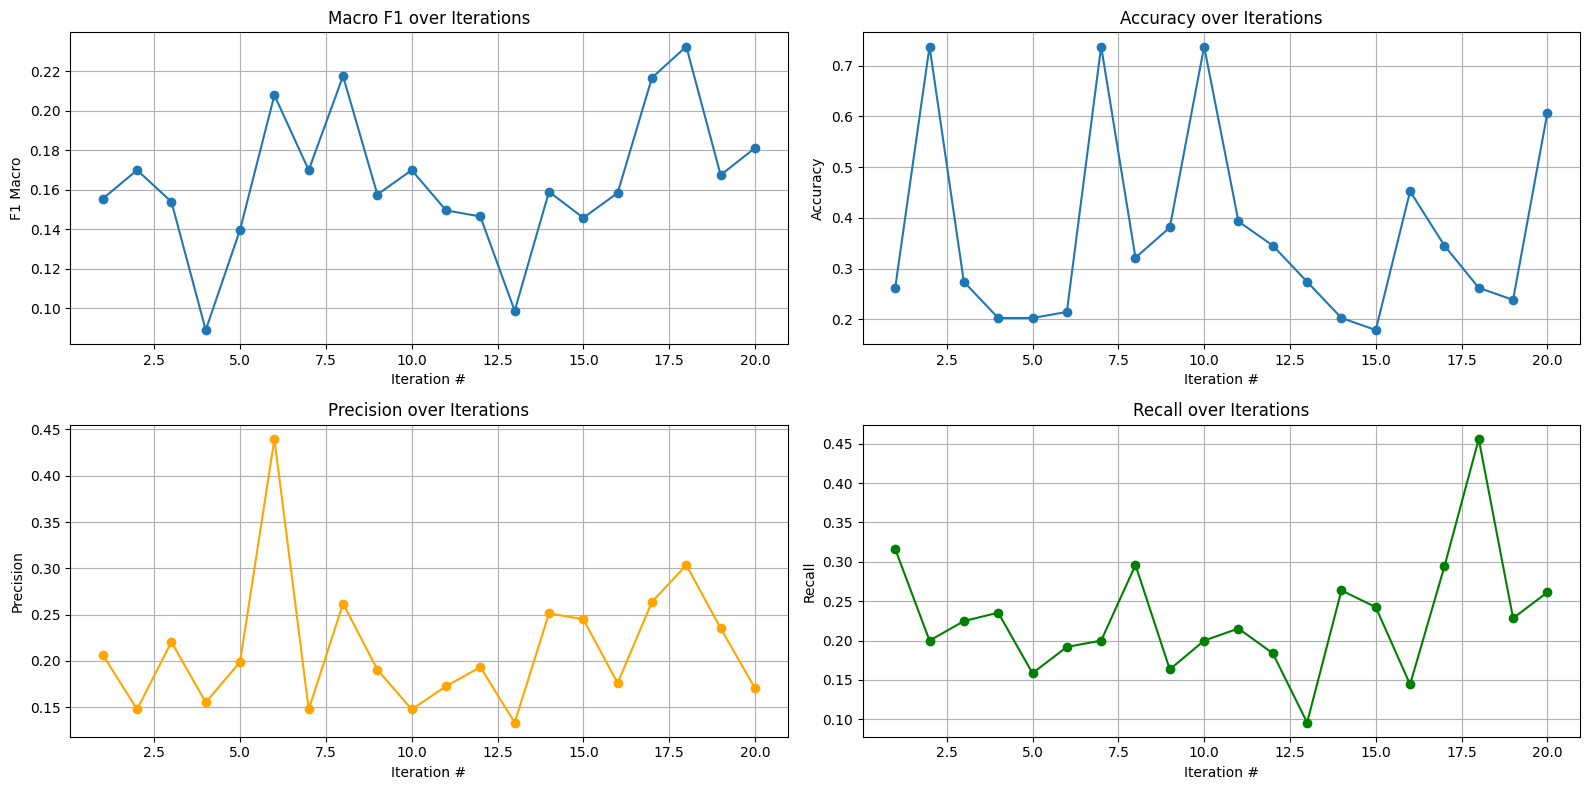

 ======================== 🔹 Training RNN with GloVe Embedding - Backtranslated Data 🔹 ========================
OOV words: 63/1286 (4.90%)
Shape of glove embedding matrix : (1287, 100)

🎯 Random Search Summary:
Best model -> F1 Macro: 0.3049, Acc: 0.7381, Prec: 0.4179, Rec: 0.2820, lr=0.0005, dDO=0.2, act=relu
Best parameters: {'dense_dropout': 0.3, 'learning_rate': 0.001, 'activation': 'swish', 'initializer': 'orthogonal'}
Best validation accuracy: 0.7381
NN_performance_check not defined. Skipping performance check.


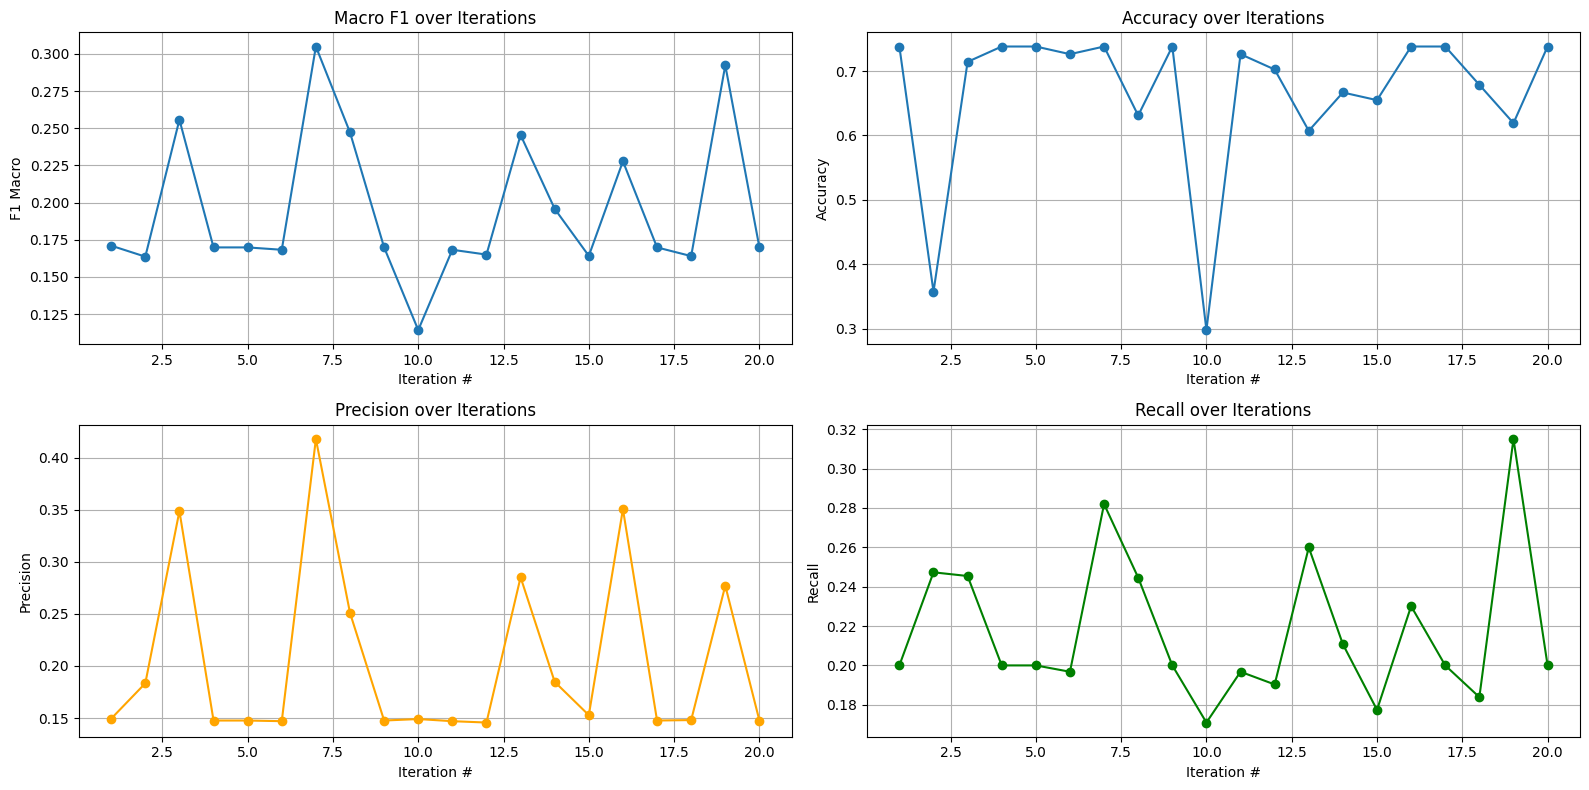

 ======================== 🔹 Training RNN with GloVe Embedding - NLP Augmented Data 🔹 ========================
OOV words: 63/1286 (4.90%)
Shape of glove embedding matrix : (1287, 100)

🎯 Random Search Summary:
Best model -> F1 Macro: 0.2434, Acc: 0.7500, Prec: 0.2840, Rec: 0.2468, lr=0.001, dDO=0.2, act=tanh
Best parameters: {'dense_dropout': 0.2, 'learning_rate': 0.001, 'activation': 'tanh', 'initializer': 'he_normal'}
Best validation accuracy: 0.7500
NN_performance_check not defined. Skipping performance check.


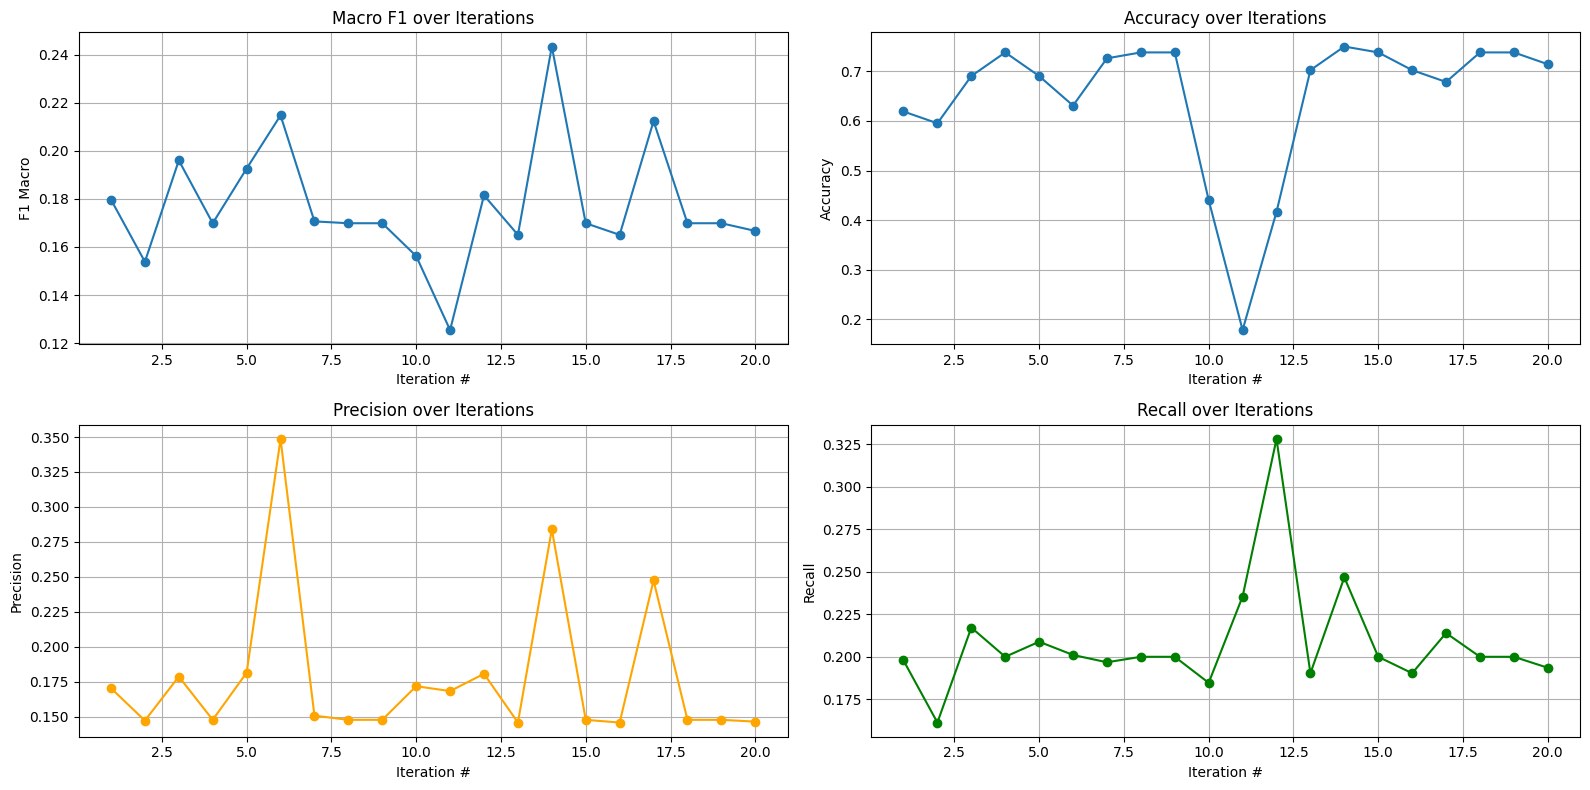

In [89]:
print(' ======================== 🔹 Training RNN with GloVe Embedding - Original Data 🔹 ========================')
best_model_rnn_glove_original, best_pred_rnn_glove_original, best_history_rnn_glove_original, best_params_rnn_glove_original = bi_rnn_model(
    X_train_tokenized, y_train, X_test_tokenized, y_test,
    glove_embedding_matrix(train_tokenizer),
    'GloVe Embedding - Original Data'
)

print(' ======================== 🔹 Training RNN with GloVe Embedding - Backtranslated Data 🔹 ========================')
best_model_rnn_glove_bt, best_pred_rnn_glove_bt, best_history_rnn_glove_bt, best_params_rnn_glove_bt = bi_rnn_model(
    X_train_bt_tokenized, y_train_bt_tokenized, X_test_tokenized, y_test,
    glove_embedding_matrix(train_tokenizer),
    'GloVe Embedding - Backtranslated Data'
)

print(' ======================== 🔹 Training RNN with GloVe Embedding - NLP Augmented Data 🔹 ========================')
best_model_rnn_glove_nlp, best_pred_rnn_glove_nlp, best_history_rnn_glove_nlp, best_params_rnn_glove_nlp = bi_rnn_model(
    X_train_nlp_tokenized, y_train_nlp_tokenized, X_test_tokenized, y_test,
    glove_embedding_matrix(train_tokenizer),
    'GloVe Embedding - NLP Augmented Data'
)


### RNN with BERT Tokenized Data

 ======================== 🔹 Training RNN with BERT Tokenized Data - Original 🔹 ========================

🎯 Random Search Summary:
Best model -> F1 Macro: 0.3043, Acc: 0.7143, Prec: 0.3222, Rec: 0.2973, lr=0.001, dDO=0.3, act=relu
Best parameters: {'dense_dropout': 0.2, 'learning_rate': 0.003, 'activation': 'tanh', 'initializer': 'glorot_uniform'}
Best validation accuracy: 0.7262
NN_performance_check not defined. Skipping performance check.


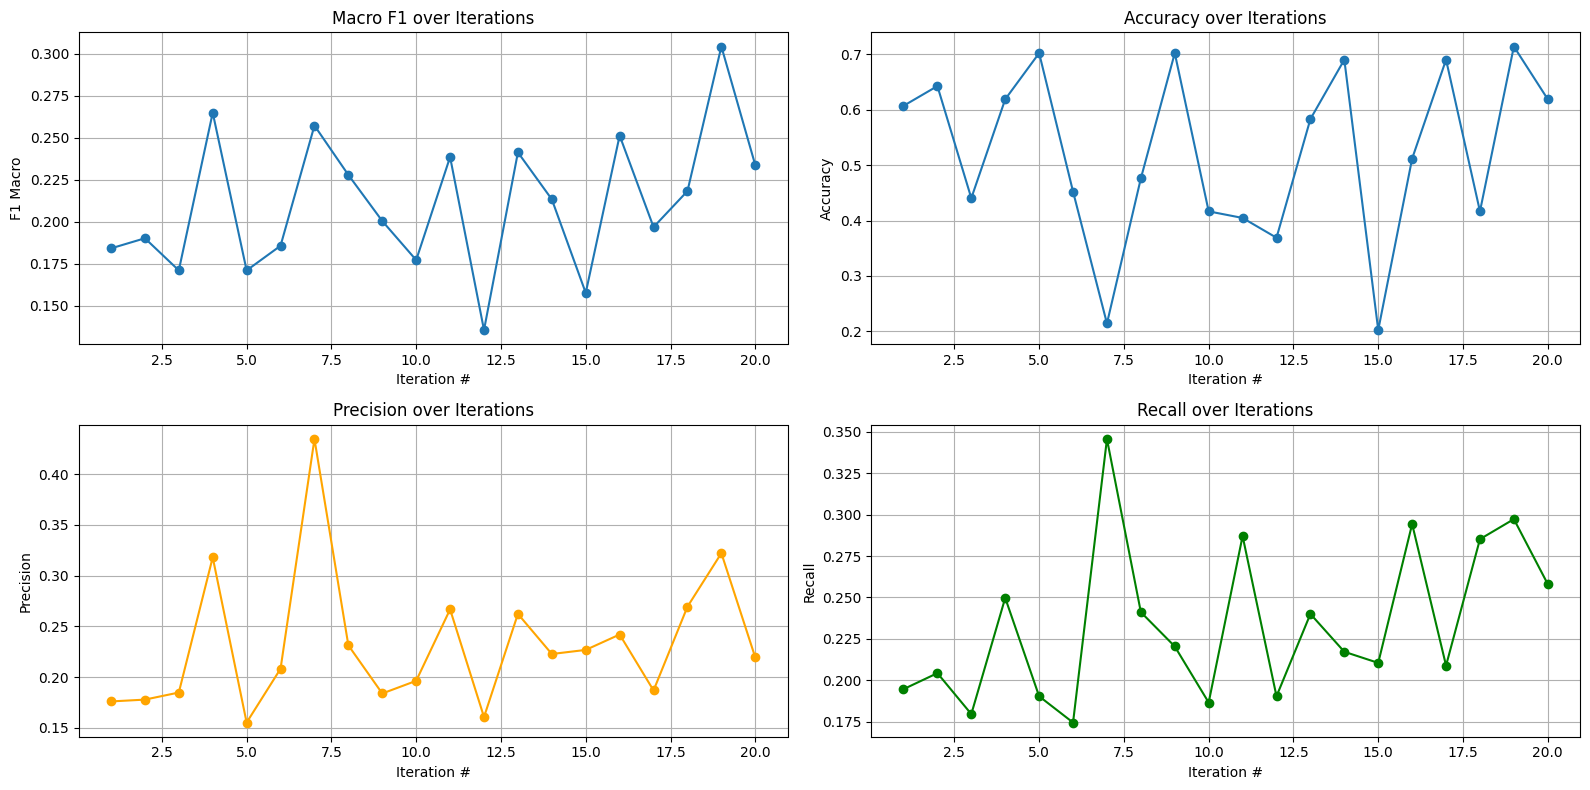

 ======================== 🔹 Training RNN with BERT Tokenized Data - Backtranslated 🔹 ========================

🎯 Random Search Summary:
Best model -> F1 Macro: 0.2282, Acc: 0.7500, Prec: 0.3494, Rec: 0.2333, lr=0.003, dDO=0.3, act=tanh
Best parameters: {'dense_dropout': 0.3, 'learning_rate': 0.003, 'activation': 'tanh', 'initializer': 'glorot_uniform'}
Best validation accuracy: 0.7500
NN_performance_check not defined. Skipping performance check.


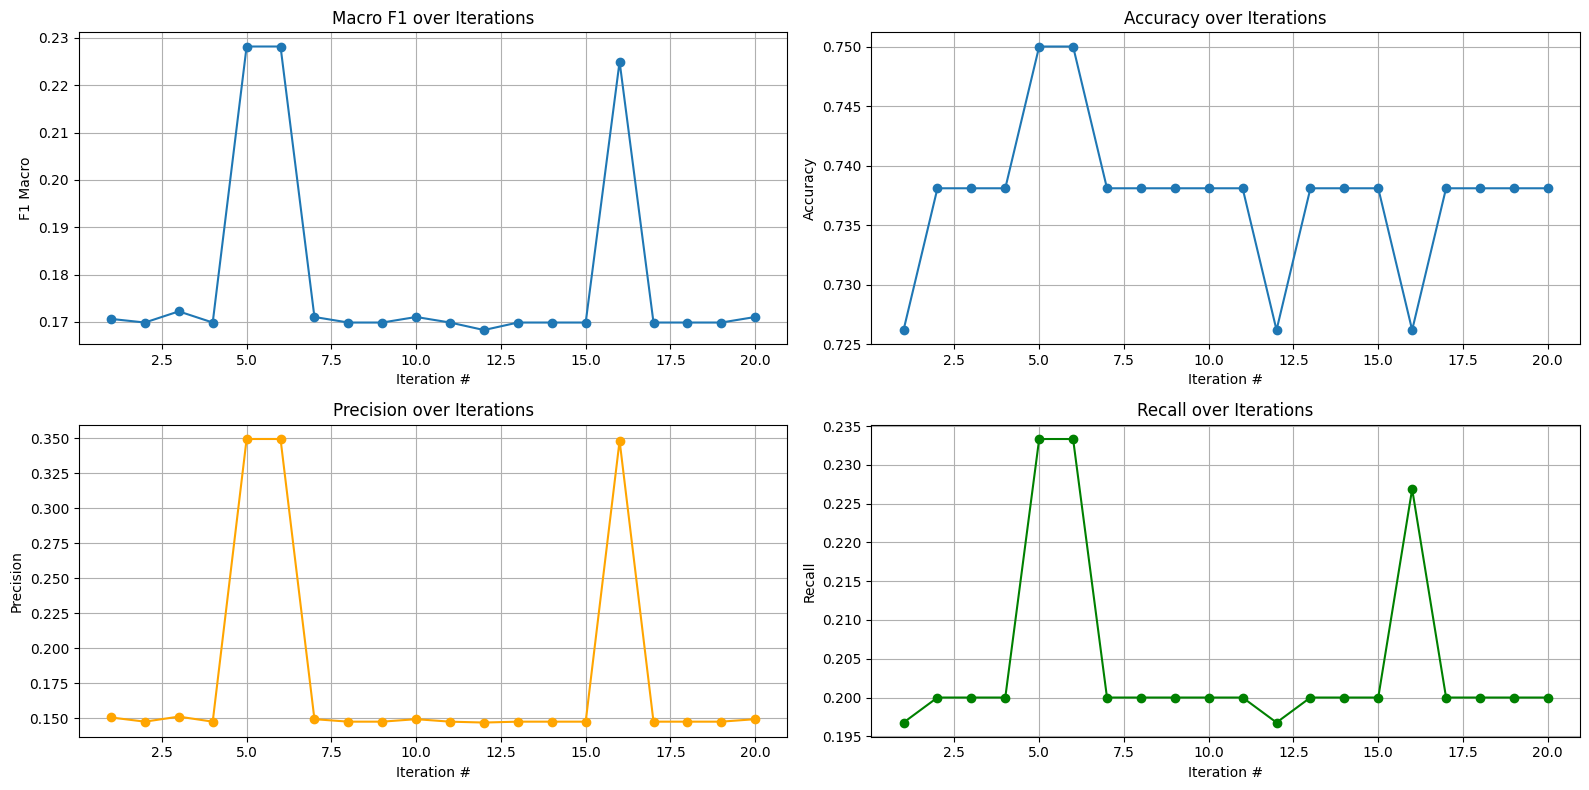

 ======================== 🔹 Training RNN with BERT Tokenized Data - NLP Augmented 🔹 ========================

🎯 Random Search Summary:
Best model -> F1 Macro: 0.2949, Acc: 0.6905, Prec: 0.4750, Rec: 0.2691, lr=0.0005, dDO=0.2, act=tanh
Best parameters: {'dense_dropout': 0.1, 'learning_rate': 0.001, 'activation': 'tanh', 'initializer': 'he_normal'}
Best validation accuracy: 0.7619
NN_performance_check not defined. Skipping performance check.


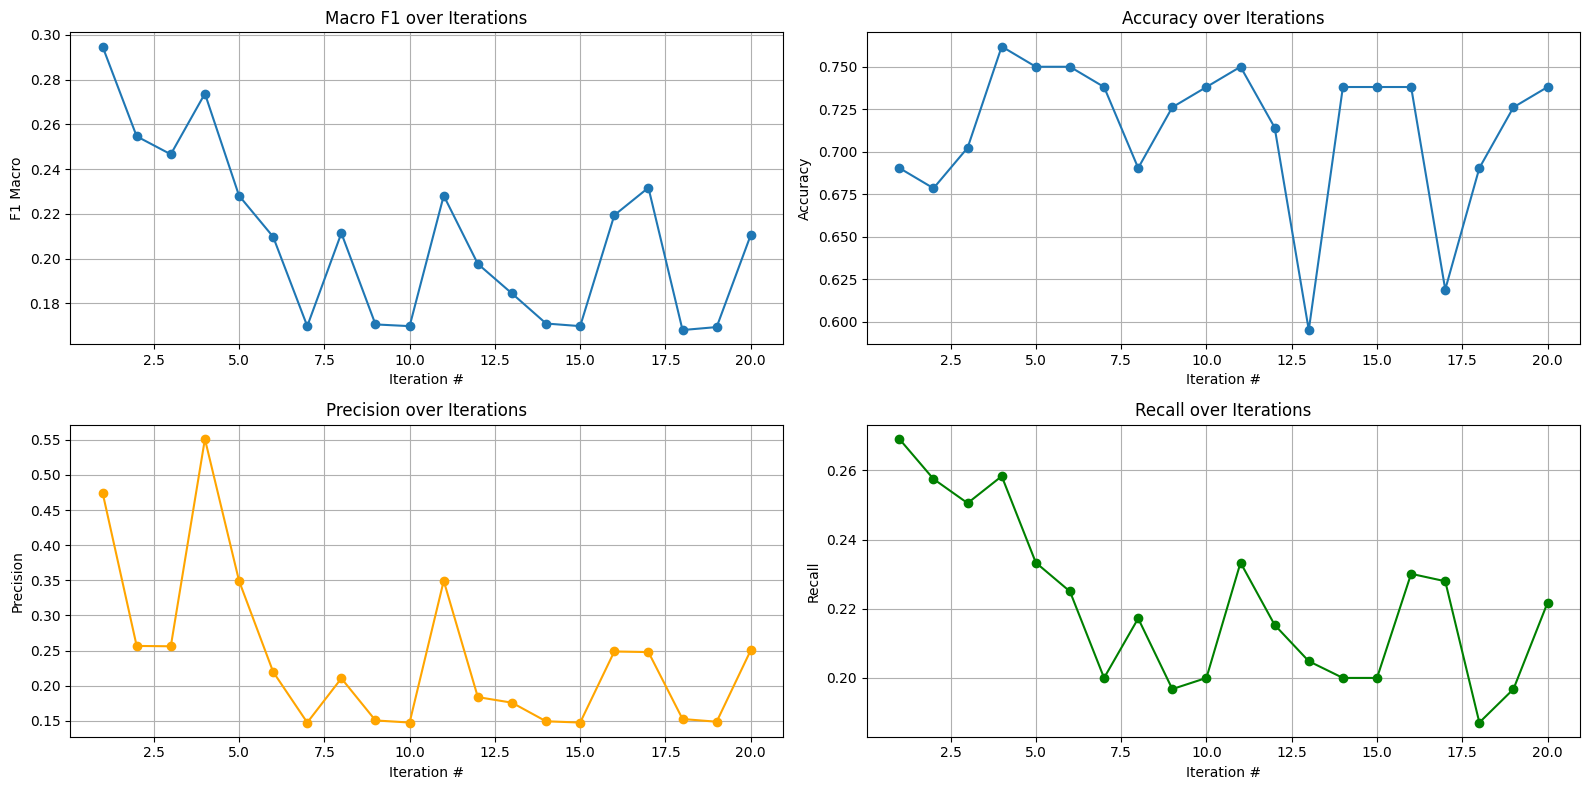

In [90]:
print(' ======================== 🔹 Training RNN with BERT Tokenized Data - Original 🔹 ========================')
best_model_rnn_bert_original, best_pred_rnn_bert_original, best_history_rnn_bert_original, best_params_rnn_bert_original = bi_rnn_model(
    X_train_bert_hstate, y_train, X_test_bert_hstate, y_test, None, 'BERT Tokenized Data - Original'
)

print(' ======================== 🔹 Training RNN with BERT Tokenized Data - Backtranslated 🔹 ========================')
best_model_rnn_bert_bt, best_pred_rnn_bert_bt, best_history_rnn_bert_bt, best_params_rnn_bert_bt = bi_rnn_model(
    X_train_bt_bert_hstate, y_train_bt_bert_hstate, X_test_bert_hstate, y_test, None, 'BERT Tokenized Data - Backtranslated'
)

print(' ======================== 🔹 Training RNN with BERT Tokenized Data - NLP Augmented 🔹 ========================')
best_model_rnn_bert_nlp, best_pred_rnn_bert_nlp, best_history_rnn_bert_nlp, best_params_rnn_bert_nlp = bi_rnn_model(
    X_train_nlp_bert_hstate, y_train_nlp_bert_hstate, X_test_bert_hstate, y_test, None, 'BERT Tokenized Data - NLP Augmented'
)


### Performance evaluation & Conclusion (RNN)

In [91]:
 result_df_final

Classifier  Train Accuracy  \
0        ANN with GloVe Embedding - Original Data        0.730539   
1  ANN with GloVe Embedding - Backtranslated Data        0.126613   
2   ANN with GloVe Embedding - NLP Augmented Data        0.466119   
3         ANN with BERT Tokenized Data - Original        0.739521   
4   ANN with BERT Tokenized Data - Backtranslated        0.242742   
5    ANN with BERT Tokenized Data - NLP Augmented        0.509240   

   Test Accuracy  Train F1 Score(avg)  Test F1 Score(avg)  \
0       0.750000             0.646910            0.651607   
1       0.523810             0.122897            0.542169   
2       0.750000             0.326085            0.655990   
3       0.773810             0.629868            0.699574   
4       0.690476             0.149064            0.611565   
5       0.750000             0.362239            0.657343   

   Train F1 Score(macro)  Test F1 Score(macro)  Train Recall  Test Recall  \
0               0.232316              0.228177      0.730539     0.750000   
1               0.122862              0.274425      0.126613     0.523810   
2               0.132519              0.229365      0.466119     0.750000   
3               0.170345              0.304518      0.739521     0.773810   
4               0.149130              0.165714      0.242742     0.690476   
5               0.159603              0.209790      0.509240     0.750000   

   Train Precision (avg)  Test Precision (avg) Test Time cv score  
0               0.607719              0.622777         -        -  
1               0.128619              0.579947         -        -  
2               0.254816              0.629501         -        -  
3               0.548534              0.706944         -        -  
4               0.141820              0.548840         -        -  
5               0.331455              0.596708         -        -

## **Long Short Term Memory (LSTM)**

In [92]:
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import ParameterSampler
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, Bidirectional, LSTM, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


def bi_lstm_model(X_train, y_train, X_test, y_test, embedding_matrix=None, embedding_type='glove', run_index=None, n_iter=20):
    y_train = y_train.to_numpy() if hasattr(y_train, 'to_numpy') else y_train
    y_test = y_test.to_numpy() if hasattr(y_test, 'to_numpy') else y_test

    num_classes = len(np.unique(y_train))

    # Define parameter grid
    param_grid = {

        'dense_dropout': [0.2, 0.3, 0.4,0.1],
        'learning_rate': [0.0001, 0.0005, 0.001],
        'activation': ['swish', 'relu','tanh'],
        'batch_size': [32, 64]
    }

    # Sample random parameter combinations
    sampled_params = list(ParameterSampler(param_grid, n_iter=n_iter, random_state=42))

    best_val_accuracy = 0
    best_model = None
    best_y_pred = None
    best_history = None
    best_params = None

    for params in sampled_params:
        # Build model
        if embedding_matrix is not None:
            input_layer = Input(shape=(X_train.shape[1],))
            x = Embedding(
                input_dim=embedding_matrix.shape[0],
                output_dim=embedding_matrix.shape[1],
                weights=[embedding_matrix],
                input_length=X_train.shape[1],
                trainable=True)(input_layer)
            x = tf.keras.layers.SpatialDropout1D(0.1)(x)
        else:
            input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
            x = input_layer

        x = Bidirectional(LSTM(64, return_sequences=True))(x)
        x = Dense(32, activation=params['activation'])(x)
        x = BatchNormalization()(x)
        x = Bidirectional(LSTM(16, return_sequences=False))(x)
        x = Dropout(params['dense_dropout'])(x)

        output_layer = Dense(num_classes, activation='softmax')(x)
        model = Model(inputs=input_layer, outputs=output_layer)

        # Compile model
        loss = tf.keras.losses.SparseCategoricalCrossentropy()
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=params['learning_rate'], weight_decay=0.01)
        model.compile(
            optimizer=optimizer,
            loss=loss,
            metrics=[
                tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy'),
                tfa.metrics.HammingLoss(mode='multiclass', name='hamming_loss')
            ]
        )

        # Compute class weights
        class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
        class_weight_dict = dict(zip(np.unique(y_train), class_weights))

        # Callbacks
        callbacks = [
            EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
        ]

        # Training
        history = model.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            epochs=15,
            batch_size=35,
            class_weight=class_weight_dict,
            callbacks=callbacks,
            verbose=0
        )

        val_accuracy = max(history.history['val_accuracy'])

        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_model = model
            best_y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
            best_history = history
            best_params = params

    # Show performance for best model if not in batch run
    if run_index is None:
        print(f"\n🔹 Best Parameters Found: {best_params}")
        print(f"🔹 Best Validation Accuracy: {best_val_accuracy:.4f}")
        try:
            y_pred_train = np.argmax(best_model.predict(X_train, verbose=0), axis=1)
            NN_performance_check(
                best_model, y_train, y_pred_train,
                y_test, best_y_pred,
                best_history,
                model_name='Bi-LSTM',
                embedding_name=embedding_type
            )
        except NameError:
            print("⚠️ NN_performance_check not defined. Skipping performance metrics.")

    return best_model, best_y_pred, best_history, best_params


### BiLSTM with GloVe Embedding

OOV words: 63/1286 (4.90%)
Shape of glove embedding matrix : (1287, 100)
 ======================== 🔹 Training BiLSTM with GloVe Embedding - Original Data 🔹 ========================

🔹 Best Parameters Found: {'learning_rate': 0.001, 'dense_dropout': 0.1, 'batch_size': 64, 'activation': 'relu'}
🔹 Best Validation Accuracy: 0.6548

🔍 Bi-LSTM Accuracy on Test Data: 0.4167

Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.53      0.62        62
           1       0.03      0.12      0.05         8
           2       0.25      0.17      0.20         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.42        84
   macro avg       0.20      0.16      0.17        84
weighted avg       0.56      0.42      0.47        84

Accuracy : 0.4166666666666667
Precision (macro) : 0.20311827956989248
Precision (avg): 0.5621991807475678
Recall : 0

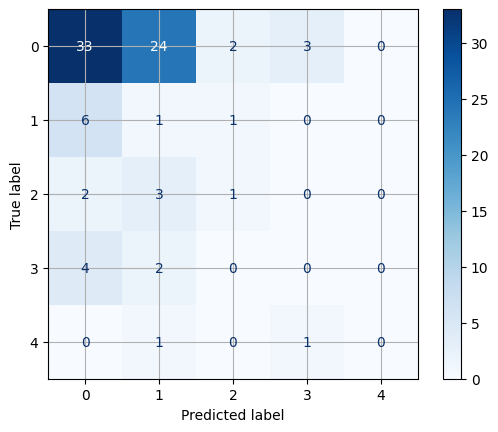

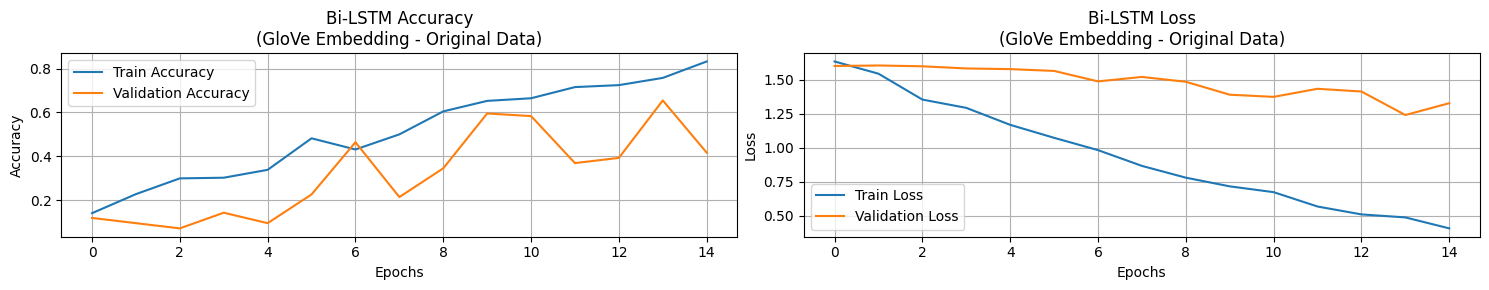

 ======================== 🔹 Training BiLSTM with GloVe Embedding - Backtranslated Data 🔹 ========================

🔹 Best Parameters Found: {'learning_rate': 0.001, 'dense_dropout': 0.2, 'batch_size': 64, 'activation': 'tanh'}
🔹 Best Validation Accuracy: 0.7381

🔍 Bi-LSTM Accuracy on Test Data: 0.7381

Classification Report:

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84

Accuracy : 0.7380952380952381
Precision (macro) : 0.14761904761904762
Precision (avg): 0.5447845804988662
Recall : 0.7380952380952381
F1-Score : 0.6268754076973254


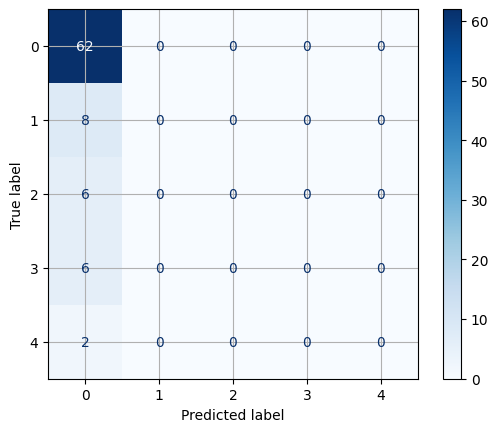

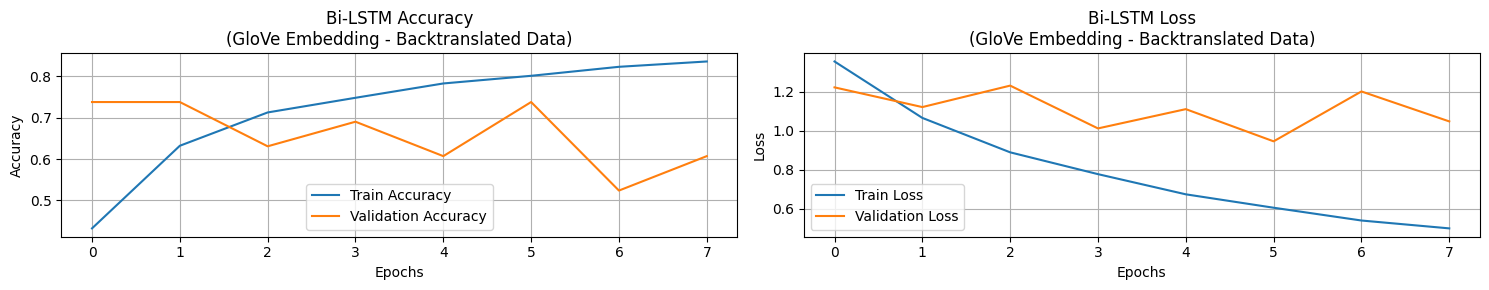

 ======================== 🔹 Training BiLSTM with GloVe Embedding - NLP Augmented Data 🔹 ========================

🔹 Best Parameters Found: {'learning_rate': 0.001, 'dense_dropout': 0.2, 'batch_size': 64, 'activation': 'tanh'}
🔹 Best Validation Accuracy: 0.7500

🔍 Bi-LSTM Accuracy on Test Data: 0.7500

Classification Report:

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        62
           1       0.00      0.00      0.00         8
           2       1.00      0.17      0.29         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.75        84
   macro avg       0.35      0.23      0.23        84
weighted avg       0.63      0.75      0.66        84

Accuracy : 0.75
Precision (macro) : 0.35121951219512193
Precision (avg): 0.6295005807200929
Recall : 0.75
F1-Score : 0.6559901738473167


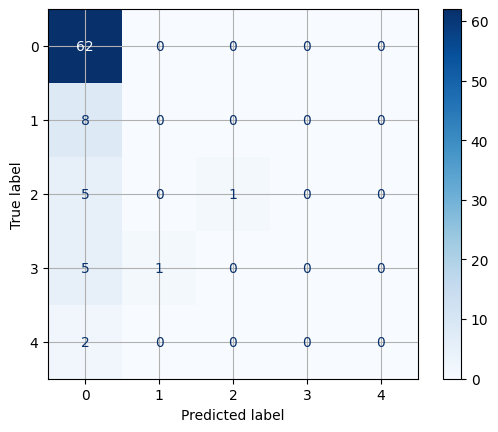

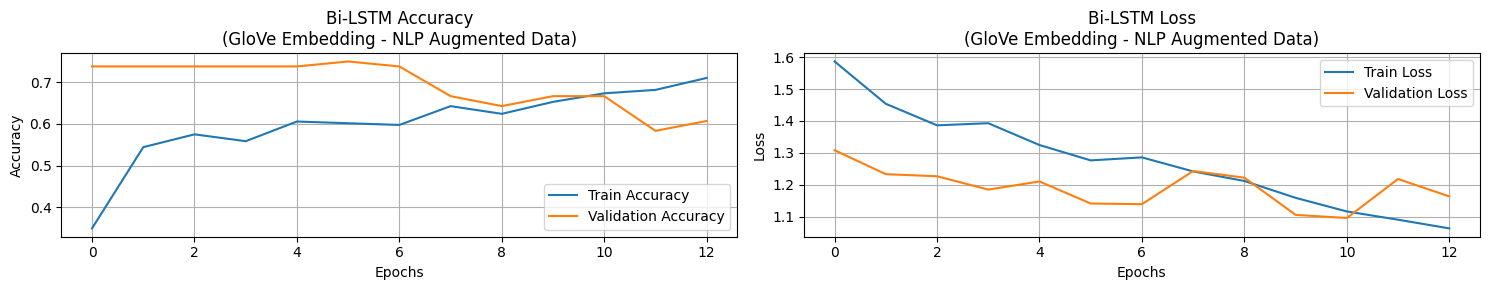

In [93]:
# Cache the embedding matrix to avoid repeated computation
glove_matrix = glove_embedding_matrix(train_tokenizer)

print(' ======================== 🔹 Training BiLSTM with GloVe Embedding - Original Data 🔹 ========================')
best_model_bilstm_glove_original, best_pred_bilstm_glove_original, best_history_bilstm_glove_original, best_params_bilstm_glove_original = bi_lstm_model(
    X_train_tokenized, y_train, X_test_tokenized, y_test,
    glove_matrix, 'GloVe Embedding - Original Data'
)

print(' ======================== 🔹 Training BiLSTM with GloVe Embedding - Backtranslated Data 🔹 ========================')
best_model_bilstm_glove_bt, best_pred_bilstm_glove_bt, best_history_bilstm_glove_bt, best_params_bilstm_glove_bt = bi_lstm_model(
    X_train_bt_tokenized, y_train_bt_tokenized, X_test_tokenized, y_test,
    glove_matrix, 'GloVe Embedding - Backtranslated Data'
)

print(' ======================== 🔹 Training BiLSTM with GloVe Embedding - NLP Augmented Data 🔹 ========================')
best_model_bilstm_glove_nlp, best_pred_bilstm_glove_nlp, best_history_bilstm_glove_nlp, best_params_bilstm_glove_nlp = bi_lstm_model(
    X_train_nlp_tokenized, y_train_nlp_tokenized, X_test_tokenized, y_test,
    glove_matrix, 'GloVe Embedding - NLP Augmented Data'
)


### BiLSTM with BERT Tokenized Data

 ======================== 🔹 Training BiLSTM with BERT Tokenized Data - Original 🔹 ========================

🔹 Best Parameters Found: {'learning_rate': 0.0005, 'dense_dropout': 0.3, 'batch_size': 32, 'activation': 'relu'}
🔹 Best Validation Accuracy: 0.7262

🔍 Bi-LSTM Accuracy on Test Data: 0.7262

Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.98      0.84        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.73        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.73      0.62        84

Accuracy : 0.7261904761904762
Precision (macro) : 0.14698795180722893
Precision (avg): 0.5424555364314401
Recall : 0.7261904761904762
F1-Score : 0.6210180623973728


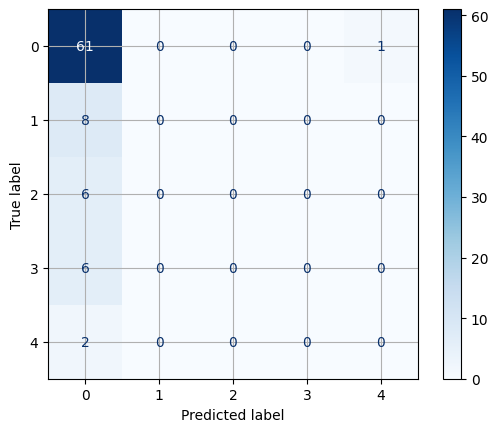

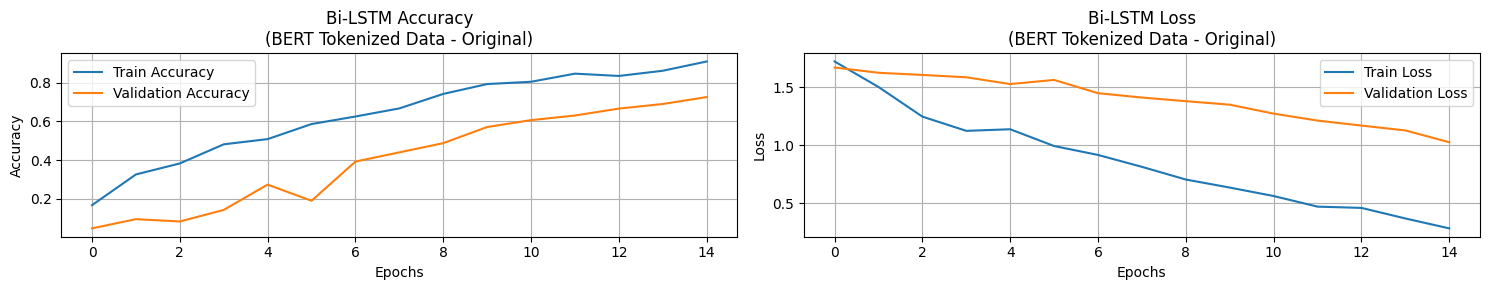

 ======================== 🔹 Training BiLSTM with BERT Tokenized Data - Backtranslated 🔹 ========================

🔹 Best Parameters Found: {'learning_rate': 0.0001, 'dense_dropout': 0.4, 'batch_size': 64, 'activation': 'swish'}
🔹 Best Validation Accuracy: 0.7619

🔍 Bi-LSTM Accuracy on Test Data: 0.7619

Classification Report:

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        62
           1       0.00      0.00      0.00         8
           2       1.00      0.33      0.50         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.76        84
   macro avg       0.35      0.27      0.27        84
weighted avg       0.63      0.76      0.67        84

Accuracy : 0.7619047619047619
Precision (macro) : 0.35121951219512193
Precision (avg): 0.6295005807200929
Recall : 0.7619047619047619
F1-Score : 0.6712962962962964


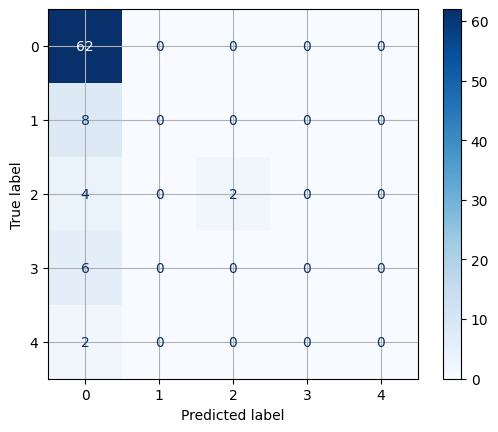

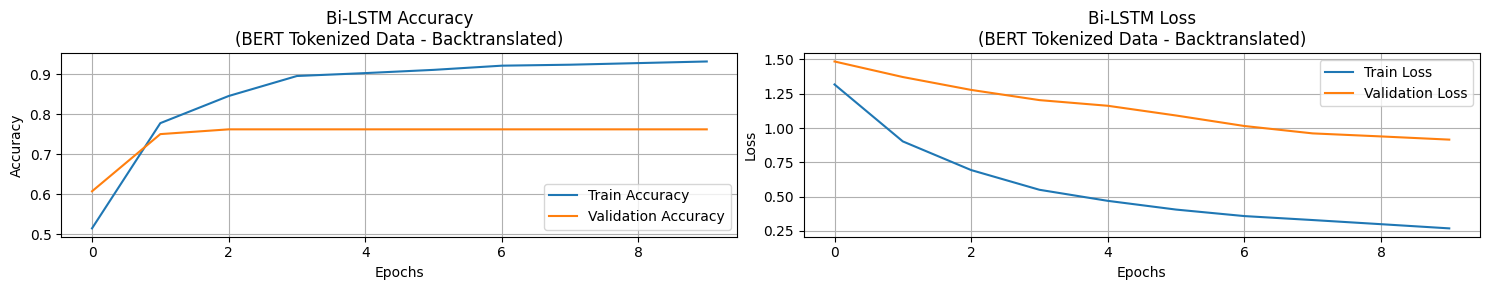

 ======================== 🔹 Training BiLSTM with BERT Tokenized Data - NLP Augmented 🔹 ========================

🔹 Best Parameters Found: {'learning_rate': 0.0005, 'dense_dropout': 0.1, 'batch_size': 32, 'activation': 'swish'}
🔹 Best Validation Accuracy: 0.7500

🔍 Bi-LSTM Accuracy on Test Data: 0.7500

Classification Report:

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       1.00      0.17      0.29         6
           4       0.00      0.00      0.00         2

    accuracy                           0.75        84
   macro avg       0.35      0.23      0.23        84
weighted avg       0.64      0.75      0.66        84

Accuracy : 0.75
Precision (macro) : 0.3530864197530864
Precision (avg): 0.6363903586125808
Recall : 0.75
F1-Score : 0.6604348032919461


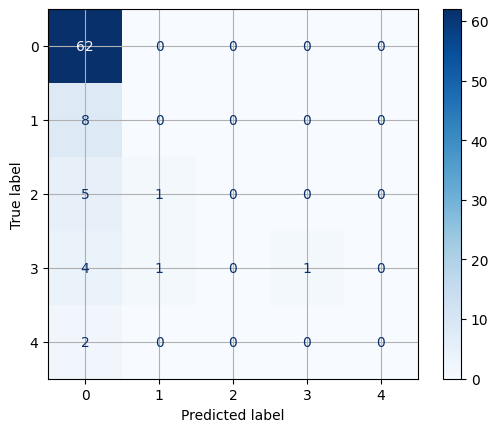

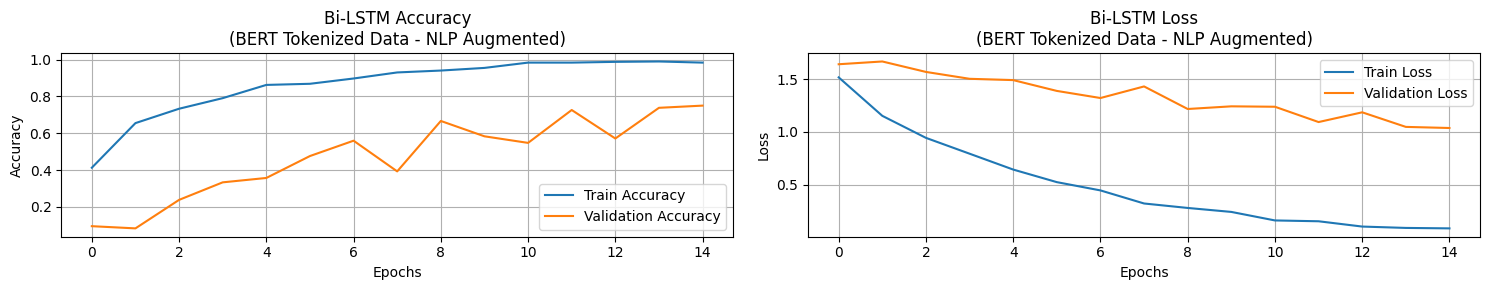

In [94]:
print(' ======================== 🔹 Training BiLSTM with BERT Tokenized Data - Original 🔹 ========================')
best_model_bilstm_bert_original, best_pred_bilstm_bert_original, best_history_bilstm_bert_original, best_params_bilstm_bert_original = bi_lstm_model(
    X_train_bert_hstate, y_train, X_test_bert_hstate, y_test, None, 'BERT Tokenized Data - Original'
)

print(' ======================== 🔹 Training BiLSTM with BERT Tokenized Data - Backtranslated 🔹 ========================')
best_model_bilstm_bert_bt, best_pred_bilstm_bert_bt, best_history_bilstm_bert_bt, best_params_bilstm_bert_bt = bi_lstm_model(
    X_train_bt_bert_hstate, y_train_bt_bert_hstate, X_test_bert_hstate, y_test, None, 'BERT Tokenized Data - Backtranslated'
)

print(' ======================== 🔹 Training BiLSTM with BERT Tokenized Data - NLP Augmented 🔹 ========================')
best_model_bilstm_bert_nlp, best_pred_bilstm_bert_nlp, best_history_bilstm_bert_nlp, best_params_bilstm_bert_nlp = bi_lstm_model(
    X_train_nlp_bert_hstate, y_train_nlp_bert_hstate, X_test_bert_hstate, y_test, None, 'BERT Tokenized Data - NLP Augmented'
)


### Performance evaluation and conclusion (LSTM)

In [97]:
result_df_final

Classifier  Train Accuracy  \
0            ANN with GloVe Embedding - Original Data        0.730539   
1      ANN with GloVe Embedding - Backtranslated Data        0.126613   
2       ANN with GloVe Embedding - NLP Augmented Data        0.466119   
3             ANN with BERT Tokenized Data - Original        0.739521   
4       ANN with BERT Tokenized Data - Backtranslated        0.242742   
5        ANN with BERT Tokenized Data - NLP Augmented        0.509240   
6        Bi-LSTM with GloVe Embedding - Original Data        0.805389   
7   Bi-LSTM with GloVe Embedding - Backtranslated ...        0.508871   
8   Bi-LSTM with GloVe Embedding - NLP Augmented Data        0.622177   
9         Bi-LSTM with BERT Tokenized Data - Original        0.829341   
10  Bi-LSTM with BERT Tokenized Data - Backtranslated        0.878226   
11   Bi-LSTM with BERT Tokenized Data - NLP Augmented        0.989733   

    Test Accuracy  Train F1 Score(avg)  Test F1 Score(avg)  \
0        0.750000             0.646910            0.651607   
1        0.523810             0.122897            0.542169   
2        0.750000             0.326085            0.655990   
3        0.773810             0.629868            0.699574   
4        0.690476             0.149064            0.611565   
5        0.750000             0.362239            0.657343   
6        0.416667             0.825086            0.474443   
7        0.738095             0.432445            0.626875   
8        0.750000             0.503896            0.655990   
9        0.726190             0.790861            0.621018   
10       0.761905             0.878410            0.671296   
11       0.750000             0.989642            0.660435   

    Train F1 Score(macro)  Test F1 Score(macro)  Train Recall  Test Recall  \
0                0.232316              0.228177      0.730539     0.750000   
1                0.122862              0.274425      0.126613     0.523810   
2                0.132519              0.229365      0.466119     0.750000   
3                0.170345              0.304518      0.739521     0.773810   
4                0.149130              0.165714      0.242742     0.690476   
5                0.159603              0.209790      0.509240     0.750000   
6                0.814702              0.173621      0.805389     0.416667   
7                0.432723              0.169863      0.508871     0.738095   
8                0.285246              0.229365      0.622177     0.750000   
9                0.657166              0.168276      0.829341     0.726190   
10               0.878417              0.272222      0.878226     0.761905   
11               0.988212              0.230569      0.989733     0.750000   

    Train Precision (avg)  Test Precision (avg) Test Time cv score  
0                0.607719              0.622777         -        -  
1                0.128619              0.579947         -        -  
2                0.254816              0.629501         -        -  
3                0.548534              0.706944         -        -  
4                0.141820              0.548840         -        -  
5                0.331455              0.596708         -        -  
6                0.890301              0.562199         -        -  
7                0.476405              0.544785         -        -  
8                0.545162              0.629501         -        -  
9                0.861340              0.542456         -        -  
10               0.894624              0.629501         -        -  
11               0.989915              0.636390         -        -

## Final Result Summary & Conclusion

In [96]:
result_df_final

Classifier  Train Accuracy  \
0            ANN with GloVe Embedding - Original Data        0.730539   
1      ANN with GloVe Embedding - Backtranslated Data        0.126613   
2       ANN with GloVe Embedding - NLP Augmented Data        0.466119   
3             ANN with BERT Tokenized Data - Original        0.739521   
4       ANN with BERT Tokenized Data - Backtranslated        0.242742   
5        ANN with BERT Tokenized Data - NLP Augmented        0.509240   
6        Bi-LSTM with GloVe Embedding - Original Data        0.805389   
7   Bi-LSTM with GloVe Embedding - Backtranslated ...        0.508871   
8   Bi-LSTM with GloVe Embedding - NLP Augmented Data        0.622177   
9         Bi-LSTM with BERT Tokenized Data - Original        0.829341   
10  Bi-LSTM with BERT Tokenized Data - Backtranslated        0.878226   
11   Bi-LSTM with BERT Tokenized Data - NLP Augmented        0.989733   

    Test Accuracy  Train F1 Score(avg)  Test F1 Score(avg)  \
0        0.750000             0.646910            0.651607   
1        0.523810             0.122897            0.542169   
2        0.750000             0.326085            0.655990   
3        0.773810             0.629868            0.699574   
4        0.690476             0.149064            0.611565   
5        0.750000             0.362239            0.657343   
6        0.416667             0.825086            0.474443   
7        0.738095             0.432445            0.626875   
8        0.750000             0.503896            0.655990   
9        0.726190             0.790861            0.621018   
10       0.761905             0.878410            0.671296   
11       0.750000             0.989642            0.660435   

    Train F1 Score(macro)  Test F1 Score(macro)  Train Recall  Test Recall  \
0                0.232316              0.228177      0.730539     0.750000   
1                0.122862              0.274425      0.126613     0.523810   
2                0.132519              0.229365      0.466119     0.750000   
3                0.170345              0.304518      0.739521     0.773810   
4                0.149130              0.165714      0.242742     0.690476   
5                0.159603              0.209790      0.509240     0.750000   
6                0.814702              0.173621      0.805389     0.416667   
7                0.432723              0.169863      0.508871     0.738095   
8                0.285246              0.229365      0.622177     0.750000   
9                0.657166              0.168276      0.829341     0.726190   
10               0.878417              0.272222      0.878226     0.761905   
11               0.988212              0.230569      0.989733     0.750000   

    Train Precision (avg)  Test Precision (avg) Test Time cv score  
0                0.607719              0.622777         -        -  
1                0.128619              0.579947         -        -  
2                0.254816              0.629501         -        -  
3                0.548534              0.706944         -        -  
4                0.141820              0.548840         -        -  
5                0.331455              0.596708         -        -  
6                0.890301              0.562199         -        -  
7                0.476405              0.544785         -        -  
8                0.545162              0.629501         -        -  
9                0.861340              0.542456         -        -  
10               0.894624              0.629501         -        -  
11               0.989915              0.636390         -        -

### Final Models performance on multiple run

| Index | Model                                             | Test F1 Score (avg) | Test Accuracy | Overfitting?                         |
| ----- | ------------------------------------------------- | ------------------- | ------------- | ------------------------------------ |
| 3     | ANN with BERT Tokenized Data - Original           | **0.6996**          | **0.7738**    | Small gap                            |
| 10    | Bi-LSTM with BERT Tokenized Data - Backtranslated | 0.6713              | 0.7619        | Medium gap (Train F1 = 0.8784)       |
| 5     | ANN with BERT Tokenized Data - NLP Augmented      | 0.6573              | 0.75          | Medium gap                           |
| 2     | ANN with GloVe Embedding - NLP Augmented          | 0.6560              | 0.75          | Large gap (Train F1 = 0.3261)        |
| 11    | Bi-LSTM with BERT Tokenized Data - NLP Augmented  | 0.6604              | 0.75          | High overfitting (Train F1 = 0.9896) |


In [99]:
with open('/content/drive/MyDrive/Capstone/ANNBertOriginal_model.pkl', 'wb') as file:
     pickle.dump(best_model_ann_bert_original, file)